In [1150]:
import numpy as np
import pandas as pd

In [1151]:
rho_tank=4500 #kg/m3
m=24/86400#ton/s
P=410#bar
T=273.15+25
T1=T
Tref=10+273.15
Po=31

In [1152]:
import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]
T=298
#P1=100
def PRv2(Tc,Pc,mm,w,T,P):
    #Unidades: P, Pc: kPa, T, Tc: K, w: Adim, mm: kg/kmol
    R=8.314#J/mol-K
    Ru=R/mm
    mi=0.379642+1.48503*w-0.164423*w**2+0.016666*w**3
    alpha=(1+mi*(1-(T/Tc)**0.5))**2
    a=0.45724*((Ru)**2)*(Tc**2)*alpha/(Pc)
    b=0.0778*(Ru)*(Tc/Pc)
    A_may=a*P/(((Ru)**2)*(T**2))
    B_may=b*P/((Ru)*T)
    m=-(1-B_may)
    n=(A_may-(3*B_may**2)-(2*B_may))
    o=-((A_may*B_may)-(B_may**2)-(B_may**3))
    v=(Ru*T)/P
    return {'alpha':alpha,'a':a,'b':b,'A':A_may,'B':B_may,'m':m,'n':n,'o':o,'v':v}
resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],316+273.15,172.37*100)
z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
#r1=(P1*crit['PM'][0])/(z*(8.314)*(T+273.15))
#V1=m/r1
#V1

In [1153]:
import numpy as np
from scipy.optimize import root
def trabajo_reversible(m, P1, P2, eta, T2,T1):
    P1=P1*100
    P2=P2*100
    
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)
    
    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2+273.15,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2+273.15))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (m * P1 * 1000 * V1) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    W_rev=term1*term2/1000
    return W_rev/eta

def trabajo_reversible_IT(tt, m, P1, P2, eta,T1):
    P1=P1*100
    P2=P2*100
    T2=abs(tt[0])

    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T1,P1)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r1=(P1*crit['PM'][0])/(z*(8.314)*T1)

    V1=1/r1
    resul_peng=PRv2(crit['Tc'][0],crit['Pc'][0],crit['PM'][0],crit['w'][0],T2,P2)
    z=np.real(max(np.roots([1,resul_peng['m'],resul_peng['n'],resul_peng['o']])))
    r2=(P2*crit['PM'][0])/(z*(8.314)*(T2))
    V2=1/r2
    n = np.log(P2/P1)/(np.log((V1)/(V2)))
    
    term1 = (1 * P1 * V1 * 1000) / (0.72*(n - 1)/n)
    term2 = (P2 / P1) ** ((n - 1) / n) - 1
    Tref=T1
    T=T2
    HhH2=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH2=HhH2
    T=T1
    HhH1=(19.67099783*(T-Tref) + 0.069681519/2*(T**2-Tref**2) - 0.000200098/3*(T**3-Tref**3) + 2.89493E-07/4*(T**4-Tref*4) - 2.22475E-10/5*(T**5-Tref**5) + 8.81466E-14/6*(T**6-Tref**6) - 1.42043E-17/7*(T**6-Tref**6))/2
    HhH1=HhH1
    W_rev=term1*term2/1000
    print('kW',W_rev)
    return W_rev - (HhH2 - HhH1)

P1=31
P2=141.82
m=m
eta=0.75
sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
if sol.success:
    print(sol.message)
else:
    print(sol.message)

resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
print(f"W: {resultado:.20f} kW")
sol.x-273.15

kW 3496.8473861408834
kW 3496.8473861408834
kW 3496.8473861408834
kW 3496.84741376228
kW 3677.64368506432
kW 3676.072128824285
kW 3676.08623771237
kW 3676.086238880761
The solution converged.
W: 1.36151342180768941681 kW


array([275.93059926])

In [1154]:
Tref

283.15

In [1155]:
import numpy as np
from scipy.optimize import root

def balance(x, T, Tref, m):
    global e
    global s
    """
    Calcula la función de balance para el proceso,
    devolviendo la diferencia e - s.

    Parámetros:
      x    : vector de incógnitas; se asume que x[0] es la variable a encontrar.
      T    : temperatura en K.
      Tref : temperatura de referencia en K.
      m    : masa del hidrógeno (kg).

    La función utiliza dos series polinómicas (para H2 y H2O)
    para calcular, respectivamente, las energías 'e' y 's', y retorna e - s.
    """
    # Calcular la entalpía (u otra propiedad) para hidrógeno
    Ta=15+273.15
    Ts=92+273.15
    HhH2 = ( 19.67099783*(T - Tref)
              + (0.069681519/2) * (T**2 - Tref**2)
              - (0.000200098/3) * (T**3 - Tref**3)
              + (2.89493E-07/4) * (T**4 - Tref**4)
              - (2.22475E-10/5) * (T**5 - Tref**5)
              + (8.81466E-14/6) * (T**6 - Tref**6)
              - (1.42043E-17/7) * (T**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O = ( -22.41701677*(Ta - Tref)
               + (0.876972156/2) * (Ta**2 - Tref**2)
               - (0.002570393/3) * (Ta**3 - Tref**3)
               + (2.48383E-06/4) * (Ta**4 - Tref**4)
             ) / 18.015
    Tk=25+273.15
    HhH22 = ( 19.67099783*(Tk - Tref)
              + (0.069681519/2) * (Tk**2 - Tref**2)
              - (0.000200098/3) * (Tk**3 - Tref**3)
              + (2.89493E-07/4) * (Tk**4 - Tref**4)
              - (2.22475E-10/5) * (Tk**5 - Tref**5)
              + (8.81466E-14/6) * (Tk**6 - Tref**6)
              - (1.42043E-17/7) * (Tk**7 - Tref**7)
            ) / 2
    

    # Calcular la entalpía (u otra propiedad) para agua (H2O)
    HhH2O2 = ( -22.41701677*(Ts - Tref)
               + (0.876972156/2) * (Ts**2 - Tref**2)
               - (0.002570393/3) * (Ts**3 - Tref**3)
               + (2.48383E-06/4) * (Ts**4 - Tref**4)
             ) / 18.015
    m=m*1e3
    s = (HhH22 + HhH2O2)* x[0]
    e = (HhH2 + HhH2O) * m
    
    return e - s


In [1156]:

import pandas as pd
import math

class PriceCalculator:
    def __init__(self, dataframe,spares,material):
        self.dataframe = dataframe
        self.spares = spares
        self.material = material
        self.calculate_price()

    def calculate_price(self):
        prices = []
        cepci_2001 = 397
        cepci_2024 = 798.8
        k1=2.2897
        k2=1.3604
        k3=-0.1027
        if self.material == "Carbon Steel":
            sFBM=3.4
        elif self.material == "Stainless Steel":
            sFBM=7.0
        else:
            sFBM=13.9 #for Nickel Alloy
        FBMCS=3.4 #for Carbon Steel

        for index, row in self.dataframe.iterrows():
            if index < len(self.dataframe) - 1:  # For all rows except the last one
                w_value = row["W (kW)"]
                A = k1+(k2*math.log10(w_value))+(k3*(math.log10(w_value)**2))
                B=(10**A)*(self.spares+1)/cepci_2001*cepci_2024
                price=B*sFBM/FBMCS
                prices.append(price)
            else:  # For the last row
                total_price = sum(prices)
                prices.append(total_price)
        self.dataframe["Purchased Equipment Cost (USD)"] = prices
        self.dataframe["Purchased Equipment Cost (USD)"] = self.dataframe["Purchased Equipment Cost (USD)"].apply(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.total_price = prices[-1]  # Total price is the last value in the list
        installation_cost = total_price * 2.5
        piping_cost = self.total_price * 0.21
        electrical_cost = self.total_price * 0.16
        instrumentation_cost = self.total_price * 0.08
        Final_cost = self.total_price + piping_cost + electrical_cost + instrumentation_cost+installation_cost
        cost_mxn= Final_cost * 19.59 
        pricce_mxn=self.total_price*19.59


        # Create a data frame with the extra costs
        extras = {
            "Purchased Equipment Cost (USD)": [self.total_price],
            "Purchased Equipment Cost (MXN)": [pricce_mxn],
            "Installation Cost (USD)": [installation_cost],
            "Piping Cost (USD)": [piping_cost],
            "Electrical Cost (USD)": [electrical_cost],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
            
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
        self.final=Final_cost
        return self.dataframe, self.extras_df

# Use the class with the prueba dataframe
SS="Stainless Steel"
CS="Carbon Steel"
NA="Nickel Alloy"



In [1157]:
import numpy as np
from scipy.optimize import root

def calcular_dimension_tanque(P, m, crit, tipo, rho_tank, T=300, x0=[1, 4]):
    """
    Calcula las dimensiones, espesor y masa de un tanque en base a parámetros de entrada.
    
    Parámetros:
      - P: Presión de entrada (se espera en unidades que requieran ser convertidas a Pascales).
      - m: Masa (kg) o cantidad similar requerida para el cálculo del volumen.
      - crit: Diccionario con las propiedades críticas, debe incluir las claves:
              'Tc', 'Pc', 'PM' y 'w'. Se usan los primeros elementos (ej: crit['Tc'][0]).
      - tipo: Tipo de tanque, str. Debe ser 'hemi' o 'semi'.
      - rho_tank: Densidad del material del tanque (kg/m³).
      - T: Temperatura en Kelvin (por defecto 300 K).
      - x0: Valor inicial para la solución del sistema [r, L] (por defecto [1.5, 3.0]).
      
    Retorna:
      Un diccionario con los siguientes valores:
        - 'volumen_total': Volumen calculado del tanque (m³).
        - 'radio': Radio del tanque (m).
        - 'longitud': Longitud del tanque (m).
        - 'espesor': Espesor del tanque (m).
        - 'masa': Masa del tanque (ton).
        - 'V_objetivo': Volumen objetivo calculado (m³).
    
    Se lanzará un ValueError en caso de que el sistema no encuentre solución o 
    si el tipo de tanque no es reconocido.
    """
    
    # Se recalcula V_objetivo usando el método de Peng–Robinson (se asume PRv2 está definida)
    resul_peng = PRv2(crit['Tc'][0], crit['Pc'][0], crit['PM'][0], crit['w'][0], T, (P)*100)
    z = np.real(max(np.roots([1, resul_peng['m'], resul_peng['n'], resul_peng['o']])))
    r1 = (100 * P * crit['PM'][0]) / (z * 8.314 * T)
    V1 = m / r1
    V_objetivo = V1

    # Definición del sistema de ecuaciones para resolver por el método root
    def ecuaciones(x, V_obj):
        r, L = abs(x[0]), abs(x[1])
        if tipo == 'hemi':
            V_tank = (4 / 3) * np.pi * r**3 + (L - 2*r) * np.pi * r**2
        elif tipo == 'semi':
            V_tank = np.pi * r**2 * L + (2/3) * np.pi * r**3
        else:
            raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
        
        f1 = V_tank - V_obj  # La diferencia entre el volumen calculado y el objetivo
        f2 = L - 4 * r     # Relación de diseño entre L y r
        return [f1, f2]

    # Resolver el sistema de ecuaciones
    solucion = root(
    ecuaciones, 
    x0=x0, 
    args=(V_objetivo,), 
    method='hybr', 
    tol=1e-3, 
    options={'maxfev': 10000000}  # limite máximo de evaluaciones (iteraciones)
)

    if not solucion.success:
        raise ValueError("No se encontró solución: " + solucion.message)
    
    r, L_encontrado = solucion.x[0], solucion.x[1]

    # Calcular el volumen total del tanque según el tipo
    if tipo == 'hemi':
        V_total_sol = (4 / 3) * np.pi * r**3 + (L_encontrado - 2*r) * np.pi * r**2
    elif tipo == 'semi':
        V_total_sol = (2 / 3) * np.pi * r**3 + (L_encontrado - r) * np.pi * r**2
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")

    # Cálculo del espesor del tanque usando una ecuación de pared delgada
    FS = 1.5  # Factor de seguridad
    Sy = 2811 * 100000
    Su = 3095 * 100000
    t1 = (100000*P * r * FS) / Sy
    t2 = (100000*P * r * 2.25) / Su
    t = max(t1, t2)  # Espesor del tanque (en metros)

    # Para el cálculo de la masa se asume h = r
    h = r
    if tipo == 'hemi':
        mt = rho_tank * ((4/3) * np.pi * (r + t)**3 + np.pi * (r + t)**2 * L_encontrado - V_objetivo)
    elif tipo == 'semi':
        mt = rho_tank * (np.pi * ((r + t)**2 * L_encontrado + (2/3) * (r + t)**2 * (h + t)) -
                         (np.pi * r**2 * L_encontrado + (2/3) * np.pi * r**2 * h))
    else:
        raise ValueError("Tipo de tanque no reconocido. Usa 'hemi' o 'semi'.")
    mt = mt / 1000  # Conversión a toneladas

    # Impresión de resultados
    print("Volumen calculado del tanque:", round(V_total_sol, 2), "m³")
    print("Radio del tanque:", round(r, 2), "m")
    print("Longitud del tanque:", round(L_encontrado, 2), "m")
    print("Espesor del tanque:", round(t*1000, 2), "mm")
    print("Masa del tanque:", round(mt, 2), "ton")

    # Retorna los resultados en un diccionario
    return {
        'volumen_total': V_total_sol,
        'radio': r,
        'longitud': L_encontrado,
        'espesor': t,
        'masa': mt,
        'V_objetivo': V_objetivo,
        'h2':m
    }

# Ejemplo de uso:
# Se debe definir o importar la función PRv2 y el diccionario crit apropiadamente.

import pandas as pd
crit=pd.DataFrame()
crit['Comp']=['H2']
crit['Tc']=[32.938]
crit['Pc']=[1293.00]
crit['w']=[-0.2160]
crit['PM']=[1.00784*2]

class TankCostCalculator:
    price_per_lb_gas = {
        "Type I": 5.5,
        "Type II": 9.0,
        "Type III & IV": 15.5
    }

    def __init__(self, tank_type, gas_mass_kg):
        self.tank_type = tank_type
        self.gas_mass_kg = gas_mass_kg
        self.gas_mass_lb = gas_mass_kg * 2.20462  # in lb
        self.price_per_lb = self.price_per_lb_gas[tank_type]
        self.extras_df = self.calculate_cost()  # Call calculate_cost during initialization

    def calculate_cost(self):
        CEPCI_2014 = 576.1
        CEPCI_2024 = 798.8
        self.price= (self.gas_mass_lb * self.price_per_lb)* (CEPCI_2024 / CEPCI_2014)
        self.total_material_cost= self.price * 1.2  
        self.construction= self.price * 0.08
        installation_cost = self.price * 2.5
        instrumentation_cost = self.price * 0.08
        Final_cost = self.price + self.total_material_cost + self.construction + installation_cost + instrumentation_cost
        cost_mxn= Final_cost * 19.61  
        self.final=Final_cost
        # Create a data frame with the extra costs
        extras = {
            "Total Price (FOB)": [self.price],
            "Installation Cost (USD)": [installation_cost],
            "Total Material Cost (USD)": [self.total_material_cost],
            "Construction Cost (USD)": [self.construction],
            "Instrumentation Cost (USD)": [instrumentation_cost],
            "Final Cost (USD)": [Final_cost],
            "Final Cost (MXN)": [cost_mxn]
        }
        self.extras_df = pd.DataFrame(extras)
        # Format the numbers in the extras_df as currency
        self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)       
        return  self.extras_df


T1="Type I"
T2="Type II"
T3="Type III & IV"



In [1158]:
Pes=list(np.linspace(110,800,800-110))

In [1159]:
m

0.0002777777777777778

In [1160]:
Tref=283.15

In [1161]:
def pressure_increment_per_stage(P1, P2, n):
    """
    Calcula el factor de incremento de presión (r) en cada etapa de compresión, y
    devuelve las presiones en cada etapa.
    
    Parámetros:
      P1 : float
          Presión inicial.
      P2 : float
          Presión final.
      n : int
          Número de etapas de compresión.
          
    Retorna:
      r : float
          Factor multiplicativo de presión por etapa.
      pressures : list
          Lista con la presión en cada etapa, desde la inicial hasta la final.
    """
    # Calcular el factor de incremento por etapa
    r = (P2 / P1) ** (1 / n)
    
    # Calcular la presión en cada etapa
    pressures = [P1 * r**i for i in range(n + 1)]
    
    return r, pressures


In [1162]:
import pandas as pd
import numpy as np
from scipy.optimize import root

# Inicialización de listas y acumulador de resultados
stages = []
temperature = []
compis = []
Qk = []
Wk = []
waterr = []
price_list = []
resultados_list = []  # Aquí se guardarán los diccionarios con los resultados de cada iteración

for i in range(len(Pes)):
    # Configuración inicial por cada presión en Pes
    P = Pes[i]
    Po = 31
    P_diff = P - Po
    P1_inicial = Po
    P2_target = P

    # Cálculo del número de etapas
    N_etapas = np.ceil(np.log((P2_target) / (Po)) / np.log(2))
    stages.append(N_etapas)

    r, pressures = pressure_increment_per_stage(Po, P2_target, int(N_etapas))
    pressures.pop(0)
    # Se calcula el valor “sin límite” para el incremento de presión en cada etapa
    

    # Se inicializa la lista de presiones. El primer valor es la presión base Po.
    P_acum = [Po]
    Temps = [25 + 273.15]

    # Inicialización de contenedores para los datos de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps_list = [], [], [], [], [], []
    Tcomp = []  # Para almacenar "T comp" en cada etapa
    eta = 0.75
    Tref_val = Tref  # Se asume que Tref ya está definida

    # Iterar por cada etapa
    for j in range(int(N_etapas)):
        # Se define, para cada etapa, el incremento permitido:
        if j == 0:
            # En la primera etapa no puede superar 2·Po
            allowed_increment = 2 * Po
        else:
            # En etapas posteriores se toma el incremento usado en la etapa anterior (almacenado en P_acum[-1])
            # y se limita a su doble.
            allowed_increment = 2 * P_acum[-1]

        # Se aplica la restricción: se toma el mínimo entre el valor calculado originalmente y el permitido.
        p_etapa_actual = pressures[j]/2

        # Se calculan las presiones de entrada y salida de la etapa
        P1 = sum(P_acum)
        P_acum.append(p_etapa_actual)
        P2 = sum(P_acum)

        

        # Resolver para el trabajo reversible utilizando root
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=[500], args=(m, P1, P2, eta, 298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)

        # Cálculo del trabajo y otros parámetros
        tkñ = sol.x[0]  # Valor obtenido para T2 (en K)
        #print('kkkkkkk', tkñ)
        resultado = trabajo_reversible(m, P1, P2, eta, tkñ - 273.15, 298.15)
        #print(f"W: {resultado:.20f} kW")

        # Resolver la ecuación de balance
        solucion = root(balance, x0, args=(tkñ, Tref_val, m), method='hybr')
        if solucion.success:
            x_encontrado = solucion.x[0]
            

            # Se actualizan los acumuladores de datos de la etapa
            Temps.append(25 + 273.15)
            Qs.append(float(-e))      # Se asume que "e" está definido
            Ts.append(25 + 273.15)
            m_H2O.append(float(x_encontrado))
            comp.append('No. ' + str(j + 1))
            power.append(resultado * 1e3)
            Ps_list.append(P2)
            Tcomp.append(tkñ - 273.15)
        else:
            print("No se encontró solución:", solucion.message)

    # Resto del código (agrupación de resultados, cálculo de costos, etc.)
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps_list,  # Se asume que el valor está en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power),
        "T comp": Tcomp
    }
    df_compresores = pd.DataFrame(data)

    total_row = [
        "Total",
        Temps[-1],
        Ps_list[-1],
        sum(df_compresores['Cooling H2O (kg/s)']),
        sum(df_compresores['Q (kW)']),
        sum(df_compresores['W (kW)']),
        sum(df_compresores['T comp'])
    ]
    df_compresores.loc[df_compresores.shape[0]] = total_row
    compis.append(df_compresores)
    
    # Se instancia el PriceCalculator; se asume que devuelve la información requerida.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    calculator_info = {
        "volumen_total": calculator.volumen_total if hasattr(calculator, 'volumen_total') else None,
        "radio":         calculator.radio         if hasattr(calculator, 'radio')         else None,
        "longitud":      calculator.longitud      if hasattr(calculator, 'longitud')      else None,
        "espesor":       calculator.espesor       if hasattr(calculator, 'espesor')       else None,
        "masa":          calculator.masa          if hasattr(calculator, 'masa')          else None,
        "V_objetivo":    calculator.V_objetivo    if hasattr(calculator, 'V_objetivo')    else None,
        "h2":            m  # Se utiliza el valor de m definido externamente
    }
    
    # Actualizar las listas agregadas con información del renglón "Total" de df_compresores
    tot_idx = df_compresores.shape[0] - 1
    temperature.append(df_compresores.loc[tot_idx]['T (K)'])
    Qk.append(df_compresores.loc[tot_idx]['Q (kW)'])
    Wk.append(df_compresores.loc[tot_idx]['W (kW)'])
    waterr.append(df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'])
    
    # Cálculo de dimensiones del tanque y su costo
    resultadot = calcular_dimension_tanque(df_compresores.loc[tot_idx]['P (bar)'], (((m*86400)*1e3)*(4/24))*2.5, crit, 'hemi', 4500)
    calculator1 = TankCostCalculator("Type I", resultadot['masa'] * 1e3)
    
    total_price =  calculator1.final + calculator.final
    price_list.append(total_price)
    
    # Crear un diccionario que combine los datos totales y la info de calculator
    resultado_row = {
        "T (K)": df_compresores.loc[tot_idx]['T (K)'],
        "P (bar)": df_compresores.loc[tot_idx]['P (bar)'],
        "Cooling H2O (kg/s)": df_compresores.loc[tot_idx]['Cooling H2O (kg/s)'],
        "Q (kW)": df_compresores.loc[tot_idx]['Q (kW)'],
        "W (kW)": df_compresores.loc[tot_idx]['W (kW)'],
        "volumen_total": calculator_info["volumen_total"],
        "radio":         calculator_info["radio"],
        "longitud":      calculator_info["longitud"],
        "espesor":       calculator_info["espesor"],
        "masa":          calculator_info["masa"],
        "V_objetivo":    calculator_info["V_objetivo"],
        "h2":            calculator_info["h2"],
        "price":         total_price,
        "It. No.":       i
    }
    resultados_list.append(resultado_row)

# Crear el DataFrame final de resultados a partir de la lista
df_resultados = pd.DataFrame(resultados_list)
df_resultados

kW 1505.7281928518257
kW 1505.7281928518257
kW 1505.7281928518257
kW 1505.7282049188043
kW 1320.7886618397667
kW 1318.7699236860242
kW 1318.7467519679897
kW 1318.7467487361869
The solution converged.
kW 1493.362189049124
kW 1493.362189049124
kW 1493.362189049124
kW 1493.362200885982
kW 1310.6707971934752
kW 1308.6699610148034
kW 1308.646879793529
kW 1308.6468765397715
The solution converged.
Volumen calculado del tanque: 1122.89 m³
Radio del tanque: 4.75 m
Longitud del tanque: 19.0 m
Espesor del tanque: 397.86 mm
Masa del tanque: 4641.44 ton
kW 1510.7531423190048
kW 1510.7531423190048
kW 1510.7531423190048
kW 1510.7531544260091
kW 1325.7945636087682
kW 1323.7786054864694
kW 1323.7555122633423
kW 1323.7555090567275
The solution converged.
kW 1501.1083224096533
kW 1501.1083224096533
kW 1501.1083224096533
kW 1501.1083343064176
kW 1318.3952578660187
kW 1316.3988605480267
kW 1316.3759036692736
kW 1316.3759004555363
The solution converged.
Volumen calculado del tanque: 1117.06 m³
Radio del t

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 1100.01 m³
Radio del tanque: 4.72 m
Longitud del tanque: 18.87 m
Espesor del tanque: 403.82 mm
Masa del tanque: 4583.56 ton
kW 1530.5249113706445
kW 1530.5249113706445
kW 1530.5249113706445
kW 1530.5249236351126
kW 1345.533064676178
kW 1343.5287163696817
kW 1343.5059399311422
kW 1343.5059368238424
The solution converged.
kW 1531.648100695242
kW 1531.648100695242
kW 1531.648100695242
kW 1531.6481128279447
kW 1348.94939092359
kW 1346.9721223455288
kW 1346.949674944935
kW 1346.9496718894081
The solution converged.
Volumen calculado del tanque: 1094.41 m³
Radio del tanque: 4.71 m
Longitud del tanque: 18.84 m
Espesor del tanque: 405.3 mm
Masa del tanque: 4569.2 ton
kW 1535.3882221938707
kW 1535.3882221938707
kW 1535.3882221938707
kW 1535.3882344970643
kW 1350.3983927351692
kW 1348.39706412863
kW 1348.374367524181
kW 1348.374364441345
The solution converged.
kW 1539.174653869817
kW 1539.174653869817
kW 1539.174653869817
kW 1539.1746660606061
kW 1356.503980533346

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1549.794259368241
kW 1549.794259368241
kW 1549.794259368241
kW 1549.7942717861376
kW 1364.8340776379055
kW 1362.8420815154936
kW 1362.819625840658
kW 1362.8196228303739
The solution converged.
kW 1561.5027430386697
kW 1561.5027430386697
kW 1561.5027430386697
kW 1561.502755401631
kW 1378.9723819308228
kW 1377.0163059523304
kW 1376.9943851835158
kW 1376.994382282864
The solution converged.
Volumen calculado del tanque: 1072.8 m³
Radio del tanque: 4.68 m
Longitud del tanque: 18.72 m
Espesor del tanque: 411.18 mm
Masa del tanque: 4514.58 ton
kW 1554.5364027184476
kW 1554.5364027184476
kW 1554.5364027184476
kW 1554.5364151740966
kW 1369.5937374739533
kW 1367.604935747956
kW 1367.5825607711377
kW 1367.5825577847406
The solution converged.
kW 1568.8632922409402
kW 1568.8632922409402
kW 1568.8632922409402
kW 1568.8633046606112
kW 1386.3979432837205
kW 1384.447467752691
kW 1384.4256809908698
kW 1384.4256781283677
The solution converged.
Volumen calculado del tanque: 1067.55 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 833.5 m³
Radio del tanque: 4.3 m
Longitud del tanque: 17.21 m
Espesor del tanque: 494.81 mm
Masa del tanque: 3925.06 ton
kW 1332.7971312925354
kW 1332.7971312925354
kW 1332.7971312925354
kW 1332.7971419807345
kW 1151.1021849110396
kW 1149.0311943487357
kW 1149.0058729161058
kW 1149.0058688536071
The solution converged.
kW 1231.1470229012714
kW 1231.1470229012714
kW 1231.1470229012714
kW 1231.1470326970007
kW 1055.1547937709172
kW 1053.1056475788387
kW 1053.0797046460057
kW 1053.079700150372
kW 1053.0797001503631
The solution converged.
kW 1189.6777606502046
kW 1189.6777606502046
kW 1189.6777606502046
kW 1189.6777699789425
kW 1018.6103942412925
kW 1016.6186809204233
kW 1016.5933545355792
kW 1016.5933500936667
kW 1016.593350093656
The solution converged.
Volumen calculado del tanque: 829.73 m³
Radio del tanque: 4.3 m
Longitud del tanque: 17.18 m
Espesor del tanque: 496.48 mm
Masa del tanque: 3916.1 ton
kW 1335.4509887120846
kW 1335.4509887120846
kW 1335.4509

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 818.68 m³
Radio del tanque: 4.28 m
Longitud del tanque: 17.1 m
Espesor del tanque: 501.48 mm
Masa del tanque: 3889.87 ton
kW 1343.3127159544854
kW 1343.3127159544854
kW 1343.3127159544854
kW 1343.3127267265968
kW 1161.278019633459
kW 1159.207773837623
kW 1159.1825504924777
kW 1159.1825464774256
The solution converged.
kW 1246.821209942933
kW 1246.821209942933
kW 1246.821209942933
kW 1246.8212198613346
kW 1070.106470378942
kW 1068.0545810424378
kW 1068.0287287849478
kW 1068.028724353412
kW 1068.0287243534033
The solution converged.
kW 1209.0489960202915
kW 1209.0489960202915
kW 1209.0489960202915
kW 1209.0490054942202
kW 1037.0753845649276
kW 1035.0805617875844
kW 1035.0553590703755
kW 1035.0553547129462
kW 1035.0553547129362
The solution converged.
Volumen calculado del tanque: 815.08 m³
Radio del tanque: 4.27 m
Longitud del tanque: 17.08 m
Espesor del tanque: 503.14 mm
Masa del tanque: 3881.35 ton
kW 1345.9007646917635
kW 1345.9007646917635
kW 1345.900764

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1269.6867597319795
kW 1269.6867597319795
kW 1269.6867597319795
kW 1269.6867698291971
kW 1091.9907283863083
kW 1089.9361263221197
kW 1089.910425852569
kW 1089.9104215176521
kW 1089.910421517644
The solution converged.
kW 1237.366871115825
kW 1237.366871115825
kW 1237.366871115825
kW 1237.3668808013547
kW 1064.183928527048
kW 1062.186653859663
kW 1062.1616642180581
kW 1062.1616599893684
kW 1062.1616599893594
The solution converged.
Volumen calculado del tanque: 794.23 m³
Radio del tanque: 4.23 m
Longitud del tanque: 16.93 m
Espesor del tanque: 513.0 mm
Masa del tanque: 3832.3 ton
kW 1361.10248347931
kW 1361.10248347931
kW 1361.10248347931
kW 1361.1024943933605
kW 1178.5347005748472
kW 1176.4664378271073
kW 1176.4413905397412
kW 1176.4413866061425
The solution converged.
kW 1273.4256810757802
kW 1273.4256810757802
kW 1273.4256810757802
kW 1273.4256912022215
kW 1095.5774142889745
kW 1093.5225142325244
kW 1093.496840764457
kW 1093.496836445674
kW 1093.4968364456647
The solution converged

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 781.04 m³
Radio del tanque: 4.21 m
Longitud del tanque: 16.84 m
Espesor del tanque: 519.5 mm
Masa del tanque: 3801.49 ton
kW 1370.9405241956474
kW 1370.9405241956474
kW 1370.9405241956474
kW 1370.9405351881803
kW 1188.1004842704235
kW 1186.0337048578247
kW 1186.0087602926565
kW 1186.008756404688
The solution converged.
kW 1288.1845013739821
kW 1288.1845013739821
kW 1288.1845013739821
kW 1288.1845116157338
kW 1109.7579220572081
kW 1107.7022429850413
kW 1107.676681999406
kW 1107.6766777451671
kW 1107.6766777451594
The solution converged.
kW 1260.326072020318
kW 1260.326072020318
kW 1260.326072020318
kW 1260.3260818768272
kW 1086.263567641932
kW 1084.2661326281338
kW 1084.2413433937306
kW 1084.2413392735868
kW 1084.2413392735778
The solution converged.
Volumen calculado del tanque: 777.82 m³
Radio del tanque: 4.2 m
Longitud del tanque: 16.81 m
Espesor del tanque: 521.12 mm
Masa del tanque: 3794.01 ton
kW 1373.3646952863419
kW 1373.3646952863419
kW 1373.364695

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1278.298269324349
kW 1103.6104663665067
kW 1101.6140438727996
kW 1101.5894284067622
kW 1101.5894243739306
The solution converged.
Volumen calculado del tanque: 765.28 m³
Radio del tanque: 4.18 m
Longitud del tanque: 16.72 m
Espesor del tanque: 527.55 mm
Masa del tanque: 3764.96 ton
kW 1382.9252359462982
kW 1382.9252359462982
kW 1382.9252359462982
kW 1382.9252470344277
kW 1199.7752713162358
kW 1197.710672952823
kW 1197.685858645708
kW 1197.6858548138625
The solution converged.
kW 1306.206904757256
kW 1306.206904757256
kW 1306.206904757256
kW 1306.206915139721
kW 1127.1231409726463
kW 1125.0673792072362
kW 1125.0419683333796
kW 1125.0419641597755
The solution converged.
kW 1282.738417064225
kW 1282.738417064225
kW 1282.738417064225
kW 1282.738427087124
kW 1107.9047054949654
kW 1105.9086892593705
kW 1105.8841190046705
kW 1105.8841149937125
The solution converged.
Volumen calculado del tanque: 762.22 m³
Radio del tanque: 4.18 m
Longitud del tanque: 16.7 m
Espesor del tanque: 529.15 mm
M

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1394.5817755319006
kW 1394.5817755319006
kW 1394.5817755319006
kW 1394.5817867129997
kW 1211.1533136305338
kW 1209.0912345132897
kW 1209.0665522858503
kW 1209.0665485091372
The solution converged.
kW 1323.7803076490213
kW 1323.7803076490213
kW 1323.7803076490213
kW 1323.7803181685892
kW 1144.1077450813796
kW 1142.0528179755809
kW 1142.0275667498424
kW 1142.0275626566417
The solution converged.
kW 1304.6331190997578
kW 1304.6331190997578
kW 1304.6331190997578
kW 1304.6331292846974
kW 1129.1295810225047
kW 1127.1364527110393
kW 1127.1121181848678
kW 1127.1121142833288
The solution converged.
Volumen calculado del tanque: 747.36 m³
Radio del tanque: 4.15 m
Longitud del tanque: 16.59 m
Espesor del tanque: 537.1 mm
Masa del tanque: 3723.88 ton
kW 1396.8754083597548
kW 1396.8754083597548
kW 1396.8754083597548
kW 1396.8754195591441
kW 1213.394818622065
kW 1211.333277116358
kW 1211.308621447375
kW 1211.3086176815543
The solution converged.
kW 1327.243266711022
kW 1327.243266711022
kW 1327.2

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1340.9288282712664
kW 1340.9288282712664
kW 1340.9288282712664
kW 1340.928838924519
kW 1160.7313326024525
kW 1158.6780868974915
kW 1158.6530038644776
kW 1158.6529998512885
The solution converged.
kW 1326.0370769004437
kW 1326.0370769004437
kW 1326.0370769004437
kW 1326.037087243293
kW 1149.9587310680406
kW 1147.96985245573
kW 1147.9457686648136
kW 1147.9457648725518
The solution converged.
Volumen calculado del tanque: 733.18 m³
Radio del tanque: 4.12 m
Longitud del tanque: 16.49 m
Espesor del tanque: 544.96 mm
Masa del tanque: 3691.53 ton
kW 1408.1631174132792
kW 1408.1631174132792
kW 1408.1631174132792
kW 1408.1631287026835
kW 1224.4387692484067
kW 1222.3801103483875
kW 1222.3555885182377
kW 1222.3555848063554
The solution converged.
kW 1344.3095276557963
kW 1344.3095276557963
kW 1344.3095276557963
kW 1344.309538335392
kW 1164.0143389397265
kW 1161.9615268323032
kW 1161.9364784007423
kW 1161.9364744035008
The solution converged.
kW 1330.2611979038315
kW 1330.2611979038315
kW 1330.

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1412.5965236299855
kW 1412.5965236299855
kW 1412.5965236299855
kW 1412.5965349547412
kW 1228.7822605689214
kW 1226.7248324497268
kW 1226.700364496468
kW 1226.7003608058842
The solution converged.
kW 1351.0232857858648
kW 1351.0232857858648
kW 1351.0232857858648
kW 1351.0232965177634
kW 1170.5397539644036
kW 1168.487900446024
kW 1168.4629221013827
kW 1168.4629181359667
The solution converged.
kW 1338.6543019599546
kW 1338.6543019599546
kW 1338.6543019599546
kW 1338.654312395651
kW 1162.274237914308
kW 1160.2885206338947
kW 1160.2645938111295
kW 1160.2645900842233
The solution converged.
Volumen calculado del tanque: 724.99 m³
Radio del tanque: 4.11 m
Longitud del tanque: 16.42 m
Espesor del tanque: 549.65 mm
Masa del tanque: 3673.12 ton
kW 1414.7962464252637
kW 1414.7962464252637
kW 1414.7962464252637
kW 1414.796257767558
kW 1230.9385925652007
kW 1228.8817939927978
kW 1228.8573530232702
kW 1228.8573493432716
The solution converged.
kW 1354.356673105386
kW 1354.356673105386
kW 1354.35

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 709.24 m³
Radio del tanque: 4.08 m
Longitud del tanque: 16.3 m
Espesor del tanque: 558.94 mm
Masa del tanque: 3637.76 ton
kW 1427.7645958527035
kW 1427.7645958527035
kW 1427.7645958527035
kW 1427.764607298394
kW 1243.6675906715332
kW 1241.6147946424996
kW 1241.5905165584086
kW 1241.590512941147
The solution converged.
kW 1374.0380550681339
kW 1374.0380550681339
kW 1374.0380550681339
kW 1374.0380659792056
kW 1192.9661565266763
kW 1190.9185865432837
kW 1190.8938623271274
kW 1190.8938584723367
The solution converged.
kW 1367.470205483329
kW 1367.470205483329
kW 1367.470205483329
kW 1367.4702161304062
kW 1190.5044683615797
kW 1188.5278041664076
kW 1188.5042608419901
kW 1188.5042572666464
The solution converged.
Volumen calculado del tanque: 706.7 m³
Radio del tanque: 4.07 m
Longitud del tanque: 16.29 m
Espesor del tanque: 560.48 mm
Masa del tanque: 3632.1 ton
kW 1429.888754662917
kW 1429.888754662917
kW 1429.888754662917
kW 1429.8887661255428
kW 1245.755229703

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1407.2151645612382
kW 1407.2151645612382
kW 1407.2151645612382
kW 1407.2151754982733
kW 1229.6781428887198
kW 1227.7180822013095
kW 1227.695122330109
kW 1227.6951189678146
The solution converged.
Volumen calculado del tanque: 682.44 m³
Radio del tanque: 4.02 m
Longitud del tanque: 16.1 m
Espesor del tanque: 575.71 mm
Masa del tanque: 3578.67 ton
kW 1450.5793136573857
kW 1450.5793136573857
kW 1450.5793136573857
kW 1450.5793252849417
kW 1266.1297111026347
kW 1264.0851129522014
kW 1264.0611364109877
kW 1264.061132905221
The solution converged.
kW 1408.7824377040424
kW 1408.7824377040424
kW 1408.7824377040424
kW 1408.782448885243
kW 1226.9907688134192
kW 1224.9525846794393
kW 1224.9282839137393
kW 1224.9282802299044
The solution converged.
kW 1411.1028865124697
kW 1411.1028865124697
kW 1411.1028865124697
kW 1411.102897477766
kW 1233.5247301771833
kW 1231.566548609264
kW 1231.5436490866507
kW 1231.5436457453866
The solution converged.
Volumen calculado del tanque: 680.13 m³
Radio del tan

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 671.06 m³
Radio del tanque: 4.0 m
Longitud del tanque: 16.01 m
Espesor del tanque: 583.23 mm
Masa del tanque: 3553.97 ton
kW 1460.5688870270571
kW 1460.5688870270571
kW 1460.5688870270571
kW 1460.5688987342287
kW 1275.9924546866266
kW 1273.9519065513782
kW 1273.9280679217688
kW 1273.9280644652088
The solution converged.
kW 1424.0420991816911
kW 1424.0420991816911
kW 1424.0420991816911
kW 1424.0421104813895
kW 1241.9985678754067
kW 1239.9656086759476
kW 1239.9415085829298
kW 1239.9415049754464
The solution converged.
kW 1430.3163291119486
kW 1430.3163291119486
kW 1430.3163291119486
kW 1430.3163402166424
kW 1252.5735139715957
kW 1250.625281909436
kW 1250.6026889198138
kW 1250.6026856828482
The solution converged.
Volumen calculado del tanque: 668.84 m³
Radio del tanque: 4.0 m
Longitud del tanque: 15.99 m
Espesor del tanque: 584.73 mm
Masa del tanque: 3549.19 ton
kW 1462.5398408959206
kW 1462.5398408959206
kW 1462.5398408959206
kW 1462.539852618799
kW 1277.94

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1468.4003434907602
kW 1468.4003434907602
kW 1468.4003434907602
kW 1468.4003552603415
kW 1283.7362409406649
kW 1281.6990647507257
kW 1281.6753367156869
kW 1281.6753332978506
The solution converged.
kW 1436.0244331681015
kW 1436.0244331681015
kW 1436.0244331681015
kW 1436.0244445607843
kW 1253.8106973960892
kW 1251.7823079634911
kW 1251.7583715430878
kW 1251.7583679960069
The solution converged.
kW 1445.424916617123
kW 1445.424916617123
kW 1445.424916617123
kW 1445.4249278311054
kW 1267.5977961275496
kW 1265.6581472552843
kW 1265.6358046450405
kW 1265.6358014903847
The solution converged.
Volumen calculado del tanque: 660.13 m³
Radio del tanque: 3.98 m
Longitud del tanque: 15.92 m
Espesor del tanque: 590.69 mm
Masa del tanque: 3530.51 ton
kW 1470.3366699676883
kW 1470.3366699676883
kW 1470.3366699676883
kW 1470.3366817527003
kW 1285.6524848448194
kW 1283.6161703975713
kW 1283.5924700559808
kW 1283.592466647743
The solution converged.
kW 1438.9896483781133
kW 1438.9896483781133
kW 1438

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1477.9982597241747
kW 1477.9982597241747
kW 1477.9982597241747
kW 1477.9982715702351
kW 1293.2408286220953
kW 1291.2080193185825
kW 1291.1844297445539
kW 1291.1844263743344
The solution converged.
kW 1450.7322454663547
kW 1450.7322454663547
kW 1450.7322454663547
kW 1450.7322569731002
kW 1268.342788931433
kW 1266.3205790888164
kW 1266.2968508975812
kW 1266.2968474251531
The solution converged.
kW 1463.9963057397247
kW 1463.9963057397247
kW 1463.9963057397247
kW 1463.996317087647
kW 1286.1200820418564
kW 1284.191902234429
kW 1284.1698783920117
kW 1284.1698753387614
The solution converged.
Volumen calculado del tanque: 649.63 m³
Radio del tanque: 3.96 m
Longitud del tanque: 15.83 m
Espesor del tanque: 598.09 mm
Masa del tanque: 3508.21 ton
kW 1479.8931191615227
kW 1479.8931191615227
kW 1479.8931191615227
kW 1479.8931310226812
kW 1295.1191018043007
kW 1293.0871855567314
kW 1293.0636237005967
kW 1293.063620339799
The solution converged.
kW 1453.6388454521493
kW 1453.6388454521493
kW 1453

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

 1485.5296292929227
kW 1300.709851309727
kW 1298.680650636227
kW 1298.6571719569276
kW 1298.657168624189
The solution converged.
kW 1462.2905303677692
kW 1462.2905303677692
kW 1462.2905303677692
kW 1462.290541964089
kW 1279.788710819882
kW 1277.7717840996547
kW 1277.7482249683371
kW 1277.7482215548832
The solution converged.
kW 1478.6112880076723
kW 1478.6112880076723
kW 1478.6112880076723
kW 1478.6112994606867
kW 1300.7387301201813
kW 1298.8202816846026
kW 1298.798516946443
kW 1298.7985139730602
The solution converged.
Volumen calculado del tanque: 641.52 m³
Radio del tanque: 3.94 m
Longitud del tanque: 15.77 m
Espesor del tanque: 603.97 mm
Masa del tanque: 3491.15 ton
kW 1487.3926676970614
kW 1487.3926676970614
kW 1487.3926676970614
kW 1487.3926796179724
kW 1302.5589617347546
kW 1300.5306783885405
kW 1300.5072274436602
kW 1300.5072241202065
The solution converged.
kW 1465.1520442909364
kW 1465.1520442909364
kW 1465.1520442909364
kW 1465.1520559094242
kW 1282.6259069364555
kW 1280.610

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 633.65 m³
Radio del tanque: 3.93 m
Longitud del tanque: 15.7 m
Espesor del tanque: 609.82 mm
Masa del tanque: 3474.77 ton
kW 1494.7678496406563
kW 1494.7678496406563
kW 1494.7678496406563
kW 1494.767861620325
kW 1309.884726347746
kW 1307.8601709527684
kW 1307.8368309745035
kW 1307.8368276878653
The solution converged.
kW 1476.4887098575846
kW 1476.4887098575846
kW 1476.4887098575846
kW 1476.4887215638682
kW 1293.8798934164192
kW 1291.8699833998958
kW 1291.84663851955
kW 1291.8466351788984
The solution converged.
kW 1496.5892186002638
kW 1496.5892186002638
kW 1496.5892186002638
kW 1496.5892301821632
kW 1318.7723190801262
kW 1316.866679082465
kW 1316.845242593767
kW 1316.8452397185488
The solution converged.
Volumen calculado del tanque: 631.73 m³
Radio del tanque: 3.92 m
Longitud del tanque: 15.69 m
Espesor del tanque: 611.27 mm
Masa del tanque: 3470.77 ton
kW 1496.59273416032
kW 1496.59273416032
kW 1496.59273416032
kW 1496.592746154526
kW 1311.698806926515

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 624.15 m³
Radio del tanque: 3.91 m
Longitud del tanque: 15.62 m
Espesor del tanque: 617.08 mm
Masa del tanque: 3455.17 ton
kW 1503.8186213686686
kW 1503.8186213686686
kW 1503.8186213686686
kW 1503.8186334204358
kW 1318.8874531848385
kW 1316.867676567006
kW 1316.844475234499
kW 1316.8444719931292
The solution converged.
kW 1490.4201919019538
kW 1490.4201919019538
kW 1490.4201919019538
kW 1490.4202037160555
kW 1307.739705217222
kW 1305.737232721685
kW 1305.7141048684723
kW 1305.7141015995505
The solution converged.
kW 1514.256445523616
kW 1514.256445523616
kW 1514.256445523616
kW 1514.256457231749
kW 1336.5492369254853
kW 1334.6570781255427
kW 1334.6359740884473
kW 1334.6359713094755
The solution converged.
Volumen calculado del tanque: 622.29 m³
Radio del tanque: 3.9 m
Longitud del tanque: 15.61 m
Espesor del tanque: 618.52 mm
Masa del tanque: 3451.36 ton
kW 1505.6070013982187
kW 1505.6070013982187
kW 1505.6070013982187
kW 1505.6070134642323
kW 1320.6679819

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1509.1624886336342
kW 1509.1624886336342
kW 1509.1624886336342
kW 1509.1625007279679
kW 1324.2094770376957
kW 1322.1926299808554
kW 1322.1695118045361
kW 1322.1695085899412
The solution converged.
kW 1498.6555867998995
kW 1498.6555867998995
kW 1498.6555867998995
kW 1498.6555986776987
kW 1315.9482764397205
kW 1313.9504569720677
kW 1313.9274605213773
kW 1313.9274572949657
The solution converged.
kW 1524.7128850569923
kW 1524.7128850569923
kW 1524.7128850569923
kW 1524.7128968396346
kW 1347.0962893186595
kW 1345.2125200571306
kW 1345.1916171918492
kW 1345.1916144696702
The solution converged.
Volumen calculado del tanque: 616.8 m³
Radio del tanque: 3.89 m
Longitud del tanque: 15.56 m
Espesor del tanque: 622.85 mm
Masa del tanque: 3440.19 ton
kW 1510.9297174606422
kW 1510.9297174606422
kW 1510.9297174606422
kW 1510.929729569052
kW 1325.970549482521
kW 1323.9546882719883
kW 1323.9315977988438
kW 1323.931594593108
The solution converged.
kW 1501.380634631568
kW 1501.380634631568
kW 1501.3

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1545.3139751486415
kW 1545.3139751486415
kW 1545.3139751486415
kW 1545.3139870776365
kW 1367.9318076605198
kW 1366.065456664053
kW 1366.044959398867
kW 1366.0449567880896
The solution converged.
Volumen calculado del tanque: 606.16 m³
Radio del tanque: 3.87 m
Longitud del tanque: 15.47 m
Espesor del tanque: 631.44 mm
Masa del tanque: 3418.73 ton
kW 1521.3895900400262
kW 1521.3895900400262
kW 1521.3895900400262
kW 1521.3896022317429
kW 1336.4048517695605
kW 1334.3950021030773
kW 1334.372077689115
kW 1334.37207453588
The solution converged.
kW 1517.5255903406298
kW 1517.5255903406298
kW 1517.5255903406298
kW 1517.5256023642762
kW 1334.8004348547888
kW 1332.8139971622406
kW 1332.791310381066
kW 1332.791307252308
The solution converged.
kW 1548.7081328389716
kW 1548.7081328389716
kW 1548.7081328389716
kW 1548.7081447920227
kW 1371.3717041678858
kW 1369.5083367393324
kW 1369.4879074572152
kW 1369.4879048647229
The solution converged.
Volumen calculado del tanque: 604.43 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1538.3011300612434
kW 1538.3011300612434
kW 1538.3011300612434
kW 1538.3011423876326
kW 1353.314436595241
kW 1351.314951016793
kW 1351.2923026249898
kW 1351.2922995568235
The solution converged.
kW 1543.6854404479632
kW 1543.6854404479632
kW 1543.6854404479632
kW 1543.6854526735515
kW 1361.0362233722044
kW 1359.0672031711706
kW 1359.0449647762057
kW 1359.0449617831262
The solution converged.
kW 1582.0579262255856
kW 1582.0579262255856
kW 1582.0579262255856
kW 1582.0579384141106
kW 1405.2780251995416
kW 1403.4456062276952
kW 1403.425860808162
kW 1403.4258583938301
The solution converged.
Volumen calculado del tanque: 587.78 m³
Radio del tanque: 3.83 m
Longitud del tanque: 15.32 m
Espesor del tanque: 647.02 mm
Masa del tanque: 3382.51 ton
kW 1539.958053812433
kW 1539.958053812433
kW 1539.958053812433
kW 1539.9580661520154
kW 1354.973791213197
kW 1352.9753631629076
kW 1352.9527423010402
kW 1352.9527392412162
The solution converged.
kW 1546.2521735402731
kW 1546.2521735402731
kW 1546.25

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1371.8812872208157
kW 1371.8812842938755
The solution converged.
kW 1598.3454021906437
kW 1598.3454021906437
kW 1598.3454021906437
kW 1598.3454144935786
kW 1421.9079464555573
kW 1420.0917170125379
kW 1420.072315622413
kW 1420.0723132939775
The solution converged.
Volumen calculado del tanque: 579.87 m³
Radio del tanque: 3.81 m
Longitud del tanque: 15.25 m
Espesor del tanque: 654.03 mm
Masa del tanque: 3367.18 ton
kW 1548.1532180481652
kW 1548.1532180481652
kW 1548.1532180481652
kW 1548.153230452994
kW 1363.1878757044396
kW 1361.1947827012418
kW 1361.1722991972167
kW 1361.17229617865
The solution converged.
kW 1558.9568081729478
kW 1558.9568081729478
kW 1558.9568081729478
kW 1558.9568205162902
kW 1376.4061230323312
kW 1374.448147973153
kW 1374.426181270329
kW 1374.4261783564862
The solution converged.
kW 1601.5731282582285
kW 1601.5731282582285
kW 1601.5731282582285
kW 1601.5731405837892
kW 1425.2090392295424
kW 1423.3960999641292
kW 1423.3767674811595
kW 1423.3767651696426
The solut

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1571.4520971697038
kW 1571.4521096093172
kW 1389.0118230018695
kW 1387.063356855642
kW 1387.041617658235
kW 1387.0416148091576
The solution converged.
kW 1617.5668804232348
kW 1617.5668804232348
kW 1617.5668804232348
kW 1617.5668928606758
kW 1441.5931857436337
kW 1439.7969442877077
kW 1439.7779566524923
kW 1439.7779544242862
The solution converged.
Volumen calculado del tanque: 570.73 m³
Radio del tanque: 3.79 m
Longitud del tanque: 15.17 m
Espesor del tanque: 662.38 mm
Masa del tanque: 3349.9 ton
kW 1557.7966320801913
kW 1557.7966320801913
kW 1557.7966320801913
kW 1557.7966445617956
kW 1372.8682372357493
kW 1370.8816702351949
kW 1370.8593511719457
kW 1370.8593482019808
The solution converged.
kW 1573.9266952379262
kW 1573.9266952379262
kW 1573.9266952379262
kW 1573.926707696595
kW 1391.5114753163678
kW 1389.5649388095358
kW 1389.5432451716713
kW 1389.5432423353998
The solution converged.
kW 1620.7371437121897
kW 1620.7371437121897
kW 1620.7371437121897
kW 1620.7371561717607
kW 1444

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1562.5430375481355
kW 1562.5430375481355
kW 1562.5430500675222
kW 1377.6386749909618
kW 1375.6554081073932
kW 1375.6331709675276
kW 1375.6331680214714
The solution converged.
kW 1581.3026110106125
kW 1581.3026110106125
kW 1581.3026110106125
kW 1581.302623526069
kW 1398.968308002866
kW 1397.0276332047363
kW 1397.0060765511746
kW 1397.0060737530737
The solution converged.
kW 1630.192181671221
kW 1630.192181671221
kW 1630.192181671221
kW 1630.1921941967025
kW 1454.5582147085968
kW 1452.7756119555122
kW 1452.756900364565
kW 1452.7568982014513
The solution converged.
Volumen calculado del tanque: 564.83 m³
Radio del tanque: 3.78 m
Longitud del tanque: 15.11 m
Espesor del tanque: 667.92 mm
Masa del tanque: 3338.86 ton
kW 1564.114294881799
kW 1564.114294881799
kW 1564.114294881799
kW 1564.114307413693
kW 1379.218737241276
kW 1377.2365768682635
kW 1377.2143670046555
kW 1377.2143640665156
The solution converged.
kW 1583.745477623391
kW 1583.745477623391
kW 1583.745477623391
kW 1583.745490157

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1593.439547701227
kW 1593.439547701227
kW 1593.439560310074
kW 1411.258782776604
kW 1409.3280738731014
kW 1409.3067460264142
kW 1409.3067432910248
The solution converged.
kW 1645.768662442732
kW 1645.768662442732
kW 1645.768662442732
kW 1645.7686750764942
kW 1470.5921765754101
kW 1468.8269511861229
kW 1468.8085845657836
kW 1468.808582482099
The solution converged.
Volumen calculado del tanque: 557.66 m³
Radio del tanque: 3.76 m
Longitud del tanque: 15.05 m
Espesor del tanque: 674.81 mm
Masa del tanque: 3325.63 ton
kW 1571.8907941602824
kW 1571.8907941602824
kW 1571.8907941602824
kW 1571.890806754075
kW 1387.0450412921812
kW 1385.068456063532
kW 1385.0463822881068
kW 1385.0463793891386
The solution converged.
kW 1595.843983897979
kW 1595.843983897979
kW 1595.843983897979
kW 1595.843996525318
kW 1413.6966523089468
kW 1411.767961760639
kW 1411.7466797025086
kW 1411.7466769795155
The solution converged.
kW 1648.8572443374778
kW 1648.8572443374778
kW 1648.8572443374778
kW 1648.8572569926

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1314.2620699794143
kW 1314.2620804247365
kW 1134.9020343367788
kW 1132.8465431024706
kW 1132.8212037926576
kW 1132.8211996557002
The solution converged.
kW 1292.7693671716065
kW 1292.7693671716065
kW 1292.7693671716065
kW 1292.7693772688056
kW 1117.618517293945
kW 1115.6236383329585
kW 1115.5991734094175
kW 1115.5991694482632
The solution converged.
kW 1313.1299961478205
kW 1313.1299961478205
kW 1313.1299961478205
kW 1313.1300060583935
kW 1144.0044295292828
kW 1142.158857210738
kW 1142.1373545387335
kW 1142.1373513930348
The solution converged.
Volumen calculado del tanque: 468.03 m³
Radio del tanque: 3.55 m
Longitud del tanque: 14.2 m
Espesor del tanque: 779.54 mm
Masa del tanque: 3181.98 ton
kW 1389.3065624996993
kW 1389.3065624996993
kW 1389.3065624996993
kW 1389.3065736387266
kW 1206.001329069656
kW 1203.9380628419956
kW 1203.9133202058747
kW 1203.9133164041525
The solution converged.
kW 1315.8220257392932
kW 1315.8220257392932
kW 1315.8220257392932
kW 1315.8220361967853
kW 1136

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1209.9071559643348
kW 1209.9071521917047
The solution converged.
kW 1325.0786188514605
kW 1325.0786188514605
kW 1325.0786188514605
kW 1325.0786293811518
kW 1145.3645998080735
kW 1143.309767284158
kW 1143.284528332021
kW 1143.2845242448138
The solution converged.
kW 1306.2522752565867
kW 1306.2522752565867
kW 1306.2522752565867
kW 1306.252285453489
kW 1130.7024870812063
kW 1128.7096308702305
kW 1128.6853146148924
kW 1128.6853107215431
The solution converged.
kW 1329.6117799824492
kW 1329.6117799824492
kW 1329.6117799824492
kW 1329.6117900012662
kW 1160.2670360590012
kW 1158.4299161111921
kW 1158.4086883579405
kW 1158.4086853069641
The solution converged.
Volumen calculado del tanque: 460.48 m³
Radio del tanque: 3.53 m
Longitud del tanque: 14.12 m
Espesor del tanque: 790.33 mm
Masa del tanque: 3172.29 ton
kW 1396.452418590668
kW 1396.452418590668
kW 1396.452418590668
kW 1396.4524297866851
kW 1212.9813745642255
kW 1210.919734406923
kW 1210.8950738443052
kW 1210.8950700764801
The soluti

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1331.1538852002536
kW 1331.1538957773143
kW 1151.2495995705162
kW 1149.1952868470644
kW 1149.1701064055792
kW 1149.1701023465878
The solution converged.
kW 1313.8317943728146
kW 1313.8317943728146
kW 1313.8317943728146
kW 1313.8318046256786
kW 1138.0715241140624
kW 1136.0800481975266
kW 1136.0558189822177
kW 1136.0558151273744
The solution converged.
kW 1338.8969402449757
kW 1338.8969402449757
kW 1338.8969402449757
kW 1338.8969503244823
kW 1169.450423560428
kW 1167.618440039192
kW 1167.5973716950296
kW 1167.5973686974826
The solution converged.
Volumen calculado del tanque: 456.31 m³
Radio del tanque: 3.52 m
Longitud del tanque: 14.08 m
Espesor del tanque: 796.46 mm
Masa del tanque: 3167.15 ton
kW 1400.461577434532
kW 1400.461577434532
kW 1400.461577434532
kW 1400.4615886625218
kW 1216.901235900239
kW 1214.840572793252
kW 1214.815959144263
kW 1214.8159553955386
The solution converged.
kW 1332.6610220885048
kW 1332.6610220885048
kW 1332.6610220885048
kW 1332.6610326773161
kW 1152.710

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1178.5567223486028
kW 1176.730081375686
kW 1176.7091738876659
kW 1176.709170942997
The solution converged.
Volumen calculado del tanque: 452.24 m³
Radio del tanque: 3.51 m
Longitud del tanque: 14.03 m
Espesor del tanque: 802.56 mm
Masa del tanque: 3162.28 ton
kW 1404.4186586129451
kW 1404.4186586129451
kW 1404.4186586129451
kW 1404.418669872491
kW 1220.7728112153934
kW 1218.713157553418
kW 1218.6885908100107
kW 1218.6885870801925
The solution converged.
kW 1338.643778366376
kW 1338.643778366376
kW 1338.643778366376
kW 1338.643789001821
kW 1158.5133950687991
kW 1156.4598761346974
kW 1156.4347699920233
kW 1156.434765968089
The solution converged.
kW 1323.1827878055292
kW 1323.1827878055292
kW 1323.1827878055292
kW 1323.182798127349
kW 1147.176519234207
kW 1145.1869916293892
kW 1145.162873249294
kW 1145.1628694423346
The solution converged.
kW 1350.3721918711458
kW 1350.3721918711458
kW 1350.3721918711458
kW 1350.3722020253597
kW 1180.8214837622274
kW 1178.996208853863
kW 1178.97534178

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1222.6908990670984
kW 1220.631761274473
kW 1220.607217971399
kW 1220.607214250962
The solution converged.
kW 1341.6081024614948
kW 1341.6081024614948
kW 1341.6081024614948
kW 1341.6081131200406
kW 1161.3908245581445
kW 1159.3376630307212
kW 1159.312586909133
kW 1159.3125828991433
The solution converged.
kW 1326.8856985558818
kW 1326.8856985558818
kW 1326.8856985558818
kW 1326.8857089049804
kW 1150.7861971588327
kW 1148.7975140704416
kW 1148.7734406033126
kW 1148.7734368154186
The solution converged.
kW 1354.9224614695447
kW 1354.9224614695447
kW 1354.9224614695447
kW 1354.9224716532926
kW 1185.3370349031325
kW 1183.5145333336877
kW 1183.4937473869861
kW 1183.4937444816162
The solution converged.
Volumen calculado del tanque: 449.25 m³
Radio del tanque: 3.5 m
Longitud del tanque: 14.0 m
Espesor del tanque: 807.12 mm
Masa del tanque: 3158.8 ton
kW 1407.3531538322736
kW 1407.3531538322736
kW 1407.3531538322736
kW 1407.353165115219
kW 1223.6455879000798
kW 1221.5867100729683
kW 1221.562

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 445.35 m³
Radio del tanque: 3.49 m
Longitud del tanque: 13.96 m
Espesor del tanque: 813.18 mm
Masa del tanque: 3154.38 ton
kW 1411.222495547994
kW 1411.222495547994
kW 1411.222495547994
kW 1411.222506861794
kW 1227.4357467863276
kW 1225.3779323708582
kW 1225.3534476541931
kW 1225.3534439570055
The solution converged.
kW 1348.941875409109
kW 1348.941875409109
kW 1348.941875409109
kW 1348.941886124794
kW 1168.5159278680192
kW 1166.4637630368527
kW 1166.4387627659346
kW 1166.4387587906306
The solution converged.
kW 1336.0516336535097
kW 1336.0516336535097
kW 1336.0516336535097
kW 1336.0516440700696
kW 1159.7315492649666
kW 1157.745142596212
kW 1157.7211828749485
kW 1157.7211791345178
The solution converged.
kW 1366.2011431952512
kW 1366.2011431952512
kW 1366.2011431952512
kW 1366.2011534519784
kW 1196.5457994195147
kW 1194.7304374901378
kW 1194.7098556545234
kW 1194.7098528139409
The solution converged.
Volumen calculado del tanque: 444.38 m³
Radio del tanque

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1414.0927487534632
kW 1230.2488689698012
kW 1228.1918711614242
kW 1228.1674215850342
kW 1228.167417901661
The solution converged.
kW 1353.2904390764704
kW 1353.2904390764704
kW 1353.2904390764704
kW 1353.2904498260284
kW 1172.7450070653526
kW 1170.6935088440766
kW 1170.6685546054382
kW 1170.6685506508252
The solution converged.
kW 1341.489868175353
kW 1341.489868175353
kW 1341.489868175353
kW 1341.489878631892
kW 1165.0457878391483
kW 1163.0608497136575
kW 1163.036959111165
kW 1163.0369553990424
The solution converged.
kW 1372.9032673002027
kW 1372.9032673002027
kW 1372.9032673002027
kW 1372.903277600146
kW 1203.2172522279302
kW 1201.4063168741725
kW 1201.385858393121
kW 1201.385855590986
The solution converged.
Volumen calculado del tanque: 441.53 m³
Radio del tanque: 3.48 m
Longitud del tanque: 13.92 m
Espesor del tanque: 819.21 mm
Masa del tanque: 3150.21 ton
kW 1415.0435416377456
kW 1415.0435416377456
kW 1415.0435416377456
kW 1415.0435529820127
kW 1231.1810584163293
kW 1229.1243

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 435.96 m³
Radio del tanque: 3.47 m
Longitud del tanque: 13.86 m
Espesor del tanque: 828.21 mm
Masa del tanque: 3144.4 ton
kW 1420.687323527359
kW 1420.687323527359
kW 1420.687323527359
kW 1420.6873349166265
kW 1236.7174445190678
kW 1234.6624088779724
kW 1234.6380411733953
kW 1234.6380375218466
The solution converged.
kW 1363.2910165725732
kW 1363.2910165725732
kW 1363.2910165725732
kW 1363.291027400002
kW 1182.4828163315922
kW 1180.4330554005292
kW 1180.4082098766557
kW 1180.4082059699301
The solution converged.
kW 1354.0057046064073
kW 1354.0057046064073
kW 1354.0057046064073
kW 1354.0057151548333
kW 1177.2957107082611
kW 1175.314502346042
kW 1175.2907755846181
kW 1175.2907719380964
The solution converged.
kW 1388.3577065078273
kW 1388.3577065078273
kW 1388.3577065078273
kW 1388.3577169069824
kW 1218.631832077988
kW 1216.831603175996
kW 1216.8114346035468
kW 1216.8114318898076
The solution converged.
Volumen calculado del tanque: 435.05 m³
Radio del tanqu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 430.58 m³
Radio del tanque: 3.45 m
Longitud del tanque: 13.81 m
Espesor del tanque: 837.16 mm
Masa del tanque: 3139.09 ton
kW 1426.2293683438343
kW 1426.2293683438343
kW 1426.2293683438343
kW 1426.229379777285
kW 1242.1592280144955
kW 1240.1059328659126
kW 1240.0816351691753
kW 1240.0816315444597
The solution converged.
kW 1371.7055059988206
kW 1371.7055059988206
kW 1371.7055059988206
kW 1371.7055168917418
kW 1190.6891951568657
kW 1188.6411209073808
kW 1188.616369967806
kW 1188.6163661017033
The solution converged.
kW 1364.5465812604677
kW 1364.5465812604677
kW 1364.5465812604677
kW 1364.5465918861412
kW 1187.6337036664472
kW 1185.6560043467352
kW 1185.6324205461135
kW 1185.6324169552581
The solution converged.
kW 1401.4062697865922
kW 1401.4062697865922
kW 1401.4062697865922
kW 1401.4062802690398
kW 1231.680185038739
kW 1229.8895458922223
kW 1229.8696279622213
kW 1229.8696253227984
The solution converged.
Volumen calculado del tanque: 429.7 m³
Radio del t

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 426.24 m³
Radio del tanque: 3.44 m
Longitud del tanque: 13.76 m
Espesor del tanque: 844.58 mm
Masa del tanque: 3135.12 ton
kW 1430.7728021790433
kW 1430.7728021790433
kW 1430.7728021790433
kW 1430.7728136487167
kW 1246.6243020572433
kW 1244.5725039609958
kW 1244.5482645652844
kW 1244.5482609626501
The solution converged.
kW 1378.6105902763404
kW 1378.6105902763404
kW 1378.6105902763404
kW 1378.6106012229893
kW 1197.432367807287
kW 1195.3858360435788
kW 1195.3611648873307
kW 1195.3611610547964
The solution converged.
kW 1373.203487135941
kW 1373.203487135941
kW 1373.203487135941
kW 1373.20349782496
kW 1196.1384035254944
kW 1194.1638395863106
kW 1194.1403765776195
kW 1194.140373032752
The solution converged.
kW 1412.1454955401505
kW 1412.1454955401505
kW 1412.1454955401505
kW 1412.1455060908158
kW 1242.4421628150903
kW 1240.6597808236788
kW 1240.6400729372701
kW 1240.6400703587092
The solution converged.
Volumen calculado del tanque: 425.38 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 421.17 m³
Radio del tanque: 3.43 m
Longitud del tanque: 13.7 m
Espesor del tanque: 853.44 mm
Masa del tanque: 3130.67 ton
kW 1436.1381509820114
kW 1436.1381509820114
kW 1436.1381509820114
kW 1436.1381624944559
kW 1251.9015795182752
kW 1249.8516205787625
kW 1249.8274509593016
kW 1249.827447382801
The solution converged.
kW 1386.7726093270148
kW 1386.7726093270148
kW 1386.7726093270148
kW 1386.772620337146
kW 1205.4133337095232
kW 1203.3687977128711
kW 1203.344223222947
kW 1203.3442194303072
The solution converged.
kW 1383.4442130045293
kW 1383.4442130045293
kW 1383.4442130045293
kW 1383.4442237683681
kW 1206.2158807197393
kW 1204.245314936014
kW 1204.2219986395355
kW 1204.2219951493323
The solution converged.
kW 1424.8765523410013
kW 1424.8765523410013
kW 1424.8765523410013
kW 1424.8765629721458
kW 1255.2269384340966
kW 1253.4547695104745
kW 1253.43531486851
kW 1253.4353123616968
The solution converged.
Volumen calculado del tanque: 420.34 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1207.3161880617824
kW 1207.2916623300077
kW 1207.2916585571816
The solution converged.
kW 1388.5058290198592
kW 1388.5058290198592
kW 1388.5058290198592
kW 1388.5058398206343
kW 1211.2035343241348
kW 1209.2350637874458
kW 1209.2118215594817
kW 1209.2118180964085
The solution converged.
kW 1431.1800207009494
kW 1431.1800207009494
kW 1431.1800207009494
kW 1431.1800313717838
kW 1261.5677213029223
kW 1259.8007788964135
kW 1259.7814512954037
kW 1259.7814488239405
The solution converged.
Volumen calculado del tanque: 417.88 m³
Radio del tanque: 3.42 m
Longitud del tanque: 13.67 m
Espesor del tanque: 859.32 mm
Masa del tanque: 3127.95 ton
kW 1439.6640640490623
kW 1439.6640640490623
kW 1439.6640640490623
kW 1439.664075589614
kW 1255.3722449442948
kW 1253.3235410006112
kW 1253.299417831548
kW 1253.2994142722719
The solution converged.
kW 1392.1409475501976
kW 1392.1409475501976
kW 1392.1409475501976
kW 1392.1409586020714
kW 1210.6686889269033
kW 1208.6255751499602
kW 1208.6010657163808
kW 12

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1394.8037206948177
kW 1394.8037317673904
kW 1213.2772231474996
kW 1211.234841906068
kW 1211.21036511213
kW 1211.2103613589966
The solution converged.
kW 1393.5291711182933
kW 1393.5291711182933
kW 1393.5291711182933
kW 1393.529181955697
kW 1216.1578722055226
kW 1214.1915606749455
kW 1214.1683929831936
kW 1214.1683895471172
The solution converged.
kW 1437.4430861045632
kW 1437.4430861045632
kW 1437.4430861045632
kW 1437.4430968147283
kW 1267.874881152962
kW 1266.1132401258615
kW 1266.0940397789634
kW 1266.0940373424894
The solution converged.
Volumen calculado del tanque: 415.45 m³
Radio del tanque: 3.41 m
Longitud del tanque: 13.64 m
Espesor del tanque: 863.71 mm
Masa del tanque: 3126.04 ton
kW 1442.2824300117445
kW 1442.2824300117445
kW 1442.2824300117445
kW 1442.2824415731677
kW 1257.950935729772
kW 1255.9031857519635
kW 1255.879097360797
kW 1255.8790938143297
The solution converged.
kW 1396.129829983208
kW 1396.129829983208
kW 1396.129829983208
kW 1396.1298410660893
kW 1214.57676

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 411.5 m³
Radio del tanque: 3.4 m
Longitud del tanque: 13.6 m
Espesor del tanque: 871.01 mm
Masa del tanque: 3123.09 ton
kW 1446.5978967274293
kW 1446.5978967274293
kW 1446.5978967274293
kW 1446.5979083232507
kW 1262.2035263391285
kW 1260.1573910188442
kW 1260.1333604895565
kW 1260.1333569642366
The solution converged.
kW 1402.708401510798
kW 1402.708401510798
kW 1402.708401510798
kW 1402.7084126448071
kW 1221.0279104374974
kW 1218.987834363666
kW 1218.9634561992987
kW 1218.9634524852768
The solution converged.
kW 1403.4636020777236
kW 1403.4636020777236
kW 1403.4636020777236
kW 1403.463612987471
kW 1225.9687658193368
kW 1224.0069365449167
kW 1223.9839190028536
kW 1223.983915620299
The solution converged.
kW 1449.8508063222735
kW 1449.8508063222735
kW 1449.8508063222735
kW 1449.8508171100484
kW 1280.3905738386711
kW 1278.6397552496094
kW 1278.6208099695987
kW 1278.6208076020396
The solution converged.
Volumen calculado del tanque: 410.72 m³
Radio del tanque

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1262.6833638863345
kW 1262.6593680155668
kW 1262.6593645028186
The solution converged.
kW 1406.614665445224
kW 1406.614665445224
kW 1406.614665445224
kW 1406.614676609584
kW 1224.861961568757
kW 1222.8230899356988
kW 1222.7987613840655
kW 1222.7987576894438
The solution converged.
kW 1408.3759341349971
kW 1408.3759341349971
kW 1408.3759341349971
kW 1408.3759450804712
kW 1230.8263571958985
kW 1228.8668510070813
kW 1228.8439090732822
kW 1228.8439057172552
The solution converged.
kW 1455.9968154786402
kW 1455.9968154786402
kW 1455.9968154786402
kW 1455.996826304704
kW 1286.600198336537
kW 1284.8548927577435
kW 1284.8360751905282
kW 1284.8360728568819
The solution converged.
Volumen calculado del tanque: 408.4 m³
Radio del tanque: 3.39 m
Longitud del tanque: 13.56 m
Espesor del tanque: 876.82 mm
Masa del tanque: 3120.93 ton
kW 1450.0076635485307
kW 1450.0076635485307
kW 1450.0076635485307
kW 1450.0076751715305
kW 1265.5658267776014
kW 1263.521005621761
kW 1263.4970212992482
kW 1263.4970

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 404.62 m³
Radio del tanque: 3.38 m
Longitud del tanque: 13.52 m
Espesor del tanque: 884.06 mm
Masa del tanque: 3118.47 ton
kW 1454.218048615251
kW 1454.218048615251
kW 1454.218048615251
kW 1454.2180602718074
kW 1269.7203038038992
kW 1267.6771466277144
kW 1267.6532198896614
kW 1267.653216401787
The solution converged.
kW 1414.3375901568181
kW 1414.3375901568181
kW 1414.3375901568181
kW 1414.3376013811676
kW 1232.4496838405887
kW 1230.4133252429806
kW 1230.389096522404
kW 1230.3890928662881
The solution converged.
kW 1418.0938220941052
kW 1418.0938220941052
kW 1418.0938220941052
kW 1418.0938331101736
kW 1240.448317073521
kW 1238.4936262523322
kW 1238.4708366550717
kW 1238.4708333516842
The solution converged.
kW 1468.1763896923437
kW 1468.1763896923437
kW 1468.1763896923437
kW 1468.1764005939854
kW 1298.9256148853217
kW 1297.1915363464955
kW 1297.1729745064727
kW 1297.1729722395855
The solution converged.
Volumen calculado del tanque: 403.88 m³
Radio del tan

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 401.67 m³
Radio del tanque: 3.37 m
Longitud del tanque: 13.49 m
Espesor del tanque: 889.83 mm
Masa del tanque: 3116.69 ton
kW 1457.5459216947008
kW 1457.5459216947008
kW 1457.5459216947008
kW 1457.5459333777808
kW 1273.0060958121012
kW 1270.9642926239658
kW 1270.9404118882187
kW 1270.9404084167452
The solution converged.
kW 1419.4214050321439
kW 1419.4214050321439
kW 1419.4214050321439
kW 1419.4214162959709
kW 1237.449988875913
kW 1235.4153786189725
kW 1235.3912168542377
kW 1235.3912132235703
The solution converged.
kW 1424.4951650061876
kW 1424.4951650061876
kW 1424.4951650061876
kW 1424.495176068695
kW 1246.7954509288425
kW 1244.8440870386758
kW 1244.8213997226128
kW 1244.821396453984
The solution converged.
kW 1476.2148228097985
kW 1476.2148228097985
kW 1476.2148228097985
kW 1476.2148337610995
kW 1307.0746750612645
kW 1305.3482189908577
kW 1305.3298277222195
kW 1305.3298254990339
The solution converged.
Volumen calculado del tanque: 400.94 m³
Radio del 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1249.572335456839
kW 1249.5497251705153
kW 1249.549721927773
The solution converged.
kW 1482.2019940119467
kW 1482.2019940119467
kW 1482.2019940119467
kW 1482.202005000121
kW 1313.1516501546935
kW 1311.430982204627
kW 1311.4127188901418
kW 1311.412716699319
The solution converged.
Volumen calculado del tanque: 398.77 m³
Radio del tanque: 3.36 m
Longitud del tanque: 13.46 m
Espesor del tanque: 895.59 mm
Masa del tanque: 3115.08 ton
kW 1460.8387291625568
kW 1460.8387291625568
kW 1460.8387291625568
kW 1460.8387408718793
kW 1276.259103108348
kW 1274.218669185466
kW 1274.194834341015
kW 1274.1948308857898
The solution converged.
kW 1424.4546841310532
kW 1424.4546841310532
kW 1424.4546841310532
kW 1424.4546954339532
kW 1242.404890764241
kW 1240.3720801900558
kW 1240.347985621619
kW 1240.347982016201
The solution converged.
kW 1430.8362424070092
kW 1430.8362424070092
kW 1430.8362424070092
kW 1430.8362535154668
kW 1253.0898687963515
kW 1251.1419174561556
kW 1251.1193329063642
kW 1251.119329

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1464.9066128962704
kW 1464.9066128962704
kW 1464.9066128962704
kW 1464.9066246380091
kW 1280.2803460161122
kW 1278.2416416693939
kW 1278.217863999732
kW 1278.217860564596
The solution converged.
kW 1430.676855097658
kW 1430.676855097658
kW 1430.676855097658
kW 1430.6768664488493
kW 1248.5360819462703
kW 1246.5056011520178
kW 1246.4815910148593
kW 1246.4815874407711
The solution converged.
kW 1438.6797667559483
kW 1438.6797667559483
kW 1438.6797667559483
kW 1438.6797779211754
kW 1260.8853671973468
kW 1258.9418042027708
kW 1258.919348814497
kW 1258.9193456230696
The solution converged.
kW 1494.0717488323457
kW 1494.0717488323457
kW 1494.0717488323457
kW 1494.0717598933322
kW 1325.2180997864173
kW 1323.509179258019
kW 1323.4911717693562
kW 1323.4911696421805
The solution converged.
Volumen calculado del tanque: 394.53 m³
Radio del tanque: 3.35 m
Longitud del tanque: 13.41 m
Espesor del tanque: 904.18 mm
Masa del tanque: 3112.97 ton
kW 1465.713890869313
kW 1465.713890869313
kW 1465.7138

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1251.3396848524685
The solution converged.
kW 1444.889816861615
kW 1444.889816861615
kW 1444.889816861615
kW 1444.8898280717317
kW 1267.0650022909915
kW 1265.1250382542298
kW 1265.1026866410293
kW 1265.102683483455
The solution converged.
kW 1501.9092507809637
kW 1501.9092507809637
kW 1501.9092507809637
kW 1501.9092618898137
kW 1333.1990416727572
kW 1331.4980719615899
kW 1331.480234868796
kW 1331.480232783255
The solution converged.
Volumen calculado del tanque: 391.77 m³
Radio del tanque: 3.34 m
Longitud del tanque: 13.38 m
Espesor del tanque: 909.88 mm
Masa del tanque: 3111.76 ton
kW 1468.9223885564827
kW 1468.9223885564827
kW 1468.9223885564827
kW 1468.9224003302252
kW 1284.2528075138518
kW 1282.2158644062042
kW 1282.1921438453612
kW 1282.192140430118
The solution converged.
kW 1436.8237723666068
kW 1436.8237723666068
kW 1436.8237723666068
kW 1436.823783765491
kW 1254.5995452863008
kW 1252.5714760891415
kW 1252.547550785373
kW 1252.5475472423366
The solution converged.
kW 1446.43

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 388.39 m³
Radio del tanque: 3.33 m
Longitud del tanque: 13.34 m
Espesor del tanque: 916.99 mm
Masa del tanque: 3110.44 ton
kW 1472.8874609146262
kW 1472.8874609146262
kW 1472.8874609146262
kW 1472.8874727199648
kW 1288.1777871274026
kW 1286.1426231919597
kW 1286.1189595229368
kW 1286.1189561273513
The solution converged.
kW 1442.897382303412
kW 1442.897382303412
kW 1442.897382303412
kW 1442.8973937494056
kW 1260.5969759586499
kW 1258.5713949551462
kW 1258.5475548294999
kW 1258.547551317233
The solution converged.
kW 1454.0996988889226
kW 1454.0996988889226
kW 1454.0996988889226
kW 1454.0997101655237
kW 1276.242156123754
kW 1274.307738555483
kW 1274.2855433527309
kW 1274.2855402454184
The solution converged.
kW 1513.5552080123812
kW 1513.5552080123812
kW 1513.5552080123812
kW 1513.5552191920378
kW 1345.0780053166611
kW 1343.3891313370707
kW 1343.3715494862931
kW 1343.3715474620133
The solution converged.
Volumen calculado del tanque: 387.73 m³
Radio del tan

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1264.5069822530081
kW 1264.483227629064
kW 1264.4832241472916
The solution converged.
kW 1461.6806018793422
kW 1461.6806018793422
kW 1461.6806018793422
kW 1461.6806132105867
kW 1283.807219547953
kW 1281.8775531962829
kW 1281.8554889412005
kW 1281.855485875293
The solution converged.
kW 1523.1617106063823
kW 1523.1617106063823
kW 1523.1617106063823
kW 1523.1617218441627
kW 1354.8945292724911
kW 1353.2158848832669
kW 1353.1985153363314
kW 1353.1985133620258
The solution converged.
Volumen calculado del tanque: 384.44 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.29 m
Espesor del tanque: 925.48 mm
Masa del tanque: 3109.16 ton
kW 1477.5805126954826
kW 1477.5805126954826
kW 1477.5805126954826
kW 1477.5805245382164
kW 1292.826816142936
kW 1290.7938150158604
kW 1290.770219390726
kW 1290.7702160184433
The solution converged.
kW 1450.0915756919933
kW 1450.0915756919933
kW 1450.0915756919933
kW 1450.0915871937714
kW 1267.7090115692997
kW 1265.6865184325663
kW 1265.6627809923532
kW 1265.

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1287.8807323563337
kW 1287.8587732400754
kW 1287.8587702069826
The solution converged.
kW 1530.7841313789468
kW 1530.7841313789468
kW 1530.7841313789468
kW 1530.784142662662
kW 1362.6950253360833
kW 1361.0246547136783
kW 1361.007454656715
kW 1361.0074527216811
The solution converged.
Volumen calculado del tanque: 381.87 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.13 mm
Masa del tanque: 3108.48 ton
kW 1480.670831150059
kW 1480.670831150059
kW 1480.670831150059
kW 1480.6708430174162
kW 1295.8901779652094
kW 1293.8586350854746
kW 1293.8350846868655
kW 1293.835081329949
The solution converged.
kW 1454.8320855629909
kW 1454.8320855629909
kW 1454.8320855629909
kW 1454.8320971015148
kW 1272.4001808907285
kW 1270.379800447253
kW 1270.3561316625724
kW 1270.3561282110297
The solution converged.
kW 1469.1783162973445
kW 1469.1783162973445
kW 1469.1783162973445
kW 1469.178327682561
kW 1291.2991270301402
kW 1289.3743269945808
kW 1289.3523942069032
kW 1289.352

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1484.4916759487912
kW 1299.6799163630158
kW 1297.6502114300606
kW 1297.6267173807084
kW 1297.6267140428074
The solution converged.
kW 1460.6967034450824
kW 1460.6967034450824
kW 1460.6967034450824
kW 1460.6967150290532
kW 1278.2090320153115
kW 1276.1913533316338
kW 1276.167770593823
kW 1276.1677671722198
The solution converged.
kW 1476.594881347803
kW 1476.594881347803
kW 1476.594881347803
kW 1476.5948927863324
kW 1298.7196051706474
kW 1296.7997731245573
kW 1296.7779721677628
kW 1296.777969183348
The solution converged.
kW 1542.115793642369
kW 1542.115793642369
kW 1542.115793642369
kW 1542.1158049940698
kW 1374.310054544058
kW 1372.652238039491
kW 1372.635291545573
kW 1372.6352896682852
The solution converged.
Volumen calculado del tanque: 378.1 m³
Radio del tanque: 3.31 m
Longitud del tanque: 13.22 m
Espesor del tanque: 939.55 mm
Masa del tanque: 3107.69 ton
kW 1485.2503179582702
kW 1485.2503179582702
kW 1485.2503179582702
kW 1485.2503298621132
kW 1300.4326910186494
kW 1298.4033549

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1482.471027673938
kW 1482.471027673938
kW 1482.471027673938
kW 1482.471039154657
kW 1304.6056660233053
kW 1302.689885467337
kW 1302.6681902792764
kW 1302.6681873269663
The solution converged.
kW 1549.6038559045226
kW 1549.6038559045226
kW 1549.6038559045226
kW 1549.603867300948
kW 1381.9975640024606
kW 1380.348203960203
kW 1380.331425964611
kW 1380.3314241250418
The solution converged.
Volumen calculado del tanque: 375.64 m³
Radio del tanque: 3.3 m
Longitud del tanque: 13.19 m
Espesor del tanque: 945.15 mm
Masa del tanque: 3107.35 ton
kW 1488.266869317103
kW 1488.266869317103
kW 1488.266869317103
kW 1488.2668812449808
kW 1303.426821181939
kW 1301.3989752049047
kW 1301.3755373561137
kW 1301.3755340370324
The solution converged.
kW 1466.495070449482
kW 1466.495070449482
kW 1466.495070449482
kW 1466.4950820783733
kW 1283.9579986141025
kW 1281.9430886971093
kW 1281.919592255122
kW 1281.9195888631875
The solution converged.
kW 1483.9322603931614
kW 1483.9322603931614
kW 1483.932260393161

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1304.3444736326276
The solution converged.
kW 1471.0871407899836
kW 1471.0871407899836
kW 1471.0871407899836
kW 1471.0871524544411
kW 1288.514995910415
kW 1286.502347411035
kW 1286.478920166213
kW 1286.4789167978197
The solution converged.
kW 1489.7464229822963
kW 1489.7464229822963
kW 1489.7464229822963
kW 1489.7464345151884
kW 1311.901689144023
kW 1309.9910621845788
kW 1309.9694995042646
kW 1309.9694965916915
The solution converged.
kW 1558.8911176983584
kW 1558.8911176983584
kW 1558.8911176983584
kW 1558.8911291500372
kW 1391.5456260179164
kW 1389.9069382615487
kW 1389.8903703071774
kW 1389.8903685139128
The solution converged.
Volumen calculado del tanque: 372.63 m³
Radio del tanque: 3.29 m
Longitud del tanque: 13.16 m
Espesor del tanque: 952.13 mm
Masa del tanque: 3107.08 ton
kW 1491.9975940927325
kW 1491.9975940927325
kW 1491.9975940927325
kW 1491.997606050332
kW 1307.1319511177462
kW 1305.1059791661826
kW 1305.082597308124
kW 1305.0825940076536
The solution converged.
kW 1472

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.


kW 1564.425418616909
kW 1397.2423896327932
kW 1395.6101470785993
kW 1395.5937047101124
kW 1395.593702944161
The solution converged.
Volumen calculado del tanque: 370.86 m³
Radio del tanque: 3.28 m
Longitud del tanque: 13.14 m
Espesor del tanque: 956.3 mm
Masa del tanque: 3107.01 ton
kW 1494.2151391012476
kW 1494.2151391012476
kW 1494.2151391012476
kW 1494.2151510765125
kW 1309.3354009399482
kW 1307.3105598772502
kW 1307.287211507228
kW 1307.2872082178258
The solution converged.
kW 1475.6386278521475
kW 1475.6386278521475
kW 1475.6386278521475
kW 1475.6386395518475
kW 1293.0352575726472
kW 1291.0249074010862
kW 1291.0015494479626
kW 1291.001546102931
The solution converged.
kW 1495.5120548712166
kW 1495.5120548712166
kW 1495.5120548712166
kW 1495.5120664454048
kW 1317.6902330065068
kW 1315.7837976313358
kW 1315.762341163046
kW 1315.7623382819459
The solution converged.
kW 1566.2639193320147
kW 1566.2639193320147
kW 1566.2639193320147
kW 1566.263930827379
kW 1399.1360368248675
kW 1397.5

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 369.11 m³
Radio del tanque: 3.28 m
Longitud del tanque: 13.11 m
Espesor del tanque: 960.47 mm
Masa del tanque: 3107.0 ton
kW 1496.4173002628986
kW 1496.4173002628986
kW 1496.4173002628986
kW 1496.4173122557079
kW 1311.5243852190326
kW 1309.5006847117518
kW 1309.4773698072227
kW 1309.4773665288287
The solution converged.
kW 1479.0260736951625
kW 1479.0260736951625
kW 1479.0260736951625
kW 1479.0260854210887
kW 1296.401745101624
kW 1294.3931481359825
kW 1294.3698422756775
kW 1294.369838948069
The solution converged.
kW 1499.8049786989677
kW 1499.8049786989677
kW 1499.8049786989677
kW 1499.804990303876
kW 1322.003984979306
kW 1320.100734083451
kW 1320.0793574015254
kW 1320.079354543849
The solution converged.
kW 1571.7609168712502
kW 1571.7609168712502
kW 1571.7609168712502
kW 1571.7609283990848
kW 1404.8013469047878
kW 1403.1777582144357
kW 1403.1614828944334
kW 1403.1614811643876
The solution converged.
Volumen calculado del tanque: 368.53 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1501.4971096561294
kW 1501.4971096561294
kW 1501.4971216894044
kW 1316.5769399468734
kW 1314.5559162178379
kW 1314.5326790656281
kW 1314.5326758126382
The solution converged.
kW 1486.8447842176113
kW 1486.8447842176113
kW 1486.8447842176113
kW 1486.8447960040482
kW 1304.1795434125877
kW 1302.1751067358005
kW 1302.1519225112625
kW 1302.1519192238966
The solution converged.
kW 1509.7197186441135
kW 1509.7197186441135
kW 1509.7197186441135
kW 1509.7197303198705
kW 1331.9791418901686
kW 1330.083434906762
kW 1330.0622445631416
kW 1330.0622417594782
The solution converged.
kW 1584.4810104123442
kW 1584.4810104123442
kW 1584.4810104123442
kW 1584.4810220149848
kW 1417.9307305414143
kW 1416.3224239642548
kW 1416.306439592284
kW 1416.3064379236398
The solution converged.
Volumen calculado del tanque: 364.55 m³
Radio del tanque: 3.27 m
Longitud del tanque: 13.06 m
Espesor del tanque: 971.54 mm
Masa del tanque: 3107.31 ton
kW 1502.216222006076
kW 1502.216222006076
kW 1502.216222006076
kW 1502.

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1503.6495946173404
kW 1503.6495946173404
kW 1503.6495946173404
kW 1503.6496066677626
kW 1318.7191939039942
kW 1316.6993284050168
kW 1316.6761244862755
kW 1316.6761212440656
The solution converged.
kW 1490.1598240343467
kW 1490.1598240343467
kW 1490.1598240343467
kW 1490.1598358464344
kW 1307.4803734142126
kW 1305.4777573368926
kW 1305.4546253716062
kW 1305.454622101343
The solution converged.
kW 1513.926012456832
kW 1513.926012456832
kW 1513.926012456832
kW 1513.9260241626073
kW 1336.2162529747022
kW 1334.3238328919904
kW 1334.302722537812
kW 1334.302719757041
The solution converged.
kW 1589.887893741091
kW 1589.887893741091
kW 1589.887893741091
kW 1589.887905375386
kW 1423.519950005916
kW 1421.918240313364
kW 1421.9023800280527
kW 1421.9023783851608
The solution converged.
Volumen calculado del tanque: 362.88 m³
Radio del tanque: 3.26 m
Longitud del tanque: 13.04 m
Espesor del tanque: 975.67 mm
Masa del tanque: 3107.54 ton
kW 1504.363870347711
kW 1504.363870347711
kW 1504.363870347

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1319.5129461830443
kW 1319.5129429550939
The solution converged.
kW 1494.5471454102071
kW 1494.5471454102071
kW 1494.5471454102071
kW 1494.547157256231
kW 1311.8517752950806
kW 1309.851607554984
kW 1309.8285452275306
kW 1309.828541979893
The solution converged.
kW 1519.4952301440803
kW 1519.4952301440803
kW 1519.4952301440803
kW 1519.4952418895627
kW 1341.8310301065226
kW 1339.943037638058
kW 1339.9220340000934
kW 1339.9220312495986
The solution converged.
kW 1597.056378514134
kW 1597.056378514134
kW 1597.056378514134
kW 1597.0563901902672
kW 1430.9378386709534
kW 1429.3449701879374
kW 1429.3292747960413
kW 1429.3292731869828
The solution converged.
Volumen calculado del tanque: 360.68 m³
Radio del tanque: 3.25 m
Longitud del tanque: 13.01 m
Espesor del tanque: 981.17 mm
Masa del tanque: 3107.94 ton
kW 1507.2050806116665
kW 1507.2050806116665
kW 1507.2050806116665
kW 1507.205092690409
kW 1322.2595071660119
kW 1320.241578083275
kW 1320.2184293406078
kW 1320.2184261162024
The solution

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

Volumen calculado del tanque: 359.06 m³
Radio del tanque: 3.25 m
Longitud del tanque: 12.99 m
Espesor del tanque: 985.29 mm
Masa del tanque: 3108.31 ton
kW 1509.3195105747589
kW 1509.3195105747589
kW 1509.3195105747589
kW 1509.3195226703435
kW 1324.365929880389
kW 1322.3491706806383
kW 1322.3260549686527
kW 1322.3260517548463
The solution converged.
kW 1498.8976811787745
kW 1498.8976811787745
kW 1498.8976811787745
kW 1498.897693058444
kW 1316.1897604916446
kW 1314.1920774218665
kW 1314.1690848310561
kW 1314.1690816058851
The solution converged.
kW 1525.0204150204092
kW 1525.0204150204092
kW 1525.0204150204092
kW 1525.0204268052412
kW 1347.4067724775437
kW 1345.5232555633147
kW 1345.5023586742645
kW 1345.5023559537556
The solution converged.
kW 1604.1791571514718
kW 1604.1791571514718
kW 1604.1791571514718
kW 1604.1791688690314
kW 1438.3170571681198
kW 1436.7330822282781
kW 1436.7175510983604
kW 1436.717549522565
The solution converged.
Volumen calculado del tanque: 358.52 m³
Radio del 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 355.88 m³
Radio del tanque: 3.24 m
Longitud del tanque: 12.96 m
Espesor del tanque: 993.49 mm
Masa del tanque: 3109.23 ton
kW 1513.506852954264
kW 1513.506852954264
kW 1513.506852954264
kW 1513.5068650832002
kW 1328.5396582421595
kW 1326.5252501020664
kW 1326.502200211368
kW 1326.5021970185599
The solution converged.
kW 1505.3559526520507
kW 1505.3559526520507
kW 1505.3559526520507
kW 1505.3559645816538
kW 1322.6353487262265
kW 1320.641455533724
kW 1320.6185676768946
kW 1320.6185644851223
The solution converged.
kW 1533.2273399370083
kW 1533.2273399370083
kW 1533.2273399370083
kW 1533.2273517802123
kW 1355.6986374574437
kW 1353.8219284901847
kW 1353.8011918377626
kW 1353.8011891617227
The solution converged.
kW 1614.7794796322282
kW 1614.7794796322282
kW 1614.7794796322282
kW 1614.7794914111641
kW 1449.3149015209767
kW 1447.7443467601674
kW 1447.729060658291
kW 1447.7290591313115
The solution converged.
Volumen calculado del tanque: 355.35 m³
Radio del tan

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 353.28 m³
Radio del tanque: 3.23 m
Longitud del tanque: 12.92 m
Espesor del tanque: 1000.31 mm
Masa del tanque: 3110.17 ton
kW 1516.954925291749
kW 1516.954925291749
kW 1516.954925291749
kW 1516.9549374481473
kW 1331.978756728596
kW 1329.9663213248682
kW 1329.9433260700284
kW 1329.943322894524
The solution converged.
kW 1510.6773102049779
kW 1510.6773102049779
kW 1510.6773102049779
kW 1510.67732217571
kW 1327.9516054059607
kW 1325.9609207140325
kW 1325.9381201736362
kW 1325.9381170094039
The solution converged.
kW 1539.9939542697832
kW 1539.9939542697832
kW 1539.9939542697832
kW 1539.9939661610429
kW 1362.5441409701764
kW 1360.673182854359
kW 1360.6525797346399
kW 1360.6525770951735
The solution converged.
kW 1623.5379848514463
kW 1623.5379848514463
kW 1623.5379848514463
kW 1623.5379966808473
kW 1458.4161360360424
kW 1456.856836757316
kW 1456.8417535823723
kW 1456.8417520951045
The solution converged.
Volumen calculado del tanque: 352.77 m³
Radio del tanqu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1546.69619209422
kW 1546.69619209422
kW 1546.69619209422
kW 1546.6962040330134
kW 1369.3324080075272
kW 1367.4672681989923
kW 1367.4467985805736
kW 1367.446795977246
The solution converged.
kW 1632.2298707782868
kW 1632.2298707782868
kW 1632.2298707782868
kW 1632.2298826575473
kW 1467.4608674680305
kW 1465.9128836005211
kW 1465.8980021512566
kW 1465.898000702832
The solution converged.
Volumen calculado del tanque: 350.24 m³
Radio del tanque: 3.22 m
Longitud del tanque: 12.89 m
Espesor del tanque: 1008.46 mm
Masa del tanque: 3111.5 ton
kW 1521.0442318162113
kW 1521.0442318162113
kW 1521.0442318162113
kW 1521.04424400518
kW 1336.0600361035874
kW 1334.0499877715404
kW 1334.0270578708053
kW 1334.0270547158511
The solution converged.
kW 1516.9920930006035
kW 1516.9920930006035
kW 1516.9920930006035
kW 1516.9921050201278
kW 1334.2666081790846
kW 1332.2798337346162
kW 1332.2571380225384
kW 1332.2571348910114
The solution converged.
kW 1548.029036611158
kW 1548.029036611158
kW 1548.0290366

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1639.1364187759891
kW 1639.1364187759891
kW 1639.1364187759891
kW 1639.1364306947107
kW 1474.6567896887789
kW 1473.1178999268895
kW 1473.1031789809183
kW 1473.1031775629585
The solution converged.
Volumen calculado del tanque: 348.25 m³
Radio del tanque: 3.22 m
Longitud del tanque: 12.86 m
Espesor del tanque: 1013.88 mm
Masa del tanque: 3112.51 ton
kW 1523.7417721026934
kW 1523.7417721026934
kW 1523.7417721026934
kW 1523.7417843131443
kW 1338.75384280183
kW 1336.7453901802785
kW 1336.7225036395275
kW 1336.7225004981233
The solution converged.
kW 1521.159937917645
kW 1521.159937917645
kW 1521.159937917645
kW 1521.159949969365
kW 1338.4383279841934
kW 1336.454197886306
kW 1336.4315721050996
kW 1336.4315689951825
The solution converged.
kW 1553.3354321803558
kW 1553.3354321803558
kW 1553.3354321803558
kW 1553.3354441661756
kW 1376.064605508508
kW 1374.2053543760808
kW 1374.1850182597184
kW 1374.1850156921078
The solution converged.
kW 1640.856630680214
kW 1640.856630680214
kW 1640.8566

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1644.289424426959
kW 1644.289424426959
kW 1644.289424426959
kW 1644.289436375032
kW 1480.0308771380749
kW 1478.4988308838963
kW 1478.4842297904625
kW 1478.484228394996
The solution converged.
Volumen calculado del tanque: 346.78 m³
Radio del tanque: 3.21 m
Longitud del tanque: 12.85 m
Espesor del tanque: 1017.93 mm
Masa del tanque: 3113.32 ton
kW 1525.750168574108
kW 1525.750168574108
kW 1525.750168574108
kW 1525.7501808005532
kW 1340.7602630082827
kW 1338.7530122958601
kW 1338.7301581996985
kW 1338.7301550683883
The solution converged.
kW 1524.2641753674143
kW 1524.2641753674143
kW 1524.2641753674143
kW 1524.2641874431056
kW 1341.5473877066368
kW 1339.5652519231696
kW 1339.5426785169627
kW 1339.5426754231253
The solution converged.
kW 1557.2892940505878
kW 1557.2892940505878
kW 1557.2892940505878
kW 1557.289306064382
kW 1380.077489251134
kW 1378.2217992994629
kW 1378.201543221413
kW 1378.2015406750222
The solution converged.
kW 1646.0020288399403
kW 1646.0020288399403
kW 1646.00202

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1528.3747457401441
kW 1528.3747457401441
kW 1528.3747457401441
kW 1528.374757847576
kW 1345.6668711928232
kW 1343.6874258766331
kW 1343.6649223972047
kW 1343.6649193246903
The solution converged.
kW 1562.527063759591
kW 1562.527063759591
kW 1562.527063759591
kW 1562.5270758104095
kW 1385.3976523884846
kW 1383.5467467454666
kW 1383.5265973495784
kW 1383.526594831245
The solution converged.
kW 1652.8274232984145
kW 1652.8274232984145
kW 1652.8274232984145
kW 1652.8274352949443
kW 1488.9449054335955
kW 1487.4242979820563
kW 1487.4098955429708
kW 1487.4098941843158
The solution converged.
Volumen calculado del tanque: 344.37 m³
Radio del tanque: 3.2 m
Longitud del tanque: 12.82 m
Espesor del tanque: 1024.67 mm
Masa del tanque: 3114.79 ton
kW 1529.0698783487119
kW 1529.0698783487119
kW 1529.0698783487119
kW 1529.069890601594
kW 1344.078210461226
kW 1342.0729723657298
kW 1342.0501721999276
kW 1342.0501690853137
The solution converged.
kW 1529.3973717412796
kW 1529.3973717412796
kW 1529.39

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 342.95 m³
Radio del tanque: 3.2 m
Longitud del tanque: 12.8 m
Espesor del tanque: 1028.71 mm
Masa del tanque: 3115.74 ton
kW 1531.0453985985032
kW 1531.0453985985032
kW 1531.0453985985032
kW 1531.0454108671152
kW 1346.0535766674939
kW 1344.0495469495847
kW 1344.0267790023854
kW 1344.0267758976984
The solution converged.
kW 1532.4533446128644
kW 1532.4533446128644
kW 1532.4533446128644
kW 1532.4533567517817
kW 1349.7571731124187
kW 1347.7804419117672
kW 1347.7580083287219
kW 1347.7580052773658
The solution converged.
kW 1567.7265188356334
kW 1567.7265188356334
kW 1567.7265188356334
kW 1567.726530923167
kW 1390.6836393601327
kW 1388.8375575520602
kW 1388.817514779498
kW 1388.8175122889547
The solution converged.
kW 1659.613305703535
kW 1659.613305703535
kW 1659.613305703535
kW 1659.613317738425
kW 1496.0382642271381
kW 1494.5268419366987
kW 1494.512597475826
kW 1494.5125961460287
The solution converged.
Volumen calculado del tanque: 342.47 m³
Radio del tanqu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1538.5124579058538
kW 1538.5124579058538
kW 1538.5124579058538
kW 1538.5124700915314
kW 1355.8389325974058
kW 1353.8663163056117
kW 1353.8439875077688
kW 1353.8439844878444
The solution converged.
kW 1575.4552437414948
kW 1575.4552437414948
kW 1575.4552437414948
kW 1575.4552558835287
kW 1398.5497258460407
kW 1396.7109438938433
kW 1396.691060838577
kW 1396.6910583892015
The solution converged.
kW 1669.719538762343
kW 1669.719538762343
kW 1669.719538762343
kW 1669.719550854112
kW 1506.6165097316164
kW 1505.118916951496
kW 1505.104907839114
kW 1505.1049065516322
The solution converged.
Volumen calculado del tanque: 339.69 m³
Radio del tanque: 3.19 m
Longitud del tanque: 12.76 m
Espesor del tanque: 1038.1 mm
Masa del tanque: 3118.15 ton
kW 1535.608410445156
kW 1535.608410445156
kW 1535.608410445156
kW 1535.608422750105
kW 1350.6187636596408
kW 1348.6175773313198
kW 1348.5948844046948
kW 1348.5948813229804
The solution converged.
kW 1539.51555579481
kW 1539.51555579481
kW 1539.5155557948

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1676.4096015956102
kW 1676.4096015956102
kW 1676.409613724864
kW 1513.6282747292566
kW 1512.1399299092855
kW 1512.126076561989
kW 1512.126075302076
The solution converged.
Volumen calculado del tanque: 337.86 m³
Radio del tanque: 3.18 m
Longitud del tanque: 12.73 m
Espesor del tanque: 1043.45 mm
Masa del tanque: 3119.64 ton
kW 1538.1871762783783
kW 1538.1871762783783
kW 1538.1871762783783
kW 1538.1871886038598
kW 1353.2003334730223
kW 1351.2007748200629
kW 1351.1781245310628
kW 1351.178121462321
The solution converged.
kW 1543.5089391568897
kW 1543.5089391568897
kW 1543.5089391568897
kW 1543.5089513811172
kW 1360.8588157081451
kW 1358.8896729880455
kW 1358.8674315105468
kW 1358.867428516557
The solution converged.
kW 1581.8325787992949
kW 1581.8325787992949
kW 1581.8325787992949
kW 1581.8325909862347
kW 1405.0482641378055
kW 1403.215626879661
kW 1403.195876753465
kW 1403.195874337941
The solution converged.
kW 1678.076281863283
kW 1678.076281863283
kW 1678.076281863283
kW 1678.07629

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1364.843764718385
kW 1362.8774244615902
kW 1362.855252780389
kW 1362.8552498069644
The solution converged.
kW 1586.8938711688832
kW 1586.8938711688832
kW 1586.8938711688832
kW 1586.8938833914194
kW 1410.210806615168
kW 1408.3831228025751
kW 1408.3634788826287
kW 1408.363476493888
The solution converged.
kW 1684.7199576948997
kW 1684.7199576948997
kW 1684.7199576948997
kW 1684.7199698705326
kW 1522.3484569620741
kW 1520.8717040079302
kW 1520.8580440973162
kW 1520.8580428711591
The solution converged.
Volumen calculado del tanque: 335.62 m³
Radio del tanque: 3.18 m
Longitud del tanque: 12.71 m
Espesor del tanque: 1050.11 mm
Masa del tanque: 3121.62 ton
kW 1541.381971077893
kW 1541.381971077893
kW 1541.381971077893
kW 1541.3819834288126
kW 1356.4001724187792
kW 1354.402658566688
kW 1354.3800614251295
kW 1354.3800583724744
The solution converged.
kW 1548.4584780100877
kW 1548.4584780100877
kW 1548.4584780100877
kW 1548.4584902724907
kW 1365.8357586143384
kW 1363.8701218405772
kW 1363.84

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1691.3272381732395
kW 1529.2896130109636
kW 1527.8221521365547
kW 1527.8086458992018
kW 1527.8086446994832
The solution converged.
Volumen calculado del tanque: 333.85 m³
Radio del tanque: 3.17 m
Longitud del tanque: 12.68 m
Espesor del tanque: 1055.42 mm
Masa del tanque: 3123.14 ton
kW 1543.9152913019418
kW 1543.9152913019418
kW 1543.9152913019418
kW 1543.9153036730308
kW 1358.9387329446765
kW 1356.9428582151434
kW 1356.9203034196337
kW 1356.9203003797306
The solution converged.
kW 1552.384944960881
kW 1552.384944960881
kW 1552.384944960881
kW 1552.384957253559
kW 1369.7869583570543
kW 1367.824146289263
kW 1367.802061732284
kW 1367.8020587843334
The solution converged.
kW 1593.1707133390837
kW 1593.1707133390837
kW 1593.1707133390837
kW 1593.1707256057123
kW 1416.619435079922
kW 1414.7979868660823
kW 1414.7784754983272
kW 1414.77847314269
The solution converged.
kW 1692.9734258433475
kW 1692.9734258433475
kW 1692.9734258433475
kW 1692.9734380648365
kW 1531.0201068644635
kW 1529.554

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1596.9107065815938
kW 1420.4412112404318
kW 1418.6235285581804
kW 1418.604096621453
kW 1418.6040942854859
The solution converged.
kW 1697.8986939486163
kW 1697.8986939486163
kW 1697.8986939486163
kW 1697.8987061973753
kW 1536.2002008976096
kW 1534.7420538245224
kW 1534.7287003555598
kW 1534.7286991817996
The solution converged.
Volumen calculado del tanque: 332.12 m³
Radio del tanque: 3.17 m
Longitud del tanque: 12.66 m
Espesor del tanque: 1060.74 mm
Masa del tanque: 3124.97 ton
kW 1546.4289560494838
kW 1546.4289560494838
kW 1546.4289560494838
kW 1546.4289684405867
kW 1361.4586773179656
kW 1359.464449408814
kW 1359.4419368631068
kW 1359.4419338358668
The solution converged.
kW 1556.2824418058444
kW 1556.2824418058444
kW 1556.2824418058444
kW 1556.2824541285706
kW 1373.7116149070143
kW 1371.7516553600237
kW 1371.7296405189081
kW 1371.7296375911803
The solution converged.
kW 1598.1530521835766
kW 1598.1530521835766
kW 1598.1530521835766
kW 1598.153064485162
kW 1421.7112829632213
kW 14

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1543.3365488638576
kW 1543.3365477218645
The solution converged.
Volumen calculado del tanque: 329.99 m³
Radio del tanque: 3.16 m
Longitud del tanque: 12.63 m
Espesor del tanque: 1067.37 mm
Masa del tanque: 3127.38 ton
kW 1549.5438862384362
kW 1549.5438862384362
kW 1549.5438862384362
kW 1549.5438986543393
kW 1364.582887151908
kW 1362.5907234537701
kW 1362.568263530491
kW 1362.5682605189434
The solution converged.
kW 1561.1142699811842
kW 1561.1142699811842
kW 1561.1142699811842
kW 1561.1142823411526
kW 1378.580734836129
kW 1376.6243688349214
kW 1376.6024410546606
kW 1376.6024381519996
The solution converged.
kW 1604.3329526315424
kW 1604.3329526315424
kW 1604.3329526315424
kW 1604.3329649764348
kW 1428.033041441581
kW 1426.2229337234714
kW 1426.203660313092
kW 1426.2036580160084
The solution converged.
kW 1707.6900622530904
kW 1707.6900622530904
kW 1707.6900622530904
kW 1707.6900745558432
kW 1546.5098416183312
kW 1545.0656895213785
kW 1545.0525633655445
kW 1545.052562229813
The solu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1563.9923452005846
kW 1563.9923452005846
kW 1563.9923575827293
kW 1381.4829328348815
kW 1379.5287333529527
kW 1379.5068577156728
kW 1379.5068548279237
The solution converged.
kW 1608.0156795586968
kW 1608.0156795586968
kW 1608.0156795586968
kW 1608.0156919293704
kW 1431.8034751296584
kW 1429.9971814138216
kW 1429.9779871483051
kW 1429.9779848704536
The solution converged.
kW 1712.5566471052368
kW 1712.5566471052368
kW 1712.5566471052368
kW 1712.5566594347201
kW 1551.6397823769717
kW 1550.2026405414283
kW 1550.1896272350018
kW 1550.1896261178852
The solution converged.
Volumen calculado del tanque: 328.31 m³
Radio del tanque: 3.15 m
Longitud del tanque: 12.61 m
Espesor del tanque: 1072.66 mm
Masa del tanque: 3129.39 ton
kW 1552.014491248284
kW 1552.014491248284
kW 1552.014491248284
kW 1552.0145036838567
kW 1367.0620311964303
kW 1365.0715237812929
kW 1365.0491058110026
kW 1365.049102811904
The solution converged.
kW 1564.9482409886957
kW 1564.9482409886957
kW 1564.9482409886957
kW 156

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1383.3790814734955
kW 1383.3572753580368
kW 1383.3572724900546
The solution converged.
kW 1612.897021015105
kW 1612.897021015105
kW 1612.897021015105
kW 1612.897033419918
kW 1436.8047229853337
kW 1435.0035358155499
kW 1434.984446887908
kW 1434.9844446354648
The solution converged.
kW 1719.0157812058662
kW 1719.0157812058662
kW 1719.0157812058662
kW 1719.0157935707198
kW 1558.4543374785214
kW 1557.0265562747927
kW 1557.013692604236
kW 1557.0136915115377
The solution converged.
Volumen calculado del tanque: 326.65 m³
Radio del tanque: 3.15 m
Longitud del tanque: 12.59 m
Espesor del tanque: 1077.92 mm
Masa del tanque: 3131.25 ton
kW 1554.4664583170245
kW 1554.4664583170245
kW 1554.4664583170245
kW 1554.4664707721174
kW 1369.5235054715163
kW 1367.5346574722048
kW 1367.5122813145836
kW 1367.5122783278373
The solution converged.
kW 1568.7546897149996
kW 1568.7546897149996
kW 1568.7546897149996
kW 1568.7547021338337
kW 1386.2883146251731
kW 1384.3377546129889
kW 1384.315965853598
kW 1384.3

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1558.1101102025148
kW 1558.1101102025148
kW 1558.1101102025148
kW 1558.1101226866142
kW 1373.1831840977043
kW 1371.1968327280351
kW 1371.1745190494591
kW 1371.174516081072
The solution converged.
kW 1574.413681280715
kW 1574.413681280715
kW 1574.413681280715
kW 1574.413693743134
kW 1392.0035151789348
kW 1390.0573611128157
kW 1390.0356764701585
kW 1390.0356736364067
The solution converged.
kW 1621.3611430492313
kW 1621.3611430492313
kW 1621.3611430492313
kW 1621.3611555131565
kW 1445.4866210017644
kW 1443.694435817035
kW 1443.6755307915532
kW 1443.6755285829722
The solution converged.
kW 1730.2392669530605
kW 1730.2392669530605
kW 1730.2392669530605
kW 1730.2392793790734
kW 1570.3113234806904
kW 1568.8999424911121
kW 1568.887338247927
kW 1568.8873371968502
The solution converged.
Volumen calculado del tanque: 323.81 m³
Radio del tanque: 3.14 m
Longitud del tanque: 12.55 m
Espesor del tanque: 1087.12 mm
Masa del tanque: 3134.92 ton
kW 1558.7134419960082
kW 1558.7134419960082
kW 1558.7

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 323.41 m³
Radio del tanque: 3.14 m
Longitud del tanque: 12.55 m
Espesor del tanque: 1088.43 mm
Masa del tanque: 3135.46 ton
kW 1559.3156589017979
kW 1559.3156589017979
kW 1559.3156589017979
kW 1559.3156713954943
kW 1374.3945353944607
kW 1372.4090181990134
kW 1372.3867252834402
kW 1372.3867223211282
The solution converged.
kW 1576.286702682508
kW 1576.286702682508
kW 1576.286702682508
kW 1576.2867151593491
kW 1393.8963546877992
kW 1391.9516774384322
kW 1391.9300274559848
kW 1391.9300246319294
The solution converged.
kW 1623.7614776947025
kW 1623.7614776947025
kW 1623.7614776947025
kW 1623.7614901753707
kW 1447.9509932014514
kW 1446.1613924630824
kW 1446.1425398488602
kW 1446.1425376526665
The solution converged.
kW 1733.427599672909
kW 1733.427599672909
kW 1733.427599672909
kW 1733.4276121162254
kW 1573.6832922955389
kW 1572.2765990093972
kW 1572.26406829936
kW 1572.2640672599164
The solution converged.
Volumen calculado del tanque: 323.01 m³
Radio del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 321.82 m³
Radio del tanque: 3.13 m
Longitud del tanque: 12.53 m
Espesor del tanque: 1093.67 mm
Masa del tanque: 3137.67 ton
kW 1561.7134647942735
kW 1561.7134647942735
kW 1561.7134647942735
kW 1561.713477307057
kW 1376.8046232297118
kW 1374.8207756711836
kW 1374.7985241695878
kW 1374.7985212193541
The solution converged.
kW 1580.0130835272853
kW 1580.0130835272853
kW 1580.0130835272853
kW 1580.013096032817
kW 1397.6639553884072
kW 1395.7222481641265
kW 1395.700667481392
kW 1395.7006646766283
The solution converged.
kW 1628.5385566463071
kW 1628.5385566463071
kW 1628.5385566463071
kW 1628.538569160273
kW 1452.858505937997
kW 1451.0740972311282
kW 1451.0553493329032
kW 1451.0553471613066
The solution converged.
kW 1739.780182413557
kW 1739.780182413557
kW 1739.780182413557
kW 1739.7801948912609
kW 1580.406579837369
kW 1579.009271348564
kW 1578.99688698437
kW 1578.996885967867
The solution converged.
Volumen calculado del tanque: 321.43 m³
Radio del tanque: 3

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1562.9057909758733
kW 1562.9057909758733
kW 1562.9057909758733
kW 1562.905803498148
kW 1378.0034226188718
kW 1376.0204116235077
kW 1375.9981807857364
kW 1375.9981778415104
The solution converged.
kW 1581.8665415012692
kW 1581.8665415012692
kW 1581.8665415012692
kW 1581.8665540210677
kW 1399.5388081001702
kW 1397.598589803725
kW 1397.5770437133938
kW 1397.5770409182164
The solution converged.
kW 1630.915418643687
kW 1630.915418643687
kW 1630.915418643687
kW 1630.915431174205
kW 1455.3017545441298
kW 1453.519946364768
kW 1453.5012506974638
kW 1453.5012485380616
The solution converged.
kW 1742.944559017411
kW 1742.944559017411
kW 1742.944559017411
kW 1742.9445715121994
kW 1583.7580040548544
kW 1582.365391188389
kW 1582.3530796249352
kW 1582.3530786197393
The solution converged.
Volumen calculado del tanque: 320.65 m³
Radio del tanque: 3.13 m
Longitud del tanque: 12.51 m
Espesor del tanque: 1097.6 mm
Masa del tanque: 3139.37 ton
kW 1563.5003247644224
kW 1563.5003247644224
kW 1563.500324

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 319.49 m³
Radio del tanque: 3.12 m
Longitud del tanque: 12.5 m
Espesor del tanque: 1101.51 mm
Masa del tanque: 3141.12 ton
kW 1565.2774592128878
kW 1565.2774592128878
kW 1565.2774592128878
kW 1565.277471754041
kW 1380.3886913272106
kW 1378.4073550849394
kW 1378.3851654688892
kW 1378.385162536611
The solution converged.
kW 1585.5542346254813
kW 1585.5542346254813
kW 1585.5542346254813
kW 1585.5542471736617
kW 1403.2708264547803
kW 1401.3335998643606
kW 1401.312122911898
kW 1401.312120135789
The solution converged.
kW 1635.6460768845577
kW 1635.6460768845577
kW 1635.6460768845577
kW 1635.6460894479953
kW 1460.167472738853
kW 1458.3908861591565
kW 1458.3722948213506
kW 1458.3722926861644
The solution converged.
kW 1749.249793635956
kW 1749.249793635956
kW 1749.249793635956
kW 1749.2498061646963
kW 1590.440672950118
kW 1589.0574538336205
kW 1589.045287095581
kW 1589.0452861126719
The solution converged.
Volumen calculado del tanque: 319.1 m³
Radio del tanque: 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1383.93622878347
kW 1381.9574095656858
kW 1381.9352815304294
kW 1381.9352786159063
The solution converged.
kW 1591.0384269263773
kW 1591.0384269263773
kW 1591.0384269263773
kW 1591.0384395167514
kW 1408.8252768784525
kW 1406.8925605880495
kW 1406.871187096826
kW 1406.8711843490287
The solution converged.
kW 1642.6852479197187
kW 1642.6852479197187
kW 1642.6852479197187
kW 1642.6852605320762
kW 1467.414841324119
kW 1465.6461278983531
kW 1465.627692615127
kW 1465.6276905157995
The solution converged.
kW 1758.6497604733058
kW 1758.6497604733058
kW 1758.6497604733058
kW 1758.6497730524402
kW 1600.414977039446
kW 1599.0458547681867
kW 1599.0339033378114
kW 1599.033902387531
The solution converged.
Volumen calculado del tanque: 316.82 m³
Radio del tanque: 3.12 m
Longitud del tanque: 12.46 m
Espesor del tanque: 1110.63 mm
Masa del tanque: 3145.31 ton
kW 1569.386910191649
kW 1569.386910191649
kW 1569.386910191649
kW 1569.3869227655134
kW 1384.5239867124583
kW 1382.5455915010875
kW 1382.5234

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1411.5831842794364
kW 1409.652741448075
kW 1409.631419667813
kW 1409.6314169340692
The solution converged.
kW 1646.1796708406632
kW 1646.1796708406632
kW 1646.1796708406632
kW 1646.179683477277
kW 1471.015830617312
kW 1469.251070907662
kW 1469.2327134426005
kW 1469.2327113609974
The solution converged.
kW 1763.3241303802358
kW 1763.3241303802358
kW 1763.3241303802358
kW 1763.3241429843322
kW 1605.3801210451782
kW 1604.018051121799
kW 1604.006206491238
kW 1604.0062055569194
The solution converged.
Volumen calculado del tanque: 315.7 m³
Radio del tanque: 3.11 m
Longitud del tanque: 12.45 m
Espesor del tanque: 1114.53 mm
Masa del tanque: 3147.16 ton
kW 1571.1324240921406
kW 1571.1324240921406
kW 1571.1324240921406
kW 1571.1324366798976
kW 1386.2813566456016
kW 1384.3042219187632
kW 1384.2821348082007
kW 1384.2821319054185
The solution converged.
kW 1594.6635296975296
kW 1594.6635296975296
kW 1594.6635296975296
kW 1594.6635423157904
kW 1412.4996595303662
kW 1410.5699760953046
kW 1410.54

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 314.59 m³
Radio del tanque: 3.11 m
Longitud del tanque: 12.43 m
Espesor del tanque: 1118.42 mm
Masa del tanque: 3149.06 ton
kW 1572.8686838141057
kW 1572.8686838141057
kW 1572.8686838141057
kW 1572.8686964156802
kW 1388.029929989398
kW 1386.054055110977
kW 1386.0319985502865
kW 1386.0319956562387
The solution converged.
kW 1597.3663251541884
kW 1597.3663251541884
kW 1597.3663251541884
kW 1597.3663377932362
kW 1415.2406732324778
kW 1413.313272288206
kW 1413.2920193445198
kW 1413.292016629383
The solution converged.
kW 1650.8132166890064
kW 1650.8132166890064
kW 1650.8132166890064
kW 1650.8132293577542
kW 1475.793966551712
kW 1474.0344961059757
kW 1474.016242181564
kW 1474.0162401233802
The solution converged.
kW 1769.5305014425699
kW 1769.5305014425699
kW 1769.5305014425699
kW 1769.530514079704
kW 1611.9778617688637
kW 1610.625189540048
kW 1610.6134863462742
kW 1610.6134854328723
The solution converged.
Volumen calculado del tanque: 314.22 m³
Radio del tanq

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

 1483.1102208311095
kW 1483.1102208311095
kW 1483.1102208311095
kW 1483.1102311270558
kW 1326.5159197117118
kW 1325.060011234874
kW 1325.04605654367
kW 1325.0460551699566
The solution converged.
Volumen calculado del tanque: 280.3 m³
Radio del tanque: 2.99 m
Longitud del tanque: 11.97 m
Espesor del tanque: 1258.23 mm
Masa del tanque: 3239.93 ton
kW 1421.4312562020812
kW 1421.4312562020812
kW 1421.4312562020812
kW 1421.4312675972787
kW 1237.4476214464505
kW 1235.3928125811005
kW 1235.3684541865773
kW 1235.3684505386188
The solution converged.
kW 1364.419997987691
kW 1364.419997987691
kW 1364.419997987691
kW 1364.4200088239086
kW 1183.5831854285236
kW 1181.5336392696643
kW 1181.5088062765894
kW 1181.5088023752978
The solution converged.
kW 1355.4194521322906
kW 1355.4194521322906
kW 1355.4194521322906
kW 1355.4194626910853
kW 1178.681126944405
kW 1176.7003710999236
kW 1176.676663266711
kW 1176.6766596276398
The solution converged.
kW 1390.1060315479697
kW 1390.1060315479697
kW 1390.10603

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1179.0808021029882
kW 1179.0571269190932
kW 1179.0571232928173
The solution converged.
kW 1393.109259169107
kW 1393.109259169107
kW 1393.109259169107
kW 1393.1092695986438
kW 1223.3797660773826
kW 1221.5829725759431
kW 1221.5628946798329
kW 1221.5628919931992
The solution converged.
kW 1488.432000279419
kW 1488.432000279419
kW 1488.432000279419
kW 1488.4320106014102
kW 1331.999116943833
kW 1330.5494352644178
kW 1330.5355961522616
kW 1330.5355948013653
The solution converged.
Volumen calculado del tanque: 279.08 m³
Radio del tanque: 2.99 m
Longitud del tanque: 11.95 m
Espesor del tanque: 1264.03 mm
Masa del tanque: 3244.57 ton
kW 1423.132294226295
kW 1423.132294226295
kW 1423.132294226295
kW 1423.1323056350548
kW 1239.1175492074976
kW 1237.0632701807351
kW 1237.0389332152397
kW 1237.0389295755165
The solution converged.
kW 1367.0020896396497
kW 1367.0020896396497
kW 1367.0020896396497
kW 1367.0021004959656
kW 1186.1006430925722
kW 1184.051599945612
kW 1184.0267957783365
kW 1184.02679

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 278.48 m³
Radio del tanque: 2.98 m
Longitud del tanque: 11.94 m
Espesor del tanque: 1266.92 mm
Masa del tanque: 3246.91 ton
kW 1423.9782882699071
kW 1423.9782882699071
kW 1423.9782882699071
kW 1423.978299685411
kW 1239.9482529261174
kW 1237.8942389637912
kW 1237.8699126779775
kW 1237.8699090423472
The solution converged.
kW 1368.2865878584944
kW 1368.2865878584944
kW 1368.2865878584944
kW 1368.2865987248097
kW 1187.353400371336
kW 1185.3046187887771
kW 1185.2798291105175
kW 1185.2798252278828
The solution converged.
kW 1360.2625755933263
kW 1360.2625755933263
kW 1360.2625755933263
kW 1360.262586187621
kW 1183.429827810734
kW 1181.4506628461113
kW 1181.4270204117242
kW 1181.427016798206
The solution converged.
kW 1396.0994391733598
kW 1396.0994391733598
kW 1396.0994391733598
kW 1396.0994496219844
kW 1226.369752075788
kW 1224.5751511522703
kW 1224.555130640314
kW 1224.555127970703
The solution converged.
kW 1492.4085292169848
kW 1492.4085292169848
kW 1492.40

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 277.88 m³
Radio del tanque: 2.98 m
Longitud del tanque: 11.93 m
Espesor del tanque: 1269.81 mm
Masa del tanque: 3249.26 ton
kW 1424.8212956488758
kW 1424.8212956488758
kW 1424.8212956488758
kW 1424.8213070711024
kW 1240.7761383951288
kW 1238.722395401188
kW 1238.6980798406871
kW 1238.6980762091562
The solution converged.
kW 1369.5667630149705
kW 1369.5667630149705
kW 1369.5667630149705
kW 1369.566773891248
kW 1188.6022225154518
kW 1186.553700630765
kW 1186.5289253888811
kW 1186.5289215124267
The solution converged.
kW 1361.8664952299819
kW 1361.8664952299819
kW 1361.8664952299819
kW 1361.8665058360264
kW 1185.003375726997
kW 1183.024751461637
kW 1183.0011308742921
kW 1183.0011272692454
The solution converged.
kW 1398.085712763183
kW 1398.085712763183
kW 1398.085712763183
kW 1398.0857232244775
kW 1228.3567785180815
kW 1226.5636542966495
kW 1226.5436721186081
kW 1226.5436694603131
The solution converged.
kW 1495.052577664107
kW 1495.052577664107
kW 1495.0525

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1400.0662901507449
kW 1400.0662901507449
kW 1400.0663006246589
kW 1230.338818950727
kW 1228.5471715656925
kW 1228.5272276518247
kW 1228.527225004784
The solution converged.
kW 1497.6910981231642
kW 1497.6910981231642
kW 1497.6910981231642
kW 1497.6911084902313
kW 1341.5498065953977
kW 1340.1110730512871
kW 1340.0974350243764
kW 1340.0974337126172
The solution converged.
Volumen calculado del tanque: 276.99 m³
Radio del tanque: 2.98 m
Longitud del tanque: 11.92 m
Espesor del tanque: 1274.15 mm
Masa del tanque: 3252.81 ton
kW 1426.0802551421739
kW 1426.0802551421739
kW 1426.0802551421739
kW 1426.0802665744372
kW 1242.0127422892544
kW 1239.9594018855928
kW 1239.9351023224308
kW 1239.9350986970014
The solution converged.
kW 1371.4789878812587
kW 1371.4789878812587
kW 1371.4789878812587
kW 1371.4789987724187
kW 1190.4681210133092
kW 1188.4200014783755
kW 1188.39524798948
kW 1188.3952441222891
The solution converged.
kW 1364.26270040164
kW 1364.26270040164
kW 1364.26270040164
kW 1364.2627

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 276.1 m³
Radio del tanque: 2.98 m
Longitud del tanque: 11.91 m
Espesor del tanque: 1278.48 mm
Masa del tanque: 3256.39 ton
kW 1427.3326182158864
kW 1427.3326182158864
kW 1427.3326182158864
kW 1427.3326296581342
kW 1243.2431296926522
kW 1241.1901950551703
kW 1241.1659114733595
kW 1241.16590785401
The solution converged.
kW 1373.3816591102216
kW 1373.3816591102216
kW 1373.3816591102216
kW 1373.3816700161872
kW 1192.3253084224182
kW 1190.2775975249044
kW 1190.2528657978903
kW 1190.2528619399236
The solution converged.
kW 1366.6474052872125
kW 1366.6474052872125
kW 1366.6474052872125
kW 1366.6474159282666
kW 1189.6963953091024
kW 1187.7194364008703
kW 1187.6958816410556
kW 1187.6958780613409
The solution converged.
kW 1404.0105170776856
kW 1404.0105170776856
kW 1404.0105170776856
kW 1404.0105275767025
kW 1234.2880522815312
kW 1232.4993835271428
kW 1232.479516205528
kW 1232.4795135808854
The solution converged.
kW 1502.9517194682571
kW 1502.9517194682571
kW 150

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1243.6091535379146
The solution converged.
kW 1377.1587459103519
kW 1377.1587459103519
kW 1377.1587459103519
kW 1377.1587568457066
kW 1196.0138999694257
kW 1193.967034482639
kW 1193.9423464194522
kW 1193.9423425798518
The solution converged.
kW 1371.3827948508522
kW 1371.3827948508522
kW 1371.3827948508522
kW 1371.3828055265558
kW 1194.3486426035545
kW 1192.3734002773192
kW 1192.3499116127496
kW 1192.3499080581898
The solution converged.
kW 1409.8851294088215
kW 1409.8851294088215
kW 1409.8851294088215
kW 1409.8851399451528
kW 1240.1752920050126
kW 1238.3911433073795
kW 1238.371390918853
kW 1238.3713883275016
The solution converged.
kW 1510.8022072076665
kW 1510.8022072076665
kW 1510.8022072076665
kW 1510.8022176380427
kW 1355.0970060430896
kW 1353.6740106834777
kW 1353.6606571901682
kW 1353.6606559325885
The solution converged.
Volumen calculado del tanque: 274.08 m³
Radio del tanque: 2.97 m
Longitud del tanque: 11.88 m
Espesor del tanque: 1288.55 mm
Masa del tanque: 3264.86 ton
kW

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 272.38 m³
Radio del tanque: 2.96 m
Longitud del tanque: 11.85 m
Espesor del tanque: 1297.17 mm
Masa del tanque: 3272.24 ton
kW 1432.685044311122
kW 1432.685044311122
kW 1432.685044311122
kW 1432.68505579604
kW 1248.504600229943
kW 1246.45344896467
kW 1246.4292343248967
kW 1246.42923073157
The solution converged.
kW 1381.5186184742593
kW 1381.5186184742593
kW 1381.5186184742593
kW 1381.5186294435287
kW 1200.2746060985414
kW 1198.2287627601513
kW 1198.2041257380877
kW 1198.204121919736
The solution converged.
kW 1376.851138453922
kW 1376.851138453922
kW 1376.851138453922
kW 1376.8511491696045
kW 1199.725820361385
kW 1197.752642664882
kW 1197.7292314184126
kW 1197.729227892977
The solution converged.
kW 1416.6767953548117
kW 1416.6767953548117
kW 1416.6767953548117
kW 1416.676805934171
kW 1246.9892590082486
kW 1245.2104605871564
kW 1245.1908423298726
kW 1245.1908397769048
The solution converged.
kW 1519.9010348431066
kW 1519.9010348431066
kW 1519.901034843106

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1418.605208881234
kW 1418.605208881234
kW 1418.605208881234
kW 1418.6052194727881
kW 1248.9255097414484
kW 1247.1482538054436
kW 1247.128673864508
kW 1247.1286713224133
The solution converged.
kW 1522.4890322287165
kW 1522.4890322287165
kW 1522.4890322287165
kW 1522.4890427150108
kW 1367.1952588463796
kW 1365.786511682792
kW 1365.773411404338
kW 1365.773410193813
The solution converged.
Volumen calculado del tanque: 271.54 m³
Radio del tanque: 2.96 m
Longitud del tanque: 11.84 m
Espesor del tanque: 1301.46 mm
Masa del tanque: 3275.97 ton
kW 1433.9034222320338
kW 1433.9034222320338
kW 1433.9034222320338
kW 1433.9034337266642
kW 1249.702945831027
kW 1247.6522114859174
kW 1247.6280126820434
kW 1247.6280090946502
The solution converged.
kW 1383.372015317476
kW 1383.372015317476
kW 1383.372015317476
kW 1383.3720263011614
kW 1202.0868124250846
kW 1200.041421884453
kW 1200.0168068063626
kW 1200.016802997073
The solution converged.
kW 1379.1764996378593
kW 1379.1764996378593
kW 1379.1764996

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 270.99 m³
Radio del tanque: 2.96 m
Longitud del tanque: 11.83 m
Espesor del tanque: 1304.33 mm
Masa del tanque: 3278.47 ton
kW 1434.7122495985104
kW 1434.7122495985104
kW 1434.7122495985104
kW 1434.7122610995884
kW 1250.4986122092696
kW 1248.4481569796365
kW 1248.4239687187494
kW 1248.4239651352982
The solution converged.
kW 1384.6026427920922
kW 1384.6026427920922
kW 1384.6026427920922
kW 1384.6026537853493
kW 1203.290407937096
kW 1201.245324448559
kW 1201.220724026415
kW 1201.2207202231527
The solution converged.
kW 1380.720751482138
kW 1380.720751482138
kW 1380.720751482138
kW 1380.720762226091
kW 1203.534056321759
kW 1201.5623962735574
kW 1201.5390405536757
kW 1201.539037048906
The solution converged.
kW 1421.4879143877954
kW 1421.4879143877954
kW 1421.4879143877954
kW 1421.4879249975604
kW 1251.8211719433812
kW 1250.046240136808
kW 1250.0267176522307
kW 1250.0267151263665
The solution converged.
kW 1526.3614453097437
kW 1526.3614453097437
kW 1526.3614

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 269.89 m³
Radio del tanque: 2.95 m
Longitud del tanque: 11.82 m
Espesor del tanque: 1310.04 mm
Masa del tanque: 3283.52 ton
kW 1436.3217725002714
kW 1436.3217725002714
kW 1436.3217725002714
kW 1436.32178401418
kW 1252.0822718018762
kW 1250.0323778750617
kW 1250.0082106696132
kW 1250.0082070940134
The solution converged.
kW 1387.0520913130752
kW 1387.0520913130752
kW 1387.0520913130752
kW 1387.052102325379
kW 1205.6868153509758
kW 1203.6423501056065
kW 1203.617778960007
kW 1203.617775168735
The solution converged.
kW 1383.7950272962696
kW 1383.7950272962696
kW 1383.7950272962696
kW 1383.7950380626717
kW 1206.5614210646681
kW 1204.591002085666
kW 1204.5676909385136
kW 1204.5676874502026
The solution converged.
kW 1425.3132023167389
kW 1425.3132023167389
kW 1425.3132023167389
kW 1425.3132129506348
kW 1255.6659469411672
kW 1253.8941341781494
kW 1253.8746882768037
kW 1253.8746857724377
The solution converged.
kW 1531.5069663832305
kW 1531.5069663832305
kW 1531.

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1437.1225062011663
kW 1437.1225062011663
kW 1437.1225062011663
kW 1437.1225177214587
kW 1252.8702987816043
kW 1250.8206886259798
kW 1250.7965319518808
kW 1250.7965283801946
The solution converged.
kW 1388.2709660534483
kW 1388.2709660534483
kW 1388.2709660534483
kW 1388.2709770752317
kW 1206.8796675506576
kW 1204.8355208115108
kW 1204.810964374504
kW 1204.810960589223
The solution converged.
kW 1385.3251150531685
kW 1385.3251150531685
kW 1385.3251150531685
kW 1385.3251258307375
kW 1208.068776377328
kW 1206.0989822403812
kW 1206.0756933749776
kW 1206.075689894855
The solution converged.
kW 1427.2180746075096
kW 1427.2180746075096
kW 1427.2180746075096
kW 1427.218085253411
kW 1257.5814919947288
kW 1255.8112535004568
kW 1255.7918459465436
kW 1255.7918434528817
The solution converged.
kW 1534.0722238045216
kW 1534.0722238045216
kW 1534.0722238045216
kW 1534.0722343457655
kW 1379.2071400364039
kW 1377.8127157252034
kW 1377.799865925972
kW 1377.7998647609413
The solution converged.
Volume

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1388.3713472742324
kW 1388.3713472742324
kW 1388.3713472742324
kW 1388.3713580740282
kW 1211.0709569936862
kW 1209.1024328679862
kW 1209.0791886954128
kW 1209.0791852316272
The solution converged.
kW 1431.012449568456
kW 1431.012449568456
kW 1431.012449568456
kW 1431.012460238237
kW 1261.3990658847667
kW 1259.6319836888554
kW 1259.612652703294
kW 1259.6126502308935
The solution converged.
kW 1539.187909429609
kW 1539.187909429609
kW 1539.187909429609
kW 1539.1879199949701
kW 1384.5187339087404
kW 1383.130693902021
kW 1383.1179545055973
kW 1383.1179533602915
The solution converged.
Volumen calculado del tanque: 268.0 m³
Radio del tanque: 2.95 m
Longitud del tanque: 11.79 m
Espesor del tanque: 1320.02 mm
Masa del tanque: 3292.45 ton
kW 1439.1127432541964
kW 1439.1127432541964
kW 1439.1127432541964
kW 1439.112754790354
kW 1254.8294234138627
kW 1252.7805225685267
kW 1252.7563921259466
kW 1252.7563885639813
The solution converged.
kW 1391.3013034943226
kW 1391.3013034943226
kW 1391.30130

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1209.5731351396803
kW 1209.5486374993438
kW 1209.5486337378477
The solution converged.
kW 1391.3991940397261
kW 1391.3991940397261
kW 1391.3991940397261
kW 1391.3992048616017
kW 1214.0566195578278
kW 1212.0893821459708
kW 1212.0661827163058
kW 1212.0661792687704
The solution converged.
kW 1434.7865592044084
kW 1434.7865592044084
kW 1434.7865592044084
kW 1434.7865698979042
kW 1265.1987967529128
kW 1263.4348946435055
kW 1263.415640204827
kW 1263.4156377535294
The solution converged.
kW 1544.2840544638227
kW 1544.2840544638227
kW 1544.2840544638227
kW 1544.284065053118
kW 1389.8140213586532
kW 1388.4323770068802
kW 1388.4197474488844
kW 1388.419746323006
The solution converged.
Volumen calculado del tanque: 266.94 m³
Radio del tanque: 2.94 m
Longitud del tanque: 11.77 m
Espesor del tanque: 1325.71 mm
Masa del tanque: 3297.62 ton
kW 1440.6931559764205
kW 1440.6931559764205
kW 1440.6931559764205
kW 1440.6931675251747
kW 1256.385607310443
kW 1254.3372746913644
kW 1254.3131651460665
kW 125

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1395.5039689580478
kW 1395.5039689580478
kW 1395.5039689580478
kW 1395.5039800360655
kW 1213.9634020841265
kW 1211.921220691627
kW 1211.8967525724156
kW 1211.896748822749
The solution converged.
kW 1394.408897691745
kW 1394.408897691745
kW 1394.408897691745
kW 1394.408908535559
kW 1217.0259678964085
kW 1215.0600400086578
kW 1215.0368854443348
kW 1215.0368820129843
The solution converged.
kW 1438.540671680256
kW 1438.540671680256
kW 1438.540671680256
kW 1438.540682397302
kW 1268.9809157443606
kW 1267.2202130409069
kW 1267.201035078941
kW 1267.2010326485797
The solution converged.
kW 1549.3609318922104
kW 1549.3609318922104
kW 1549.3609318922104
kW 1549.3609425052587
kW 1395.0932241433884
kW 1393.7179856743523
kW 1393.7054653826015
kW 1393.705464275853
The solution converged.
Volumen calculado del tanque: 265.89 m³
Radio del tanque: 2.94 m
Longitud del tanque: 11.76 m
Espesor del tanque: 1331.39 mm
Masa del tanque: 3302.84 ton
kW 1442.263256467679
kW 1442.263256467679
kW 1442.26325646

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1396.6544120391634
kW 1396.6544228993366
kW 1219.2424024304455
kW 1217.2774662188538
kW 1217.2543453201818
kW 1217.2543419009096
The solution converged.
kW 1441.3432911723921
kW 1441.3432911723921
kW 1441.3432911723921
kW 1441.3433019069967
kW 1271.806075860649
kW 1270.0477904801148
kW 1270.0286698850307
kW 1270.0286674702759
The solution converged.
kW 1553.1561066332965
kW 1553.1561066332965
kW 1553.1561066332965
kW 1553.1561172640434
kW 1399.042199622176
kW 1397.6717735040309
kW 1397.65933479911
kW 1397.659333706522
The solution converged.
Volumen calculado del tanque: 265.12 m³
Radio del tanque: 2.94 m
Longitud del tanque: 11.75 m
Espesor del tanque: 1335.64 mm
Masa del tanque: 3306.78 ton
kW 1443.4341493243141
kW 1443.4341493243141
kW 1443.4341493243141
kW 1443.4341608949187
kW 1259.085566449722
kW 1257.0382440493026
kW 1257.0141710557355
kW 1257.0141675149134
The solution converged.
kW 1397.8850102389342
kW 1397.8850102389342
kW 1397.8850102389342
kW 1397.885021335458
kW 1216.2

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1555.6803403764425
kW 1555.6803403764425
kW 1555.6803403764425
kW 1555.6803510189334
kW 1401.669935208211
kW 1400.3027206779689
kW 1400.2903361881642
kW 1400.290335104928
The solution converged.
Volumen calculado del tanque: 264.6 m³
Radio del tanque: 2.93 m
Longitud del tanque: 11.74 m
Espesor del tanque: 1338.47 mm
Masa del tanque: 3309.42 ton
kW 1444.2115949276674
kW 1444.2115949276674
kW 1444.2115949276674
kW 1444.2116065044688
kW 1259.8516043204256
kW 1257.8045711524348
kW 1257.780508562058
kW 1257.7805050250445
The solution converged.
kW 1399.0700249082731
kW 1399.0700249082731
kW 1399.0700249082731
kW 1399.0700360140079
kW 1217.4591060840824
kW 1215.4179479738593
kW 1215.3935241291676
kW 1215.3935203971237
The solution converged.
kW 1398.8899529724904
kW 1398.8899529724904
kW 1398.8899529724904
kW 1398.8899638489465
kW 1221.4498594001134
kW 1219.4859297160008
kW 1219.4628425759288
kW 1219.4628391687068
The solution converged.
kW 1444.1349190900914
kW 1444.1349190900914
kW 144

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1215.9733870614496
The solution converged.
kW 1399.6329337673474
kW 1399.6329337673474
kW 1399.6329337673474
kW 1399.6329446492116
kW 1222.1837030585739
kW 1220.2201071319528
kW 1220.1970312061392
kW 1220.1970278029103
The solution converged.
kW 1445.063037746516
kW 1445.063037746516
kW 1445.063037746516
kW 1445.0630485043916
kW 1275.557899723782
kW 1273.8028538099418
kW 1273.7838096368937
kW 1273.7838072428049
The solution converged.
kW 1558.199905763845
kW 1558.199905763845
kW 1558.199905763845
kW 1558.1999164180336
kW 1404.2937741641892
kW 1402.9297694006802
kW 1402.9174389447867
kW 1402.917437870823
The solution converged.
Volumen calculado del tanque: 264.09 m³
Radio del tanque: 2.93 m
Longitud del tanque: 11.73 m
Espesor del tanque: 1341.3 mm
Masa del tanque: 3312.07 ton
kW 1444.9865407658936
kW 1444.9865407658936
kW 1444.9865407658936
kW 1444.9865523488709
kW 1260.615282072884
kW 1258.5685370854824
kW 1258.5444848652126
kW 1258.5444813319896
The solution converged.
kW 1400.25

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1223.1239788827822
The solution converged.
kW 1448.76349723307
kW 1448.76349723307
kW 1448.76349723307
kW 1448.7635080140599
kW 1279.2927096642177
kW 1277.540925138302
kW 1277.5219573455156
kW 1277.5219549719382
The solution converged.
kW 1563.2251594078248
kW 1563.2251594078248
kW 1563.2251594078248
kW 1563.2251700852837
kW 1409.5298453540115
kW 1408.172274817266
kW 1408.1600520691027
kW 1408.1600510134854
The solution converged.
Volumen calculado del tanque: 263.08 m³
Radio del tanque: 2.93 m
Longitud del tanque: 11.72 m
Espesor del tanque: 1346.96 mm
Masa del tanque: 3317.41 ton
kW 1446.529000552061
kW 1446.529000552061
kW 1446.529000552061
kW 1446.5290121473329
kW 1262.1356101819922
kW 1260.0894478782213
kW 1260.065416410602
kW 1260.0654128849417
The solution converged.
kW 1402.603333296329
kW 1402.603333296329
kW 1402.603333296329
kW 1402.6033444295203
kW 1220.92482280965
kW 1218.8847122295972
kW 1218.8603327064452
kW 1218.8603289918924
The solution converged.
kW 1403.331500939

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1407.8432830498539
kW 1407.8432830498539
kW 1407.8432830498539
kW 1407.8432942237578
kW 1226.068399664097
kW 1224.0299142960182
kW 1224.0056014499264
kW 1224.0055977614115
The solution converged.
kW 1409.921399648309
kW 1409.921399648309
kW 1409.921399648309
kW 1409.9214106050188
kW 1232.355465748156
kW 1230.3967086068844
kW 1230.3737906871074
kW 1230.3737873394498
The solution converged.
kW 1457.9318848733487
kW 1457.9318848733487
kW 1457.9318848733487
kW 1457.9318957114451
kW 1288.5566866690071
kW 1286.8131351391198
kW 1286.7943579381408
kW 1286.794355615134
The solution converged.
kW 1575.708802446736
kW 1575.708802446736
kW 1575.708802446736
kW 1575.7088131816195
kW 1422.5535584935888
kW 1421.212099465144
kW 1421.2001433621847
kW 1421.2001423512004
The solution converged.
Volumen calculado del tanque: 260.6 m³
Radio del tanque: 2.92 m
Longitud del tanque: 11.68 m
Espesor del tanque: 1361.05 mm
Masa del tanque: 3330.94 ton
kW 1450.3425657516964
kW 1450.3425657516964
kW 1450.34256

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 259.63 m³
Radio del tanque: 2.92 m
Longitud del tanque: 11.66 m
Espesor del tanque: 1366.67 mm
Masa del tanque: 3336.42 ton
kW 1451.8512952031651
kW 1451.8512952031651
kW 1451.8512952031651
kW 1451.8513068408593
kW 1267.384609488131
kW 1265.340511647246
kW 1265.3165524715218
kW 1265.3165489720088
The solution converged.
kW 1410.7239123768059
kW 1410.7239123768059
kW 1410.7239123768059
kW 1410.7239235730897
kW 1228.8980143723588
kW 1226.8604615807303
kW 1226.8361859015597
kW 1226.8361822274148
The solution converged.
kW 1413.5456921943214
kW 1413.5456921943214
kW 1413.5456921943214
kW 1413.5457031773658
kW 1235.9430350850362
kW 1233.9860572297973
kW 1233.9631959162439
kW 1233.9631925882065
The solution converged.
kW 1462.4726328733839
kW 1462.4726328733839
kW 1462.4726328733839
kW 1462.4726437396826
kW 1293.1502885784005
kW 1291.4109042654413
kW 1291.3922222561275
kW 1291.3922199580568
The solution converged.
kW 1581.908943257595
kW 1581.908943257595
kW 158

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1586.8494706443994
kW 1586.8494706443994
kW 1586.8494706443994
kW 1586.849481430073
kW 1434.195730707455
kW 1432.8688012736961
kW 1432.8570819548586
kW 1432.8570809825865
The solution converged.
Volumen calculado del tanque: 258.43 m³
Radio del tanque: 2.91 m
Longitud del tanque: 11.65 m
Espesor del tanque: 1373.69 mm
Masa del tanque: 3343.34 ton
kW 1453.724067783696
kW 1453.724067783696
kW 1453.724067783696
kW 1453.7240794363158
kW 1269.2327270573871
kW 1267.189372830032
kW 1267.1654393120134
kW 1267.1654358217102
The solution converged.
kW 1413.5832256978952
kW 1413.5832256978952
kW 1413.5832256978952
kW 1413.5832369163854
kW 1231.7080834678557
kW 1229.6714708986915
kW 1229.64723231571
kW 1229.6472286558214
The solution converged.
kW 1417.1442462259818
kW 1417.1442462259818
kW 1417.1442462259818
kW 1417.1442572351582
kW 1239.5073881234728
kW 1237.552216297808
kW 1237.5294116821124
kW 1237.529408373582
The solution converged.
kW 1466.9850238459358
kW 1466.9850238459358
kW 1466.9850

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1295.9836307549572
kW 1295.9650437000464
kW 1295.965041426645
The solution converged.
kW 1588.0819123657448
kW 1588.0819123657448
kW 1588.0819123657448
kW 1588.0819231570122
kW 1435.4847726982557
kW 1434.159461483404
kW 1434.1477683071312
kW 1434.1477673390805
The solution converged.
Volumen calculado del tanque: 258.2 m³
Radio del tanque: 2.91 m
Longitud del tanque: 11.64 m
Espesor del tanque: 1375.09 mm
Masa del tanque: 3344.73 ton
kW 1454.0968894045257
kW 1454.0968894045257
kW 1454.0968894045257
kW 1454.0969010601175
kW 1269.6007095793307
kW 1267.5575059339162
kW 1267.5335775546391
kW 1267.5335740661747
The solution converged.
kW 1414.1525600469977
kW 1414.1525600469977
kW 1414.1525600469977
kW 1414.152571269909
kW 1232.2677775786037
kW 1230.2313545936427
kW 1230.2071234289585
kW 1230.2071197719106
The solution converged.
kW 1417.860903688404
kW 1417.860903688404


/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1417.860903688404
kW 1417.860914702782
kW 1240.2175049256596
kW 1238.2626960561574
kW 1238.2399027741158
kW 1238.2398994694665
The solution converged.
kW 1467.8841382413068
kW 1467.8841382413068
kW 1467.8841382413068
kW 1467.8841491411397
kW 1298.6295564379514
kW 1296.895203976196
kW 1296.8766359614708
kW 1296.876633692989
The solution converged.
kW 1589.3132851513699
kW 1589.3132851513699
kW 1589.3132851513699
kW 1589.3132959482175
kW 1436.7729249586816
kW 1435.4492266088437
kW 1435.437559488032
kW 1435.4375585241773
The solution converged.
Volumen calculado del tanque: 257.96 m³
Radio del tanque: 2.91 m
Longitud del tanque: 11.64 m
Espesor del tanque: 1376.49 mm
Masa del tanque: 3346.12 ton
kW 1454.4691377670172
kW 1454.4691377670172
kW 1454.4691377670172
kW 1454.469149425575
kW 1269.9681522403287
kW 1267.92509675922
kW 1267.9011734855994
kW 1267.901169998964
The solution converged.
kW 1414.7210578130769
kW 1414.7210578130769
kW 1414.7210578130769
kW 1414.7210690404038
kW 1232.826

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1415.8555653262458
kW 1233.9422571805521
kW 1231.906411745952
kW 1231.8822029023838
kW 1231.8821992538547
The solution converged.
kW 1420.0048261515653
kW 1420.0048261515653
kW 1420.0048261515653
kW 1420.0048371815033
kW 1242.3423894981108
kW 1240.3886805068291
kW 1240.3659213014503
kW 1240.3659180084392
The solution converged.
kW 1470.5748166537355
kW 1470.5748166537355
kW 1470.5748166537355
kW 1470.5748275702138
kW 1301.3558526753332
kW 1299.6240330681385
kW 1299.6055219993468
kW 1299.6055197455362
The solution converged.
kW 1593.0010250741764
kW 1593.0010250741764
kW 1593.0010250741764
kW 1593.001035887712
kW 1440.632025924265
kW 1439.3131796012449
kW 1439.3015905261361
kW 1439.301589574789
The solution converged.
Volumen calculado del tanque: 257.25 m³
Radio del tanque: 2.91 m
Longitud del tanque: 11.63 m
Espesor del tanque: 1380.69 mm
Masa del tanque: 3350.32 ton
kW 1455.5824618163354
kW 1455.5824618163354
kW 1455.5824618163354
kW 1455.5824734837686
kW 1271.0672340413096
kW 126

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 256.09 m³
Radio del tanque: 2.9 m
Longitud del tanque: 11.61 m
Espesor del tanque: 1387.68 mm
Masa del tanque: 3357.35 ton
kW 1457.426708148494
kW 1457.426708148494
kW 1457.426708148494
kW 1457.426719830623
kW 1272.8883594191814
kW 1270.846505302243
kW 1270.822622889733
kW 1270.8226194176652
The solution converged.
kW 1419.2392355112524
kW 1419.2392355112524
kW 1419.2392355112524
kW 1419.2392467736643
kW 1237.2707378548246
kW 1235.2360622605443
kW 1235.21189806306
kW 1235.2118944314727
The solution converged.
kW 1424.2657252078138
kW 1424.2657252078138
kW 1424.2657252078138
kW 1424.2657362686582
kW 1246.5678296848769
kW 1244.6163455646386
kW 1244.5936545694703
kW 1244.5936512996004
The solution converged.
kW 1475.9264905553935
kW 1475.9264905553935
kW 1475.9264905553935
kW 1475.9265015049175
kW 1306.7821751920626
kW 1305.0554450271006
kW 1305.0370476399276
kW 1305.0370454151878
The solution converged.
kW 1600.348114361964
kW 1600.348114361964
kW 1600.34811

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 254.26 m³
Radio del tanque: 2.9 m
Longitud del tanque: 11.58 m
Espesor del tanque: 1398.83 mm
Masa del tanque: 3368.74 ton
kW 1460.348635194831
kW 1460.348635194831
kW 1460.348635194831
kW 1460.3486469002487
kW 1275.7748153901964
kW 1273.7341774944416
kW 1273.7103358158174
kW 1273.7103323581775
The solution converged.
kW 1423.705352053564
kW 1423.705352053564
kW 1423.705352053564
kW 1423.7053633506475
kW 1241.6669561688086
kW 1239.6338729728955
kW 1239.6097683393753
kW 1239.6097647301938
The solution converged.
kW 1429.8919985410755
kW 1429.8919985410755
kW 1429.8919985410755
kW 1429.8920096426932
kW 1252.1521302933959
kW 1250.2036620764898
kW 1250.1810621175193
kW 1250.1810588782287
The solution converged.
kW 1483.0015562666604
kW 1483.0015562666604
kW 1483.0015562666604
kW 1483.0015672597503
kW 1313.963685721767
kW 1312.2437955141745
kW 1312.2255493198709
kW 1312.2255471333508
The solution converged.
kW 1610.0864269775357
kW 1610.0864269775357
kW 1610.08

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1318.4663185411966
The solution converged.
kW 1618.5544694486773
kW 1618.5544694486773
kW 1618.5544694486773
kW 1618.5544803765674
kW 1467.4271266711942
kW 1466.1422825587388
kW 1466.1312302039923
kW 1466.1312293361848
The solution converged.
Volumen calculado del tanque: 252.48 m³
Radio del tanque: 2.89 m
Longitud del tanque: 11.56 m
Espesor del tanque: 1409.95 mm
Masa del tanque: 3380.29 ton
kW 1463.2358127812383
kW 1463.2358127812383
kW 1463.2358127812383
kW 1463.2358245096627
kW 1278.6283654204399
kW 1276.588944663085
kW 1276.5651434348483
kW 1276.5651399914561
The solution converged.
kW 1428.1206744548783
kW 1428.1206744548783
kW 1428.1206744548783
kW 1428.1206857862335
kW 1246.0164836983445
kW 1243.9850342949414
kW 1243.960989320304
kW 1243.9609857333396
The solution converged.
kW 1435.4568821734574
kW 1435.4568821734574
kW 1435.4568821734574
kW 1435.4568933153669
kW 1257.6809198363135
kW 1255.7355307528142
kW 1255.7130220137003
kW 1255.7130188047072
The solution converged.
kW

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1260.5090015303153
kW 1260.5089983475768
The solution converged.
kW 1496.0863362907405
kW 1496.0863362907405
kW 1496.0863362907405
kW 1496.0863473640445
kW 1327.2685321127358
kW 1325.5616374747453
kW 1325.5436736428085
kW 1325.543671526358
The solution converged.
kW 1628.1731484428192
kW 1628.1731484428192
kW 1628.1731484428192
kW 1628.173159413176
kW 1477.5374590189415
kW 1476.2655737999764
kW 1476.254721452683
kW 1476.254720614913
The solution converged.
Volumen calculado del tanque: 250.73 m³
Radio del tanque: 2.88 m
Longitud del tanque: 11.53 m
Espesor del tanque: 1421.04 mm
Masa del tanque: 3391.98 ton
kW 1466.0891009631496
kW 1466.0891009631496
kW 1466.0891009631496
kW 1466.0891127143138
kW 1281.449794111339
kW 1279.4116066855556
kW 1279.3878458084735
kW 1279.3878423792037
The solution converged.
kW 1432.4864228990061
kW 1432.4864228990061
kW 1432.4864228990061
kW 1432.4864342642381
kW 1250.320420169648
kW 1248.2906363502314
kW 1248.2666510213433
kW 1248.2666474563787
The solu

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 249.03 m³
Radio del tanque: 2.88 m
Longitud del tanque: 11.5 m
Espesor del tanque: 1432.09 mm
Masa del tanque: 3403.81 ton
kW 1468.9093276768406
kW 1468.9093276768406
kW 1468.9093276768406
kW 1468.9093394504785
kW 1284.23988409105
kW 1282.2029342005035
kW 1282.1792134415957
kW 1282.1792100262842
The solution converged.
kW 1436.8037730487456
kW 1436.8037730487456
kW 1436.8037730487456
kW 1436.8037844474757
kW 1254.5798052160021
kW 1252.5517298865032
kW 1252.527804326715
kW 1252.5278007835848
The solution converged.
kW 1446.408252941394
kW 1446.408252941394
kW 1446.408252941394
kW 1446.408264162479
kW 1268.577025111849
kW 1266.6379575801868
kW 1266.6156315404762
kW 1266.6156283911823
The solution converged.
kW 1503.8274677437532
kW 1503.8274677437532
kW 1503.8274677437532
kW 1503.8274788642912
kW 1335.1540064483347
kW 1333.4550048436945
kW 1333.4372096149125
kW 1333.437207539508
The solution converged.
kW 1638.9207084660027
kW 1638.9207084660027
kW 1638.9207

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 247.56 m³
Radio del tanque: 2.87 m
Longitud del tanque: 11.48 m
Espesor del tanque: 1441.74 mm
Masa del tanque: 3414.29 ton
kW 1471.3505329081274
kW 1471.3505329081274
kW 1471.3505329081274
kW 1471.3505447012185
kW 1286.656085682222
kW 1284.6202259307559
kW 1284.5965401334645
kW 1284.5965367302524
The solution converged.
kW 1440.542644637325
kW 1440.542644637325
kW 1440.542644637325
kW 1440.5426560650567
kW 1258.2710307608743
kW 1256.2444737067021
kW 1256.2206004104191
kW 1256.2205968862168
The solution converged.
kW 1451.12692383493
kW 1451.12692383493
kW 1451.12692383493
kW 1451.1269350900818
kW 1273.2783308949977
kW 1271.342093539746
kW 1271.3198475002723
kW 1271.3198443767226
The solution converged.
kW 1509.7931603114018
kW 1509.7931603114018
kW 1509.7931603114018
kW 1509.7931714682277
kW 1341.2380942380355
kW 1339.5452780294584
kW 1339.5276134843884
kW 1339.5276114404019
The solution converged.
kW 1647.2274775968788
kW 1647.2274775968788
kW 1647.22747

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1505.086368575115
kW 1505.076077603665
kW 1505.0760768470966
The solution converged.
Volumen calculado del tanque: 245.93 m³
Radio del tanque: 2.86 m
Longitud del tanque: 11.45 m
Espesor del tanque: 1452.74 mm
Masa del tanque: 3426.39 ton
kW 1474.1108957869178
kW 1474.1108957869178
kW 1474.1108957869178
kW 1474.1109076020039
kW 1289.389389652698
kW 1287.3547811236165
kW 1287.3311350907022
kW 1287.331131701178
The solution converged.
kW 1444.7722708682181
kW 1444.7722708682181
kW 1444.7722708682181
kW 1444.7722823287531
kW 1262.449605933692
kW 1260.4248181289163
kW 1260.4010046146407
kW 1260.4010011119037
The solution converged.
kW 1456.467212933121
kW 1456.467212933121
kW 1456.467212933121
kW 1456.467224226797
kW 1278.6036431771274
kW 1276.6706952061954
kW 1276.6485407296864
kW 1276.6485376353144
The solution converged.
kW 1516.5533251633278
kW 1516.5533251633278
kW 1516.5533251633278
kW 1516.5533363611523
kW 1348.1399413227498
kW 1346.4542361984604
kW 1346.4367204463704
kW 1346.436

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1460.4364234174489
kW 1460.4364347397309
kW 1282.5649519058716
kW 1280.6344954213876
kW 1280.6124095529306
kW 1280.6124064802286
The solution converged.
kW 1521.5838158574238
kW 1521.5838158574238
kW 1521.5838158574238
kW 1521.5838270856757
kW 1353.2810330138582
kW 1351.6006943465932
kW 1351.5832898384322
kW 1351.5832878559575
The solution converged.
kW 1663.707514469454
kW 1663.707514469454
kW 1663.707514469454
kW 1663.7075255940035
kW 1515.00079362872
kW 1513.7774684228941
kW 1513.7673442556943
kW 1513.7673435223837
The solution converged.
Volumen calculado del tanque: 244.52 m³
Radio del tanque: 2.86 m
Longitud del tanque: 11.43 m
Espesor del tanque: 1462.34 mm
Masa del tanque: 3437.09 ton
kW 1476.500885132863
kW 1476.500885132863
kW 1476.500885132863
kW 1476.500896966993
kW 1291.7569889400097
kW 1289.7234822874361
kW 1289.6998709122254
kW 1289.6998675345708
The solution converged.
kW 1448.4360416970799
kW 1448.4360416970799
kW 1448.4360416970799
kW 1448.4360531860223
kW 1266.071

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1451.549365535495
kW 1451.549365535495
kW 1451.549365535495
kW 1451.5493770485743
kW 1269.1512223214984
kW 1267.129372462646
kW 1267.1056560536954
kW 1267.1056525854256
The solution converged.
kW 1465.0289270039882
kW 1465.0289270039882
kW 1465.0289270039882
kW 1465.0289383593447
kW 1287.1517389560602
kW 1285.2242260102128
kW 1285.2022202353724
kW 1285.202217187764
The solution converged.
kW 1527.4106324863467
kW 1527.4106324863467
kW 1527.4106324863467
kW 1527.4106437497544
kW 1359.2414652984112
kW 1357.567419407977
kW 1357.5501442656614
kW 1357.550142313296
The solution converged.
kW 1671.8826457196194
kW 1671.8826457196194
kW 1671.8826457196194
kW 1671.8826568790466
kW 1523.644386636847
kW 1522.4323668114282
kW 1522.422407552375
kW 1522.4224068416725
The solution converged.
Volumen calculado del tanque: 243.14 m³
Radio del tanque: 2.85 m
Longitud del tanque: 11.41 m
Espesor del tanque: 1471.91 mm
Masa del tanque: 3447.89 ton
kW 1478.8677402161904
kW 1478.8677402161904
kW 1478.867

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 241.79 m³
Radio del tanque: 2.85 m
Longitud del tanque: 11.39 m
Espesor del tanque: 1481.47 mm
Masa del tanque: 3458.86 ton
kW 1481.211928015092
kW 1481.211928015092
kW 1481.211928015092
kW 1481.211939886761
kW 1296.4267202693504
kW 1294.3954361601009
kW 1294.3718937222375
kW 1294.3718903680171
The solution converged.
kW 1455.662382980869
kW 1455.662382980869
kW 1455.662382980869
kW 1455.6623945258284
kW 1273.2222279380424
kW 1271.2022246130034
kW 1271.1785679422953
kW 1271.1785644949884
The solution converged.
kW 1470.2280510551216
kW 1470.2280510551216
kW 1470.2280510551216
kW 1470.2280624478876
kW 1292.3488338037068
kW 1290.4247259151675
kW 1290.402811660045
kW 1290.402808640843
The solution converged.
kW 1534.0154310538712
kW 1534.0154310538712
kW 1534.0154310538712
kW 1534.0154423570107
kW 1366.004858962255
kW 1364.3380390158627
kW 1364.3209110909522
kW 1364.3209091724673
The solution converged.
kW 1681.1741969253342
kW 1681.1741969253342
kW 1681.1741

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1689.2602453887803
kW 1689.2602453887803
kW 1689.2602566216158
kW 1542.0478557756373
kW 1540.860014630557
kW 1540.8504024131842
kW 1540.850401748817
The solution converged.
Volumen calculado del tanque: 240.28 m³
Radio del tanque: 2.84 m
Longitud del tanque: 11.37 m
Espesor del tanque: 1492.36 mm
Masa del tanque: 3471.43 ton
kW 1483.863824048261
kW 1483.863824048261
kW 1483.863824048261
kW 1483.863835941058
kW 1299.057016458154
kW 1297.0270065391028
kW 1297.0035031940542
kW 1297.0034998530264
The solution converged.
kW 1459.7327630686812
kW 1459.7327630686812
kW 1459.7327630686812
kW 1459.7327746451829
kW 1277.253857187566
kW 1275.235727593807
kW 1275.2121306270997
kW 1275.2121272005697
The solution converged.
kW 1475.37553399401
kW 1475.37553399401
kW 1475.37553399401
kW 1475.3755454237805
kW 1297.4989526982843
kW 1295.5782952691925
kW 1295.5564725391594
kW 1295.5564695480903
The solution converged.
kW 1540.5634063393195
kW 1540.5634063393195
kW 1540.5634063393195
kW 1540.563417681

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1546.2472454597612
kW 1546.2472454597612
kW 1546.2472454597612
kW 1546.247256836157
kW 1378.5503528381494
kW 1376.8971845976955
kW 1376.8803309633172
kW 1376.8803291068803
The solution converged.
kW 1698.4522065743456
kW 1698.4522065743456
kW 1698.4522065743456
kW 1698.452217845608
kW 1551.7988201911423
kW 1550.6238366731347
kW 1550.6144059742346
kW 1550.6144053334385
The solution converged.
Volumen calculado del tanque: 238.79 m³
Radio del tanque: 2.84 m
Longitud del tanque: 11.34 m
Espesor del tanque: 1503.23 mm
Masa del tanque: 3484.13 ton
kW 1486.48735866446
kW 1486.48735866446
kW 1486.48735866446
kW 1486.4873705781597
kW 1301.6603503492001
kW 1299.6316227804107
kW 1299.6081583754747
kW 1299.6081550475176
The solution converged.
kW 1463.7614395004014
kW 1463.7614395004014
kW 1463.7614395004014
kW 1463.7614511081167
kW 1281.2469461428243
kW 1279.2307191716188
kW 1279.207181899042
kW 1279.2071784931113
The solution converged.
kW 1480.4724938340314
kW 1480.4724938340314
kW 1480.472

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1384.3333260740826
kW 1384.3333242539754
The solution converged.
kW 1708.7318198133353
kW 1708.7318198133353
kW 1708.7318198133353
kW 1708.7318311272477
kW 1562.71682863191
kW 1561.5562803595967
kW 1561.5470509617753
kW 1561.5470503465906
The solution converged.
Volumen calculado del tanque: 237.15 m³
Radio del tanque: 2.83 m
Longitud del tanque: 11.32 m
Espesor del tanque: 1515.42 mm
Masa del tanque: 3498.57 ton
kW 1489.4057200746897
kW 1489.4057200746897
kW 1489.4057200746897
kW 1489.405732011639
kW 1304.5576119932518
kW 1302.5303309134868
kW 1302.5069100711967
kW 1302.5069067577836
The solution converged.
kW 1468.2449742933852
kW 1468.2449742933852
kW 1468.2449742933852
kW 1468.2449859358314
kW 1285.6941135317384
kW 1283.680059522983
kW 1283.656589376411
kW 1283.6565859934474
The solution converged.
kW 1486.1475276378446
kW 1486.1475276378446
kW 1486.1475276378446
kW 1486.147539144938
kW 1308.2914334869097
kW 1306.3782395581836
kW 1306.3566111321984
kW 1306.356608199977
The solut

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1571.21990859331
The solution converged.
Volumen calculado del tanque: 235.73 m³
Radio del tanque: 2.82 m
Longitud del tanque: 11.29 m
Espesor del tanque: 1526.22 mm
Masa del tanque: 3511.49 ton
kW 1491.9710577377305
kW 1491.9710577377305
kW 1491.9710577377305
kW 1491.9710696951188
kW 1307.1055881508507
kW 1305.0796030718966
kW 1305.056220817826
kW 1305.0562175172224
The solution converged.
kW 1472.187990528328
kW 1472.187990528328
kW 1472.187990528328
kW 1472.1880022013108
kW 1289.6079696606942
kW 1287.5958724951238
kW 1287.5724619527336
kW 1287.5724585899911
The solution converged.
kW 1491.1406721748908
kW 1491.1406721748908
kW 1491.1406721748908
kW 1491.1406837177751
kW 1313.30094327426
kW 1311.3913246723798
kW 1311.3697876183128
kW 1311.3697847133622
The solution converged.
kW 1560.6729713706677
kW 1560.6729713706677
kW 1560.6729713706677
kW 1560.672982832917
kW 1393.379218650969
kW 1391.7425963706924
kW 1391.726068790008
kW 1391.7260670055525
The solution converged.
kW 1718.948

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1309.628387822167
kW 1307.60369975556
kW 1307.5803558686373
kW 1307.580352580712
The solution converged.
kW 1476.0920268333443
kW 1476.0920268333443
kW 1476.0920268333443
kW 1476.0920385365562
kW 1293.4857358747963
kW 1291.475620832126
kW 1291.4522698555809
kW 1291.4522665128884
The solution converged.
kW 1496.0865575750122
kW 1496.0865575750122
kW 1496.0865575750122
kW 1496.0865691533127
kW 1318.2673370157017
kW 1316.3613242533725
kW 1316.3398784232525
kW 1316.339875545285
The solution converged.
kW 1566.9991893654826
kW 1566.9991893654826
kW 1566.9991893654826
kW 1566.9992008651952
kW 1399.8935198547867
kW 1398.2643018092924
kW 1398.2479180029588
kW 1398.2479162496486
The solution converged.
kW 1727.9772726635806
kW 1727.9772726635806
kW 1727.9772726635806
kW 1727.9772840564253
kW 1583.1946254553798
kW 1582.0612369658725
kW 1582.0523793808604
kW 1582.052378811534
The solution converged.
Volumen calculado del tanque: 234.16 m³
Radio del tanque: 2.82 m
Longitud del tanque: 11.27 m
E

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 233.47 m³
Radio del tanque: 2.81 m
Longitud del tanque: 11.26 m
Espesor del tanque: 1543.72 mm
Masa del tanque: 3532.81 ton
kW 1496.083557587336
kW 1496.083557587336
kW 1496.083557587336
kW 1496.083569577487
kW 1311.1925854383787
kW 1309.1687124503524
kW 1309.1453924778323
kW 1309.145389197773
The solution converged.
kW 1478.512617839161
kW 1478.512617839161
kW 1478.512617839161
kW 1478.5126295611121
kW 1295.8913409617799
kW 1293.8824757638072
kW 1293.859161977195
kW 1293.8591586469427
The solution converged.
kW 1499.154172265144
kW 1499.154172265144
kW 1499.154172265144
kW 1499.1541838653957
kW 1321.3498160073484
kW 1319.4460769971488
kW 1319.4246881603303
kW 1319.424685299099
The solution converged.
kW 1570.9271635800314
kW 1570.9271635800314
kW 1570.9271635800314
kW 1570.9271751029476
kW 1403.9417304707079
kW 1402.3171538916645
kW 1402.3008595727356
kW 1402.3008578386293
The solution converged.
kW 1733.5962191692965
kW 1733.5962191692965
kW 1733.5962191

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 232.12 m³
Radio del tanque: 2.81 m
Longitud del tanque: 11.24 m
Espesor del tanque: 1554.45 mm
Masa del tanque: 3546.01 ton
kW 1498.580650436526
kW 1498.580650436526
kW 1498.580650436526
kW 1498.5806624465683
kW 1313.675594299046
kW 1311.653024200052
kW 1311.6297422933455
kW 1311.629739025765
The solution converged.
kW 1482.355036488522
kW 1482.355036488522
kW 1482.355036488522
kW 1482.355048240214
kW 1299.7120188273188
kW 1297.7051704273001
kW 1297.6819160788712
kW 1297.6819127683812
The solution converged.
kW 1504.0253301451316
kW 1504.0253301451316
kW 1504.0253301451316
kW 1504.0253417802135
kW 1326.2479555777463
kW 1324.3478810409838
kW 1324.3265832973204
kW 1324.326580462644
The solution converged.
kW 1577.1712111976433
kW 1577.1712111976433
kW 1577.1712111976433
kW 1577.1712227573516
kW 1410.3823499876135
kW 1408.765217651233
kW 1408.7490658799097
kW 1408.7490641761121
The solution converged.
kW 1742.5483904050002
kW 1742.5483904050002
kW 1742.548390

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 230.8 m³
Radio del tanque: 2.8 m
Longitud del tanque: 11.21 m
Espesor del tanque: 1565.17 mm
Masa del tanque: 3559.46 ton
kW 1501.0527396001803
kW 1501.0527396001803
kW 1501.0527396001803
kW 1501.0527516299148
kW 1316.1347807661866
kW 1314.1135186824295
kW 1314.0902746788474
kW 1314.0902714236288
The solution converged.
kW 1486.160557506561
kW 1486.160557506561
kW 1486.160557506561
kW 1486.1605692877035
kW 1303.4984816209144
kW 1301.4936739660234
kW 1301.470479012774
kW 1301.470475721883
The solution converged.
kW 1508.8517268448193
kW 1508.8517268448193
kW 1508.8517268448193
kW 1508.8517385143787
kW 1331.1051756565953
kW 1329.2087964692264
kW 1329.1875896845545
kW 1329.1875868761638
The solution converged.
kW 1583.3660475109232
kW 1583.3660475109232
kW 1583.3660475109232
kW 1583.3660591070247
kW 1416.7787887365723
kW 1415.1691276916788
kW 1415.1531177455101
kW 1415.1531160715228
The solution converged.
kW 1751.4545068510392
kW 1751.4545068510392
kW 1751.4

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 229.5 m³
Radio del tanque: 2.8 m
Longitud del tanque: 11.19 m
Espesor del tanque: 1575.86 mm
Masa del tanque: 3572.96 ton
kW 1503.5003467103018
kW 1503.5003467103018
kW 1503.5003467103018
kW 1503.5003587595336
kW 1318.5706327339171
kW 1316.550683834662
kW 1316.5274775759137
kW 1316.5274743329492
The solution converged.
kW 1489.9299294269763
kW 1489.9299294269763
kW 1489.9299294269763
kW 1489.929941237283
kW 1307.251408349241
kW 1305.248660572016
kW 1305.2255249192378
kW 1305.2255216477736
The solution converged.
kW 1513.6342608894447
kW 1513.6342608894447
kW 1513.6342608894447
kW 1513.6342725931386
kW 1335.9222642575699
kW 1334.0296144630593
kW 1334.008498542149
kW 1334.0084957597887
The solution converged.
kW 1589.5126663782069
kW 1589.5126663782069
kW 1589.5126663782069
kW 1589.512678010308
kW 1423.131908038944
kW 1421.529738743841
kW 1421.5138698410408
kW 1421.5138681963695
The solution converged.
kW 1760.3155569159767
kW 1760.3155569159767
kW 1760.3155

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1341.1663490717178
The solution converged.
kW 1598.644286497075
kW 1598.644286497075
kW 1598.644286497075
kW 1598.6442981824564
kW 1432.5821712485676
kW 1430.9912766871207
kW 1430.9756178855912
kW 1430.9756162839788
The solution converged.
kW 1773.5247180572887
kW 1773.5247180572887
kW 1773.5247180572887
kW 1773.5247296322434
kW 1631.8468117678824
kW 1630.7782163470551
kW 1630.7702106840243
kW 1630.7702102128053
The solution converged.
Volumen calculado del tanque: 227.43 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.16 m
Espesor del tanque: 1593.17 mm
Masa del tanque: 3595.05 ton
kW 1507.4267882010888
kW 1507.4267882010888
kW 1507.4267882010888
kW 1507.4268002815975
kW 1322.4803390748903
kW 1320.4625325315585
kW 1320.4393872505686
kW 1320.4393840272764
The solution converged.
kW 1495.9799201812123
kW 1495.9799201812123
kW 1495.9799201812123
kW 1495.9799320383188
kW 1313.2800581938925
kW 1311.2807051222392
kW 1311.2576657168165
kW 1311.2576624765827
The solution converged.
kW 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1774.621099708833
kW 1774.621099708833
kW 1774.621099708833
kW 1774.6211112880899
kW 1633.021120152416
kW 1631.9540889588106
kW 1631.9461032806007
kW 1631.946102811568
The solution converged.
Volumen calculado del tanque: 227.27 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.16 m
Espesor del tanque: 1594.5 mm
Masa del tanque: 3596.77 ton
kW 1507.7262598023924
kW 1507.7262598023924
kW 1507.7262598023924
kW 1507.7262718852862
kW 1322.7786422634686
kW 1320.7610003062723
kW 1320.737859690552
kW 1320.737856468759
The solution converged.
kW 1496.4415160056271
kW 1496.4415160056271
kW 1496.4415160056271
kW 1496.4415278663043
kW 1313.7402806715452
kW 1311.74119199956
kW 1311.71816000184
kW 1311.7181567639955
The solution converged.
kW 1521.9007561954106
kW 1521.9007561954106
kW 1521.9007561954106
kW 1521.9007679580304
kW 1344.2579111770071
kW 1342.3718575453927
kW 1342.3509002814353
kW 1342.3508975440027
The solution converged.
kW 1600.1561075462341
kW 1600.1561075462341
kW 1600.156107

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1321.0359873944278
kW 1321.0359841741304
The solution converged.
kW 1496.9025773742842
kW 1496.9025773742842
kW 1496.9025773742842
kW 1496.9025892385273
kW 1314.200007611995
kW 1312.2011825685672
kW 1312.1781579649191
kW 1312.1781547294565
The solution converged.
kW 1522.4863012959177
kW 1522.4863012959177
kW 1522.4863012959177
kW 1522.486313062707
kW 1344.8488088531326
kW 1342.9632282384448
kW 1342.9422822732424
kW 1342.9422795389858
The solution converged.
kW 1600.9109476152157
kW 1600.9109476152157
kW 1600.9109476152157
kW 1600.9109593137862
kW 1434.9301153324184
kW 1433.3420479863817
kW 1433.3264414533635
kW 1433.3264398623533
The solution converged.
kW 1776.811867179074
kW 1776.811867179074
kW 1776.811867179074
kW 1776.8118787669189
kW 1635.3680368482858
kW 1634.3041360993443
kW 1634.296190312072
kW 1634.2961898473886
The solution converged.
Volumen calculado del tanque: 226.96 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.15 m
Espesor del tanque: 1597.16 mm
Masa del tanq

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

1527.1475035379133
kW 1349.55473583474
kW 1347.6729636655116
kW 1347.6521081002286
kW 1347.652105391251
The solution converged.
kW 1606.9242073546798
kW 1606.9242073546798
kW 1606.9242073546798
kW 1606.924219088164
kW 1441.1632307881573
kW 1439.5827082913108
kW 1439.5672405343694
kW 1439.5672389712906
The solution converged.
kW 1785.548579541299
kW 1785.548579541299
kW 1785.548579541299
kW 1785.5485911632454
kW 1644.7333010615343
kW 1643.6818921994316
kW 1643.6741045126423
kW 1643.6741040649933
The solution converged.
Volumen calculado del tanque: 225.74 m³
Radio del tanque: 2.78 m
Longitud del tanque: 11.13 m
Espesor del tanque: 1607.78 mm
Masa del tanque: 3614.04 ton
kW 1510.701249415812
kW 1510.701249415812
kW 1510.701249415812
kW 1510.7012615224025
kW 1325.7428464542186
kW 1323.7268583207647
kW 1323.7037642719602
kW 1323.7037610650823
The solution converged.
kW 1501.0282952374632
kW 1501.0282952374632
kW 1501.0282952374632
kW 1501.0283071336094
kW 1318.3154012306518
kW 1316.3189582

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1512.762733887299
kW 1327.7977268993322
kW 1325.782899226366
kW 1325.7598376173044
kW 1325.7598344207693
The solution converged.
kW 1504.2079347962597
kW 1504.2079347962597
kW 1504.2079347962597
kW 1504.2079467169874
kW 1321.4890663072104
kW 1319.4944900792852
kW 1319.4715834940248
kW 1319.47158029631
The solution converged.
kW 1531.7680521653087
kW 1531.7680521653087
kW 1531.7680521653087
kW 1531.7680639981402
kW 1354.2233862873743
kW 1352.3454527911776
kW 1352.324687501502
kW 1352.3246848175631
The solution converged.
kW 1612.8928245492702
kW 1612.8928245492702
kW 1612.8928245492702
kW 1612.8928363173047
kW 1447.3561115090447
kW 1445.7831492163245
kW 1445.767819429288
kW 1445.7678178936744
The solution converged.
kW 1794.2437717068851
kW 1794.2437717068851
kW 1794.2437717068851
kW 1794.2437833625377
kW 1654.063257762206
kW 1653.024291782482
kW 1653.0166598687547
kW 1653.0166594375698
The solution converged.
Volumen calculado del tanque: 224.53 m³
Radio del tanque: 2.78 m
Longitud 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1448.868519282858
kW 1448.8532581817158
kW 1448.8532566596627
The solution converged.
kW 1798.5760636109596
kW 1798.5760636109596
kW 1798.5760636109596
kW 1798.5760752833182
kW 1658.7152166094527
kW 1657.6824513906784
kW 1657.6748964831913
kW 1657.6748960600298
The solution converged.
Volumen calculado del tanque: 223.93 m³
Radio del tanque: 2.78 m
Longitud del tanque: 11.1 m
Espesor del tanque: 1623.66 mm
Masa del tanque: 3634.97 ton
kW 1514.2247963995756
kW 1514.2247963995756
kW 1514.2247963995756
kW 1514.2248085342299
kW 1329.2555664782712
kW 1327.2415665083345
kW 1327.2185279630808
kW 1327.2185247738746
The solution converged.
kW 1506.4636999779023
kW 1506.4636999779023
kW 1506.4636999779023
kW 1506.4637119160682
kW 1323.7416357688528
kW 1321.7484040719016
kW 1321.7255343157076
kW 1321.7255311296663
The solution converged.
kW 1534.6356152645358
kW 1534.6356152645358
kW 1534.6356152645358
kW 1534.6356271177453
kW 1357.122673974703
kW 1355.2471494002457
kW 1355.2264404093596
kW 13

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 222.91 m³
Radio del tanque: 2.77 m
Longitud del tanque: 11.09 m
Espesor del tanque: 1632.9 mm
Masa del tanque: 3647.29 ton
kW 1516.2573599056386
kW 1516.2573599056386
kW 1516.2573599056386
kW 1516.2573720564828
kW 1331.2828405353607
kW 1329.2700065361948
kW 1329.2470002328566
kW 1329.246997053861
The solution converged.
kW 1509.6005297590093
kW 1509.6005297590093
kW 1509.6005297590093
kW 1509.6005417214205
kW 1326.875465884715
kW 1324.8841267051807
kW 1324.8613084337878
kW 1324.8613052639857
The solution converged.
kW 1538.62440044739
kW 1538.62440044739
kW 1538.62440044739
kW 1538.6244123289293
kW 1361.157972306805
kW 1359.28584187666
kW 1359.2652116462868
kW 1359.2652089994315
The solution converged.
kW 1621.7639128650417
kW 1621.7639128650417
kW 1621.7639128650417
kW 1621.7639246842386
kW 1456.5716023426387
kW 1455.010010778637
kW 1454.9948864654161
kW 1454.9948849701493
The solution converged.
kW 1807.2105567732578
kW 1807.2105567732578
kW 1807.2105567

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1513.1556125147629
kW 1513.1556125147629
kW 1513.1556125147629
kW 1513.1556245046477
kW 1330.4291788992387
kW 1328.440018684072
kW 1328.4172591645333
kW 1328.4172560131428
The solution converged.
kW 1543.146727085797
kW 1543.146727085797
kW 1543.146727085797
kW 1543.146738999426
kW 1365.7364023465996
kW 1363.8681679813187
kW 1363.8476275300366
kW 1363.8476249075868
The solution converged.
kW 1627.6246177033074
kW 1627.6246177033074
kW 1627.6246177033074
kW 1627.6246295561796
kW 1462.667086860358
kW 1461.1130921177528
kW 1461.0981037711692
kW 1461.0981023022396
The solution converged.
kW 1815.8056012559382
kW 1815.8056012559382
kW 1815.8056012559382
kW 1815.8056129941756
kW 1677.238214295168
kW 1676.2301268867193
kW 1676.222874315403
kW 1676.2228739230068
The solution converged.
Volumen calculado del tanque: 221.61 m³
Radio del tanque: 2.77 m
Longitud del tanque: 11.06 m
Espesor del tanque: 1644.76 mm
Masa del tanque: 3663.23 ton
kW 1518.8464899848912
kW 1518.8464899848912
kW 1518.84

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

Volumen calculado del tanque: 220.62 m³
Radio del tanque: 2.76 m
Longitud del tanque: 11.05 m
Espesor del tanque: 1653.96 mm
Masa del tanque: 3675.72 ton
kW 1520.841809619389
kW 1520.841809619389
kW 1520.841809619389
kW 1520.8418218067427
kW 1335.8579499116
kW 1333.8477768200487
kW 1333.8248436086992
kW 1333.8248404527092
The solution converged.
kW 1516.679411884282
kW 1516.679411884282
kW 1516.679411884282
kW 1516.6794239013905
kW 1333.9537563819765
kW 1331.9667851972838
kW 1331.9440842581082
kW 1331.944081124961
The solution converged.
kW 1547.6310394080954
kW 1547.6310394080954
kW 1547.6310394080954
kW 1547.6310513535159
kW 1370.2798752028793
kW 1368.4155603276436
kW 1368.395109468117
kW 1368.3951068698311
The solution converged.
kW 1633.4435716432115
kW 1633.4435716432115
kW 1633.4435716432115
kW 1633.4435835294164
kW 1468.7248443182134
kW 1467.1784516598918
kW 1467.1635984001935
kW 1467.1635969571478
The solution converged.
kW 1824.3619827247614
kW 1824.3619827247614
kW 1824.36198

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 219.5 m³
Radio del tanque: 2.76 m
Longitud del tanque: 11.03 m
Espesor del tanque: 1664.46 mm
Masa del tanque: 3690.11 ton
kW 1523.1027864675661
kW 1523.1027864675661
kW 1523.1027864675661
kW 1523.1027986729268
kW 1338.1156328340621
kW 1336.1067972543142
kW 1336.0839003853985
kW 1336.0838972407732
The solution converged.
kW 1520.172509455378
kW 1520.172509455378
kW 1520.172509455378
kW 1520.1725214994706
kW 1337.449714046743
kW 1335.4649521682932
kW 1335.442309757919
kW 1335.4423066428787
The solution converged.
kW 1552.0780373633809
kW 1552.0780373633809
kW 1552.0780373633809
kW 1552.078049340299
kW 1374.7890147361359
kW 1372.9286386546385
kW 1372.908277157797
kW 1372.9082745834282
The solution converged.
kW 1639.2215482983006
kW 1639.2215482983006
kW 1639.2215482983006
kW 1639.2215602175065
kW 1474.745537766968
kW 1473.2067585606108
kW 1473.1920395739423
kW 1473.1920381563518
The solution converged.
kW 1832.8804637396906
kW 1832.8804637396906
kW 1832.880

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
0,298.15,115.197603,1.529710,-860.595124,973.108750,None,None,None,None,None,None,0.000278,3.868724e+08,0
1,298.15,115.830936,1.535989,-864.127472,977.826448,None,None,None,None,None,None,0.000278,3.856919e+08,1
2,298.15,116.463673,1.542236,-867.642170,982.520628,None,None,None,None,None,None,0.000278,3.845264e+08,2
3,298.15,117.095821,1.548452,-871.139443,987.191591,None,None,None,None,None,None,0.000278,3.833519e+08,3
4,298.15,117.727387,1.554638,-874.619514,991.839632,None,None,None,None,None,None,0.000278,3.822615e+08,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,298.15,832.049244,4.143092,-2330.850450,2672.385588,None,None,None,None,None,None,0.000278,3.428724e+08,685
686,298.15,832.877271,4.144656,-2331.730149,2673.560938,None,None,None,None,None,None,0.000278,3.430342e+08,686
687,298.15,833.705176,4.146219,-2332.609203,2674.735427,None,None,None,None,None,None,0.000278,3.431961e+08,687
688,298.15,834.532958,4.147780,-2333.487613,2675.909057,None,None,None,None,None,None,0.000278,3.433581e+08,688


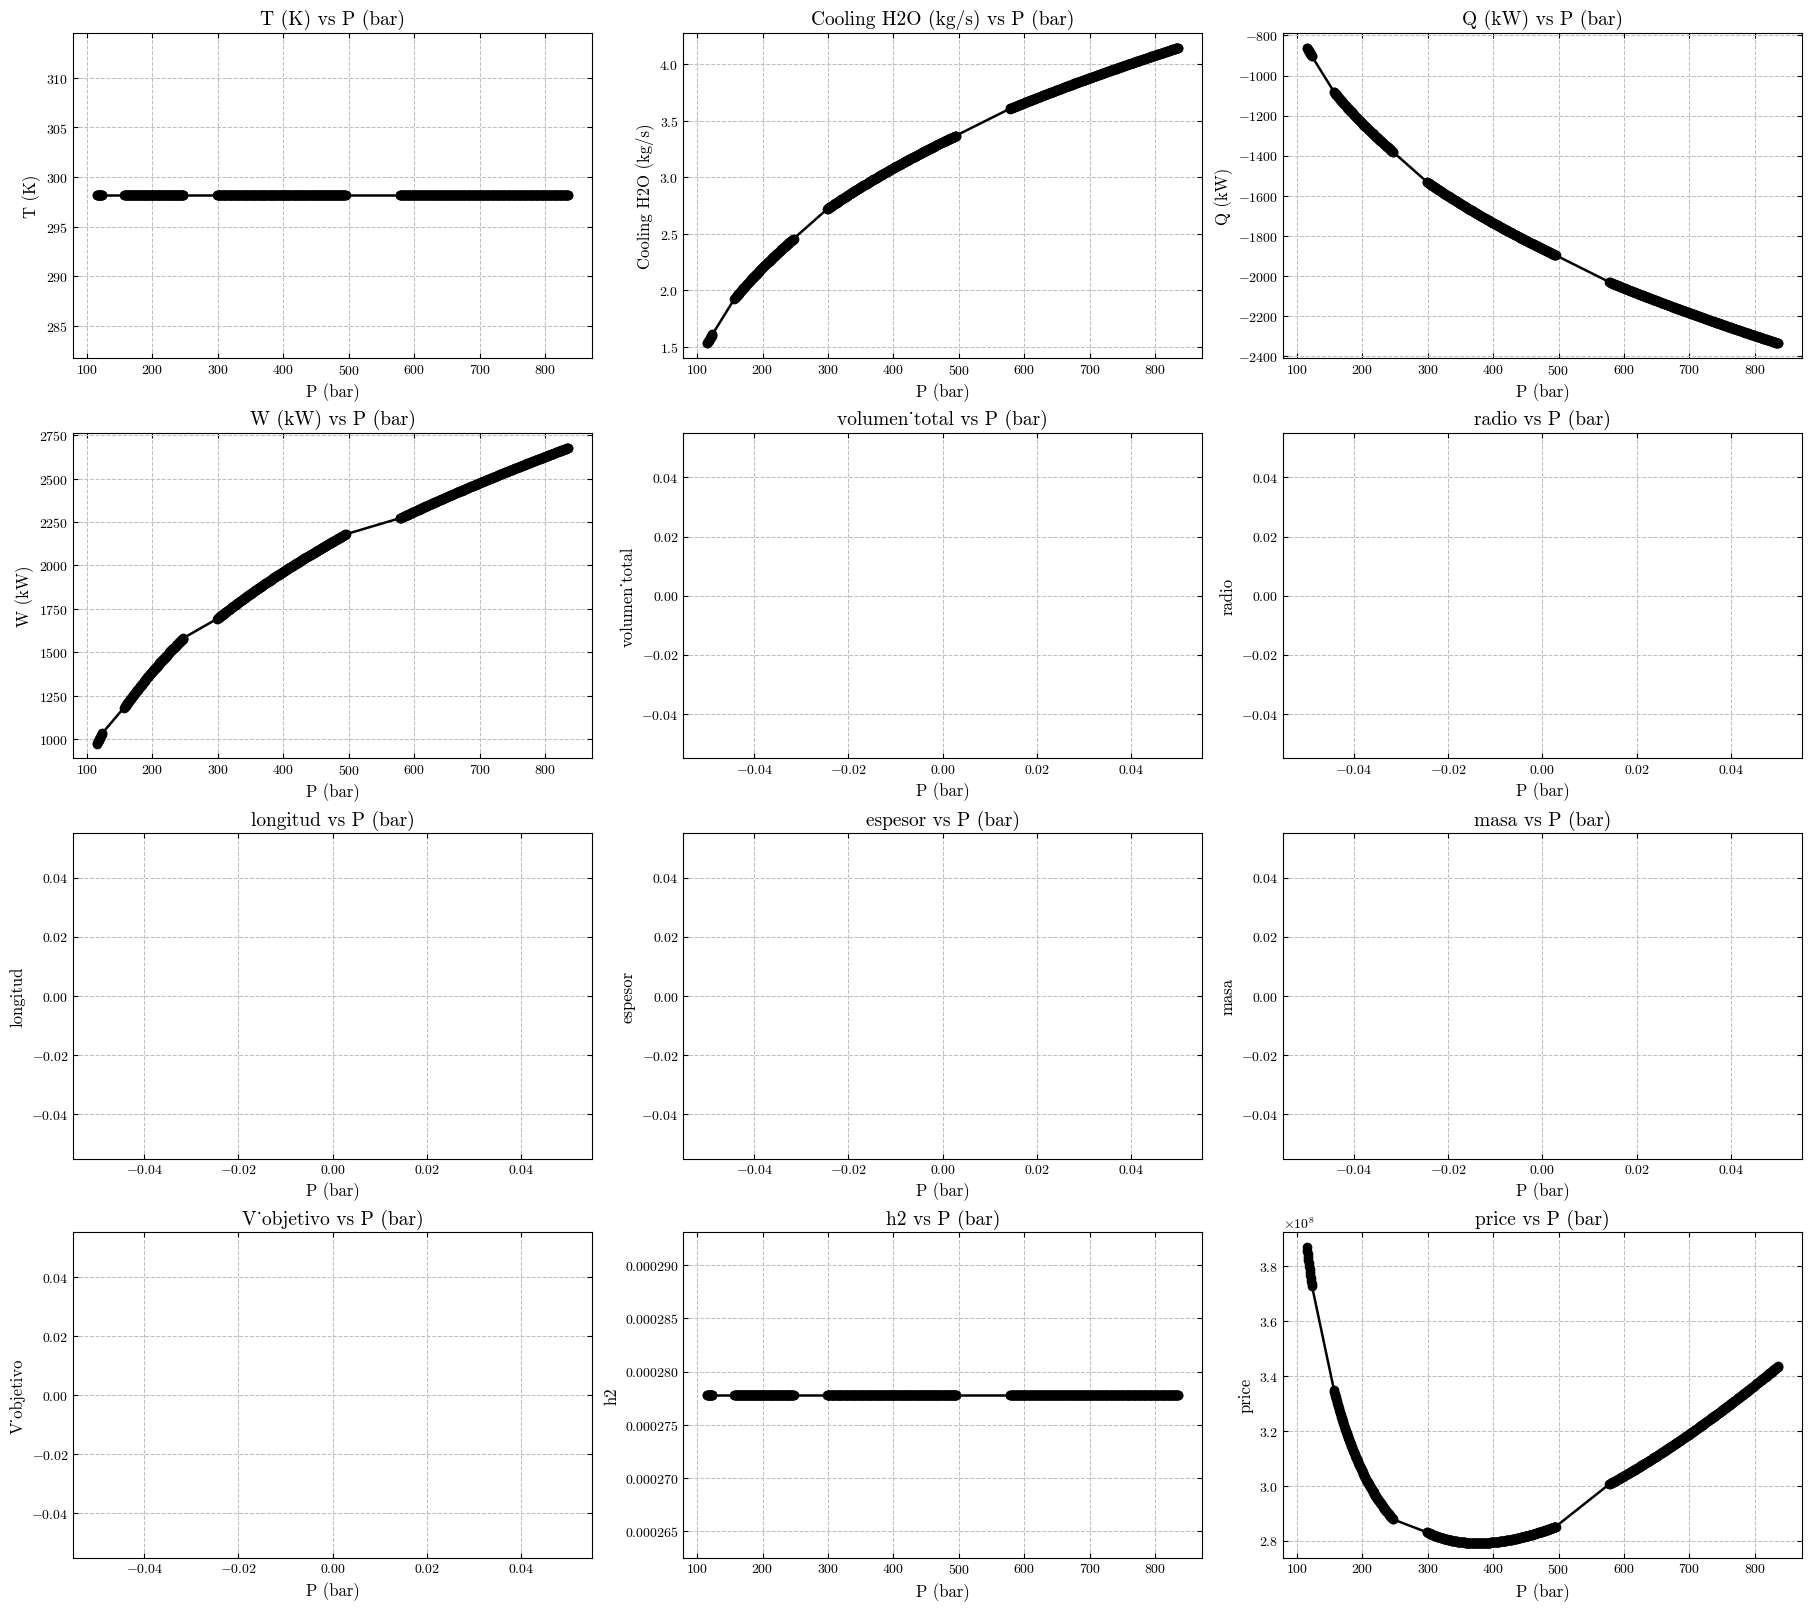

In [1163]:
import matplotlib.pyplot as plt
import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots
import math

# Desactivar el uso de LaTeX para evitar el error.
#plt.rcParams['text.usetex'] = False

# Utiliza una combinación de estilos populares para obtener un formato científico
#plt.style.use(['science'])#, 'ieee', 'std-colors'])

# Lista de variables a graficar versus "P (bar)"
variables_to_plot = [
    "T (K)",
    "Cooling H2O (kg/s)",
    "Q (kW)",
    "W (kW)",
    "volumen_total",
    "radio",
    "longitud",
    "espesor",
    "masa",
    "V_objetivo",
    "h2",
    "price"
]

# Se asume que df_resultados ya está definido y contiene la columna "P (bar)" y las demás variables
df_resultados_sorted = df_resultados.sort_values(by="P (bar)")
import pandas as pd

# Se asume que df_resultados_sorted ya está definido y contiene la columna 'price'

# Calcular el primer (Q1) y tercer cuartil (Q3)
q1 = df_resultados_sorted['price'].quantile(0.25)
q3 = df_resultados_sorted['price'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = q3 - q1

# Definir los límites inferior y superior para detectar outliers
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

# Filtrar el DataFrame eliminando los valores atípicos en la columna 'price'
df_resultados_filtrado = df_resultados_sorted[
    (df_resultados_sorted['price'] >= lower_bound) &
    (df_resultados_sorted['price'] <= upper_bound)
]
df_resultados_sorted=df_resultados_sorted
# Opcional: Mostrar el DataFrame filtrado


num_vars = len(variables_to_plot)
cols = 3
rows = math.ceil(num_vars / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), constrained_layout=True)
axes = axes.flatten()

# Graficar cada variable versus "P (bar)"
for i, var in enumerate(variables_to_plot):
    ax = axes[i]
    ax.plot(
        df_resultados_sorted["P (bar)"],
        df_resultados_sorted[var],
        marker="o", linestyle="-", color="black"
    )
    ax.set_xlabel("P (bar)")
    ax.set_ylabel(var)
    ax.set_title(f"{var} vs P (bar)")
    ax.grid(True)
    ax.tick_params(axis="both", which="both", direction="in", top=True, right=True)

# Eliminar axes vacíos en caso de que excedan el total de variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [1164]:
mini=df_resultados_sorted[df_resultados_sorted['price']==df_resultados_sorted['price'].min()]
mini

,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),volumen_total,radio,longitud,espesor,masa,V_objetivo,h2,price,It. No.
232,298.15,375.829058,3.003016,-1689.457996,1903.839265,None,None,None,None,None,None,0.000278,2.791734e+08,232


In [1165]:
compis[mini.index[0]]

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),T comp,Purchased Equipment Cost (USD)
0,No. 1,298.15,59.255607,0.749714,-421.779497,475.178245,113.381349,"$1,577,647.92"
1,No. 2,298.15,110.763952,0.735305,-413.673405,464.352878,111.380668,"$1,548,414.58"
2,No. 3,298.15,204.660698,0.742416,-417.673471,469.694741,112.367975,"$1,562,865.12"
3,No. 4,298.15,375.829058,0.775581,-436.331624,494.613401,116.972149,"$1,629,635.62"
4,Total,298.15,375.829058,3.003016,-1689.457996,1903.839265,454.102142,"$6,318,563.24"


In [1166]:
k=compis[df_resultados['It. No.'][mini.index[0]]]
k['Cooling H2O (ton/d)']=(k['Cooling H2O (kg/s)']*86400)/1e3*(4/24) #ton
k

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),T comp,Purchased Equipment Cost (USD),Cooling H2O (ton/d)
0,No. 1,298.15,59.255607,0.749714,-421.779497,475.178245,113.381349,"$1,577,647.92",10.795883
1,No. 2,298.15,110.763952,0.735305,-413.673405,464.352878,111.380668,"$1,548,414.58",10.588399
2,No. 3,298.15,204.660698,0.742416,-417.673471,469.694741,112.367975,"$1,562,865.12",10.690785
3,No. 4,298.15,375.829058,0.775581,-436.331624,494.613401,116.972149,"$1,629,635.62",11.168359
4,Total,298.15,375.829058,3.003016,-1689.457996,1903.839265,454.102142,"$6,318,563.24",43.243426


In [1167]:
k['P (bar)'][k.shape[0]-1]

np.float64(375.82905791081555)

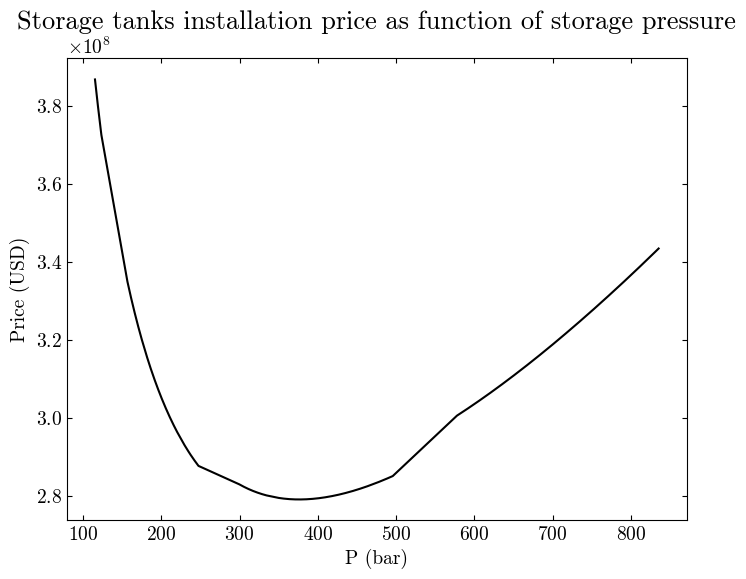

In [1168]:
import matplotlib.pyplot as plt
#import scienceplots  # Asegúrate de tener instalado: pip install SciencePlots

# Opcional: activar un estilo popular (en este ejemplo usamos 'no-latex')
plt.style.use(['no-latex'])

# Se asume que df_resultados ya está definido y contiene las columnas "P (bar)" y "price"
#df_resultados_sorted = df_resultados.sort_values(by="P (bar)")

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar 'price' en función de 'P (bar)'
ax.plot(df_resultados_sorted["P (bar)"], df_resultados_sorted["price"],
        linestyle="-", color="black",lw=1.5)

# Personalizar etiquetas y título
ax.set_xlabel("P (bar)", fontsize=14)
ax.set_ylabel("Price (USD)", fontsize=14)
ax.set_title("Storage tanks installation price as function of storage pressure", fontsize=19)

# Activar la grilla y ajustar los ticks para un formato profesional

ax.tick_params(axis="both", which="major", labelsize=14, direction="in", top=True, right=True)
ax.tick_params(axis="both", which="minor", labelsize=12, direction="in", top=True, right=True)

# Forzar notación científica (esto hará que se muestre la notación ×10^...)
ax.ticklabel_format(axis="both", style="sci")

# Aumentar el tamaño de la fuente de la notación científica (offset text)
ax.xaxis.get_offset_text().set_fontsize(14)
ax.yaxis.get_offset_text().set_fontsize(14)

plt.show()


In [1169]:
import matplotlib.pyplot as plt

# Imprime todos los estilos disponibles en Matplotlib
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'petroff10', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


Parámetros ajustados:
a = 60.62252344211928
n = 287589719.4403514


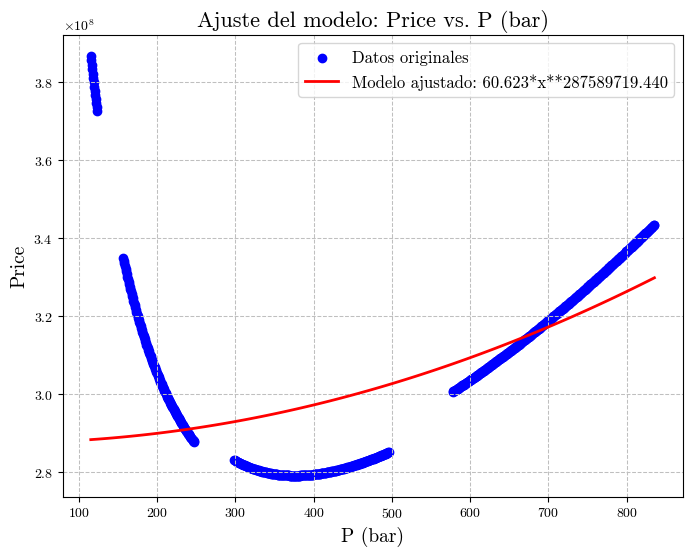

In [1170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Se asume que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' -> variable independiente (x)
# 'price'   -> variable dependiente (y)
#
# Si deseas probar con datos simulados, puedes descomentar el siguiente bloque:
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 2.5 * np.linspace(10, 100, 20)**1.2 + np.random.normal(0, 20, 20)
# })

# Extraer los datos
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Definir el modelo: f(x) = a * x^n
def model_func(x, a, n):
    return a * x**2+n

# Estimar valores iniciales para los parámetros (p0) es muy importante en la optimización no lineal
p0 = [1.0, 1.0]  # a = 1, n = 1, por ejemplo

# Ajuste del modelo usando curve_fit
# Usamos el método 'trf' para que se puedan pasar parámetros de tolerancia (xtol) y max_nfev
popt, pcov = curve_fit(
    model_func, 
    x, 
    y, 
    p0=p0, 
    method='trf', 
    xtol=1e-3,         # Tolerancia en los cambios en la solución 
    max_nfev=10000      # Número máximo de evaluaciones de la función
)

# Los parámetros optimizados se almacenan en popt
a_fit, n_fit = popt

print("Parámetros ajustados:")
print("a =", a_fit)
print("n =", n_fit)

# Crear puntos para graficar el modelo ajustado en el rango de los datos
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = model_func(x_fit, a_fit, n_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label=f'Modelo ajustado: {a_fit:.3f}*x**{n_fit:.3f}', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste del modelo: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Coeficientes ajustados:
a = 498.2471350198683
b = -442640.46287670673
c = 379657692.3514429


/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


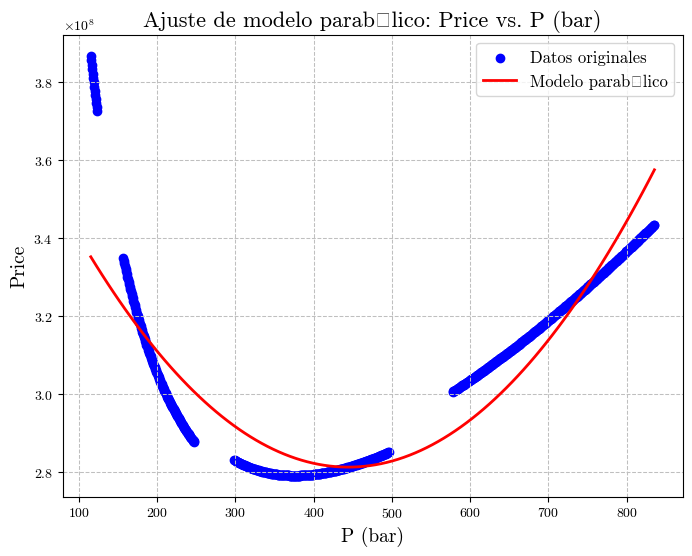

In [1171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_resultados ya está definido y contiene las columnas:
# 'P (bar)' para la presión y 'price' para el costo.
# Ejemplo de datos simulados (comenta o elimina estas líneas al trabajar con tus datos reales)
# df_resultados = pd.DataFrame({
#     "P (bar)": np.linspace(10, 100, 20),
#     "price": 0.05 * np.linspace(10, 100, 20)**2 - 2 * np.linspace(10, 100, 20) + 200 + np.random.normal(0, 20, 20)
# })

# Extraer datos de las columnas de interés
x = df_resultados['P (bar)'].values
y = df_resultados['price'].values

# Ajuste de un polinomio de grado 2 (parábola) a los datos
coeffs = np.polyfit(x, y, 2)  # coeffs = [a, b, c]
fitted_poly = np.poly1d(coeffs)

print("Coeficientes ajustados:")
print("a =", coeffs[0])
print("b =", coeffs[1])
print("c =", coeffs[2])

# Crear puntos para graficar la función ajustada
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = fitted_poly(x_fit)

# Graficar los datos originales y la curva ajustada
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos originales', color='blue')
plt.plot(x_fit, y_fit, label='Modelo parabólico', color='red', linewidth=2)
plt.xlabel("P (bar)", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.title("Ajuste de modelo parabólico: Price vs. P (bar)", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [1172]:
stages,temperature,Qk,Wk,waterr,price=[],[],[],[],[],[]
for i in range(len(Pes)):
    P=Pes[i]
    Po=31
    P_diff=P-Po
    P1=Po
    P2=P
    N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
    stages.append(N_etapas)
    P_etapa=P_diff/N_etapas
    Po=Po
    Pf=P
    P_acum=[Po]
    Temps=[25+273.15]
    Tref=Tref
    m=m
    eta=0.75
    Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
    for i in range(int(N_etapas)):
        P1=sum(P_acum)
        print(P1)
        P_acum.append(P_etapa)
        P2=sum(P_acum)
        #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
        #print('T',Ti)
        # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
        x0 = [1.0]
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
        if sol.success:
            print(sol.message)
        else:
            print(sol.message)

        resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
        print(f"W: {resultado:.20f} kW")
        # Se utiliza scipy.optimize.root con método 'hybr'
        solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

        if solucion.success:
            x_encontrado = solucion.x[0]
            print(f"Solución encontrada: x = {x_encontrado:.6f}")
            Temps.append(25+273.15)
            Qs.append(float(-e))
            Ts.append((25+273.15))
            m_H2O.append(float(x_encontrado))
            comp.append('No. '+str(i+1))
            CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
            CP=CP/2*1000
            power.append(resultado*1e3)
            Ps.append(P2)
        else:
            print("No se encontró solución:", solucion.message)
    # Crear un DataFrame con los datos
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps,  # Convertir de Pa a bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
        "W (kW)": np.array(power)
        #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
        
    }

    df_compresores = pd.DataFrame(data)

    #df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
    df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
    calculator = PriceCalculator(df_compresores,N_etapas,CS)
    
    
    temperature.append(df_compresores.loc[df_compresores.shape[0]-1]['T (K)'])
    Qk.append(df_compresores.loc[df_compresores.shape[0]-1]['Q (kW)'])
    Wk.append(df_compresores.loc[df_compresores.shape[0]-1]['W (kW)'])
    waterr.append(df_compresores.loc[df_compresores.shape[0]-1]['Cooling H2O (kg/s)'])
    resultadot = calcular_dimension_tanque(P=df_compresores.loc[df_compresores.shape[0]-1]['P (bar)'], m=10000, crit=crit, tipo='hemi', rho_tank=4500)
    
    calculator1 = TankCostCalculator("Type I", resultadot['masa']*1e3)
    price.append(calculator.final+calculator1.final)
    

31
kW 1867.2835333955588
kW 1867.2835333955588
kW 1867.2835333955588
kW 1867.2835483360004
kW 1692.125003213775
kW 1690.4741173340667
kW 1690.4582729397364
kW 1690.4582714369349
The solution converged.
W: 0.62609565608775374912 kW
Solución encontrada: x = 0.950502
70.5
kW 1024.654754246111
kW 1024.654754246111
kW 1024.654754246111
kW 1024.654762370594
kW 862.9168037527157
kW 860.9828037583148
kW 860.9569083348937
kW 860.9569032420858
kW 860.9569032420729
The solution converged.
W: 0.31887292712669362826 kW
Solución encontrada: x = 0.541610
Volumen calculado del tanque: 1173.28 m³
Radio del tanque: 4.82 m
Longitud del tanque: 19.28 m
Espesor del tanque: 385.51 mm
Masa del tanque: 4769.93 ton
31
kW 1883.521587374721
kW 1883.521587374721
kW 1883.521587374721
kW 1883.521602443879
kW 1709.3434784789445
kW 1707.7163580940992
kW 1707.7008975949536
kW 1707.700896159315
The solution converged.
W: 0.63248181339233888743 kW
Solución encontrada: x = 0.958994
71.00072568940493
kW 1029.493697819844


/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 1071.64 m³
Radio del tanque: 4.68 m
Longitud del tanque: 18.71 m
Espesor del tanque: 411.5 mm
Masa del tanque: 4511.67 ton
31
kW 1548.6362870465482
kW 1548.6362870465482
kW 1548.6362870465482
kW 1548.6362994552248
kW 1363.6724139121134
kW 1361.6796451216137
kW 1361.6571698245054
kW 1361.6571668083814
The solution converged.
W: 0.50431746918828956883 kW
Solución encontrada: x = 0.788495
61.339138848572816
kW 921.281659490192
kW 921.281659490192
kW 921.281659490192
kW 921.2816668229096
kW 768.2562459478979
kW 766.4111815114259
kW 766.3858586213139
kW 766.3858533541495
kW 766.3858533541345
The solution converged.
W: 0.28384661235338320973 kW
Solución encontrada: x = 0.494960
91.67827769714563
kW 662.4101890542253
kW 662.4101890542253
kW 662.4101890542253
kW 662.4101942878306
kW 540.8385456697644
kW 539.3679204626675
kW 539.3467448756957
kW 539.346739964268
kW 539.346739964252
The solution converged.
W: 0.19975805183861186642 kW
Solución encontrada: x = 0.3829

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 610.3744226876115
The solution converged.
W: 0.22606460099541161868 kW
Solución encontrada: x = 0.417994
Volumen calculado del tanque: 797.0 m³
Radio del tanque: 4.24 m
Longitud del tanque: 16.95 m
Espesor del tanque: 511.66 mm
Masa del tanque: 3838.77 ton
31
kW 2050.733103145761
kW 2050.733103145761
kW 2050.733103145761
kW 2050.7331195384863
kW 1889.4349148322588
kW 1888.0809864007429
kW 1888.0695440020188
kW 1888.069543170551
The solution converged.
W: 0.69928501598909320602 kW
Solución encontrada: x = 1.047809
76.36090953072085
kW 1077.2060282881396
kW 1077.2060282881396
kW 1077.2060282881396
kW 1077.2060368076502
kW 911.8160603836966
kW 909.8508060604097
kW 909.8248670577301
kW 909.8248621181301
kW 909.8248621181178
The solution converged.
W: 0.33697217115485839090 kW
Solución encontrada: x = 0.565713
121.72181906144169
kW 743.9209501933522
kW 743.9209501933522
kW 743.9209501933522
kW 743.9209560069478
kW 613.2576845949988
kW 611.6835659283743
kW 611.6613473541413
kW 611.6613424

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 690.94 m³
Radio del tanque: 4.04 m
Longitud del tanque: 16.16 m
Espesor del tanque: 570.25 mm
Masa del tanque: 3597.28 ton
31
kW 2316.958125256058
kW 2316.958125256058
kW 2316.958125256058
kW 2316.958143748112
kW 2186.890457371945
kW 2186.04147332558
kW 2186.035951648281
kW 2186.0359514137667
The solution converged.
W: 0.80964294496806210599 kW
Solución encontrada: x = 1.194427
85.70778906627962
kW 1146.0803891514963
kW 1146.0803891514963
kW 1146.0803891514963
kW 1146.0803981777606
kW 976.7613556790707
kW 974.7711813508799
kW 974.7454644698495
kW 974.7454597980901
kW 974.7454597980797
The solution converged.
W: 0.36101683696225178588 kW
Solución encontrada: x = 0.597732
140.41557813255923
kW 779.4155005131568
kW 779.4155005131568
kW 779.4155005131568
kW 779.4155065599805
kW 645.5586738515151
kW 643.9547358849717
kW 643.932375914743
kW 643.9323710750269
kW 643.9323710750123
The solution converged.
W: 0.23849347076852298044 kW
Solución encontrada: x = 0.4345

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 435.29 m³
Radio del tanque: 3.46 m
Longitud del tanque: 13.86 m
Espesor del tanque: 829.32 mm
Masa del tanque: 3143.72 ton
31
kW 3304.2163718959973
kW 3304.2163718959973
kW 3304.2163718959973
kW 3304.216398052393
kW 3413.8161731566447
kW 3413.2405443955613
kW 3413.2436232077434
kW 3413.2436232971436
The solution converged.
W: 1.26416430492486830950 kW
Solución encontrada: x = 1.796197
130.77310111272374
kW 1348.5788335125983
kW 1348.5788335125983
kW 1348.5788335125983
kW 1348.5788438989473
kW 1174.3250870915251
kW 1172.3924974195036
kW 1172.3696312277345
kW 1172.369627793459
The solution converged.
W: 0.43421097325683666313 kW
Solución encontrada: x = 0.695183
230.54620222544747
kW 889.0617479664941
kW 889.0617479664941
kW 889.0617479664941
kW 889.0617546032821
kW 749.5268231516965
kW 747.9225772737118
kW 747.9016161421076
kW 747.9016121644565
kW 747.9016121644476
The solution converged.
W: 0.27700059709794355722 kW
Solución encontrada: x = 0.485842
Volume

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 340.43 m³
Radio del tanque: 3.19 m
Longitud del tanque: 12.77 m
Espesor del tanque: 1035.93 mm
Masa del tanque: 3117.57 ton
31
kW 3929.9170113206133
kW 3929.9170113206133
kW 3929.9170113206133
kW 3929.9170421854196
kW 4302.087898632511
kW 4295.299692059558
kW 4295.432790008637
kW 4295.43284439614
kW 4295.432844395696
The solution converged.
W: 1.59090105347988708395 kW
Solución encontrada: x = 2.225219
169.82970488630866
kW 1452.0936857130848
kW 1452.0936857130848
kW 1452.0936857130848
kW 1452.0936966597114
kW 1280.0027469046483
kW 1278.1943504019923
kW 1278.1744030497634
kW 1278.17440046298
The solution converged.
W: 0.47339792609739989038 kW
Solución encontrada: x = 0.747345
308.6594097726173
kW 953.7148639868713
kW 953.7148639868713
kW 953.7148639868713
kW 953.7148708538598
kW 814.1856881712976
kW 812.6531556094195
kW 812.6343123142725
kW 812.634309145739
kW 812.6343091457329
The solution converged.
W: 0.30097567005397518614 kW
Solución encontrada: x = 

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 959.2021784912776
kW 959.2021784912776
kW 959.2021784912776
kW 959.2021853739056
kW 819.7756913095435
kW 818.2511693446667
kW 818.2325331012506
kW 818.2325300033992
kW 818.2325300033925
The solution converged.
W: 0.30304908518644163573 kW
Solución encontrada: x = 0.520536
Volumen calculado del tanque: 333.48 m³
Radio del tanque: 3.17 m
Longitud del tanque: 12.68 m
Espesor del tanque: 1056.53 mm
Masa del tanque: 3123.51 ton
31
kW 3986.4999901786905
kW 3986.4999901786905
kW 3986.4999901786905
kW 3986.5000214614256
kW 4386.963369191593
kW 4379.075233943085
kW 4379.24324467414
kW 4379.24332608147
kW 4379.243326080614
The solution converged.
W: 1.62194197262244954594 kW
Solución encontrada: x = 2.265744
173.83551040154813
kW 1460.984436588428
kW 1460.984436588428
kW 1460.984436588428
kW 1460.9844475770697
kW 1289.2470665904352
kW 1287.4525731252768
kW 1287.432919224563
kW 1287.4329167131095
The solution converged.
W: 0.47682700619004059206 kW
Solución encontrada: x = 0.751909
316.6710208

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 4434.523722596433
kW 4434.5237225951305
The solution converged.
W: 1.64241619355375223499 kW
Solución encontrada: x = 2.292448
176.50604741170778
kW 1466.7834547973637
kW 1466.7834547973637
kW 1466.7834547973637
kW 1466.7834658128465
kW 1295.2911351401146
kW 1293.5059795120494
kW 1293.486520146125
kW 1293.486517683791
The solution converged.
W: 0.47906908062362624223 kW
Solución encontrada: x = 0.754893
322.01209482341557
kW 963.6399620860293
kW 963.6399620860293
kW 963.6399620860293
kW 963.6399689809015
kW 824.3067545897593
kW 822.7888825561697
kW 822.770415669155
kW 822.7704126282554
kW 822.7704126282493
The solution converged.
W: 0.30472978245490717208 kW
Solución encontrada: x = 0.522774
Volumen calculado del tanque: 328.54 m³
Radio del tanque: 3.15 m
Longitud del tanque: 12.62 m
Espesor del tanque: 1071.95 mm
Masa del tanque: 3129.12 ton
31
kW 4028.1793702816935
kW 4028.1793702816935
kW 4028.1793702816935
kW 4028.179401871323
kW 4449.978564406766
kW 4441.202666573838
kW 4441.40

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 324.8 m³
Radio del tanque: 3.14 m
Longitud del tanque: 12.57 m
Espesor del tanque: 1083.88 mm
Masa del tanque: 3133.6 ton
31
kW 4060.1636630021285
kW 4060.1636630021285
kW 4060.1636630021285
kW 4060.1636948267096
kW 4498.621969694375
kW 4489.117622822598
kW 4489.342139856917
kW 4489.342274530714
kW 4489.3422745287635
The solution converged.
W: 1.66271936093657934919 kW
Solución encontrada: x = 2.318907
179.17658442186743
kW 1472.4858185903188
kW 1472.4858185903188
kW 1472.4858185903188
kW 1472.4858296317523
kW 1301.2455572043073
kW 1299.4697781231644
kW 1299.4505122433093
kW 1299.4505098292016
The solution converged.
W: 0.48127796660340793622 kW
Solución encontrada: x = 0.757833
327.35316884373486
kW 967.548015039024
kW 967.548015039024
kW 967.548015039024
kW 967.5480219443883
kW 828.3043038088123
kW 826.7924109491582
kW 826.774094488153
kW 826.774091497211
kW 826.7740914972053
The solution converged.
W: 0.30621262648044639265 kW
Solución encontrada: x = 0

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 318.67 m³
Radio del tanque: 3.12 m
Longitud del tanque: 12.49 m
Espesor del tanque: 1104.29 mm
Masa del tanque: 3142.36 ton
31
kW 4114.143356193924
kW 4114.143356193924
kW 4114.143356193924
kW 4114.1433884139005
kW 4581.283149578269
kW 4570.451379713005
kW 4570.726676685906
kW 4570.726868749122
kW 4570.726868745643
The solution converged.
W: 1.69286180323912671675 kW
Solución encontrada: x = 2.358149
183.1823899371069
kW 1480.8682826261897
kW 1480.8682826261897
kW 1480.8682826261897
kW 1480.8682937049737
kW 1310.0184256009568
kW 1308.2567863943589
kW 1308.2378088270825
kW 1308.2378064836978
The solution converged.
W: 0.48453252091988813222 kW
Solución encontrada: x = 0.762164
335.3647798742138
kW 973.3496489247796
kW 973.3496489247796
kW 973.3496489247796
kW 973.3496558452255
kW 834.2511081715088
kW 832.7482830589696
kW 832.7301917430485
kW 832.7301888258067
kW 832.7301888258012
The solution converged.
W: 0.30841858845400038636 kW
Solución encontrada: x = 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 313.31 m³
Radio del tanque: 3.1 m
Longitud del tanque: 12.42 m
Espesor del tanque: 1122.93 mm
Masa del tanque: 3151.3 ton
31
kW 4162.715800033156
kW 4162.715800033156
kW 4162.715800033156
kW 4162.7158326076815
kW 4656.274137851804
kW 4644.136593167364
kW 4644.465489343495
kW 4644.465751294646
kW 4644.4657512888625
The solution converged.
W: 1.72017250047735692497 kW
Solución encontrada: x = 2.393660
186.85437832607644
kW 1488.3828244226918
kW 1488.3828244226918
kW 1488.3828244226918
kW 1488.3828355341416
kW 1317.9029653372556
kW 1316.1543453411855
kW 1316.135629834617
kW 1316.1356275543665
The solution converged.
W: 0.48745763983495055127 kW
Solución encontrada: x = 0.766057
342.7087566521529
kW 978.6084535340158
kW 978.6084535340158
kW 978.6084535340158
kW 978.6084604676369
kW 839.6537764962143
kW 838.1593577970173
kW 838.1414721865286
kW 838.1414693355388
kW 838.1414693355334
The solution converged.
W: 0.31042276642056787495 kW
Solución encontrada: x = 0

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 309.1 m³
Radio del tanque: 3.09 m
Longitud del tanque: 12.36 m
Espesor del tanque: 1138.12 mm
Masa del tanque: 3159.15 ton
31
kW 4201.8352717359385
kW 4201.8352717359385
kW 4201.8352717359385
kW 4201.835304595138
kW 4717.09265089737
kW 4703.822195302992
kW 4704.200408054758
kW 4704.200742445555
kW 4704.200742436926
The solution converged.
W: 1.74229657127293546814 kW
Solución encontrada: x = 2.422396
189.85873246250603
kW 1494.41802748987
kW 1494.41802748987
kW 1494.41802748987
kW 1494.4180386269966
kW 1324.2489303590319
kW 1322.5110034915213
kW 1322.4925008337973
kW 1322.49249860404
The solution converged.
W: 0.48981203652001492621 kW
Solución encontrada: x = 0.769191
348.71746492501205
kW 982.8718196346942
kW 982.8718196346942
kW 982.8718196346942
kW 982.8718265786614
kW 844.0420339374122
kW 842.5545524983092
kW 842.536834593751
kW 842.5368317960307
kW 842.5368317960258
The solution converged.
W: 0.31205067844297257329 kW
Solución encontrada: x = 0.53252

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

Volumen calculado del tanque: 298.18 m³
Radio del tanque: 3.05 m
Longitud del tanque: 12.21 m
Espesor del tanque: 1180.14 mm
Masa del tanque: 3183.93 ton
31
kW 4307.719227013589
kW 4307.719227013589
kW 4307.719227013589
kW 4307.719260639267
kW 4883.607972915997
kW 4866.8775092499345
kW 4867.421652472593
kW 4867.422284982854
kW 4867.422284958291
The solution converged.
W: 1.80274899442899649848 kW
Solución encontrada: x = 2.500766
198.20416061925494
kW 1510.6930412404408
kW 1510.6930412404408
kW 1510.6930412404408
kW 1510.693052444308
kW 1341.4217006329407
kW 1339.7136034698556
kW 1339.6956840774628
kW 1339.6956819825693
The solution converged.
W: 0.49618358591947003822 kW
Solución encontrada: x = 0.777670
365.40832123850987
kW 994.5463069078955
kW 994.5463069078955
kW 994.5463069078955
kW 994.5463138787196
kW 856.0944433595583
kW 854.6264571773507
kW 854.6092015252519
kW 854.6091988710293
The solution converged.
W: 0.31652192550778868174 kW
Solución encontrada: x = 0.538479
Volumen cal

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

31
kW 4405.771242476685
kW 4405.771242476685
kW 4405.771242476685
kW 4405.771276806668
kW 5040.295772928155
kW 5019.796206831422
kW 5020.54567917335
kW 5020.546789839853
kW 5020.546789777856
The solution converged.
W: 1.85946177399179846113 kW
Solución encontrada: x = 2.574075
206.2157716497339
kW 1525.709782655155
kW 1525.709782655155
kW 1525.709782655155
kW 1525.7097939173536
kW 1357.3427266510057
kW 1355.6633591034035
kW 1355.6459879625181
kW 1355.6459859898762
The solution converged.
W: 0.50209110592217631730 kW
Solución encontrada: x = 0.785532
381.4315432994678
kW 1005.5480473265699
kW 1005.5480473265699
kW 1005.5480473265699
kW 1005.548054320835
kW 867.49727813194
kW 866.0482408478757
kW 866.0314229140577
kW 866.0314203913982
The solution converged.
W: 0.32075237792273997295 kW
Solución encontrada: x = 0.544113
Volumen calculado del tanque: 288.27 m³
Radio del tanque: 3.02 m
Longitud del tanque: 12.08 m
Espesor del tanque: 1221.87 mm
Masa del tanque: 3212.34 ton
31
kW 4409.78455

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1006.456689925594
kW 1006.456689925594
kW 1006.456689925594
kW 1006.4566969217175
kW 868.4408789664749
kW 866.9934272791522
kW 866.9766455064256
kW 866.976642994454
The solution converged.
W: 0.32110246036831630034 kW
Solución encontrada: x = 0.544579
Volumen calculado del tanque: 287.52 m³
Radio del tanque: 3.02 m
Longitud del tanque: 12.07 m
Espesor del tanque: 1225.2 mm
Masa del tanque: 3214.76 ton
31
kW 4417.794376017341
kW 4417.794376017341
kW 4417.794376017341
kW 4417.794410433309
kW 5059.674440919604
kW 5038.672043475419
kW 5039.450744186117
kW 5039.451932295283
kW 5039.451932226016
The solution converged.
W: 1.86646367860222883728 kW
Solución encontrada: x = 2.583111
207.21722302854377
kW 1527.5489135223763
kW 1527.5489135223763
kW 1527.5489135223763
kW 1527.5489247915048
kW 1359.2975236169902
kW 1357.6217497368123
kW 1357.6044462953787
kW 1357.6044443375365
The solution converged.
W: 0.50281646086575426668 kW
Solución encontrada: x = 0.786497
383.43444605708754
kW 1006.9105

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

31
kW 4421.790919781293
kW 4421.790919781293
kW 4421.790919781293
kW 4421.790954225829
kW 5066.124069392506
kW 5044.952432945025
kW 5045.741064773562
kW 5045.74227971591
kW 5045.742279644049
The solution converged.
W: 1.86879343690520371979 kW
Solución encontrada: x = 2.586117
207.5510401548137
kW 1528.1601759704515
kW 1528.1601759704515
kW 1528.1601759704515
kW 1528.160187241872
kW 1359.9474656986936
kW 1358.2728883692625
kW 1358.2556074385438
kW 1358.25560548561
The solution converged.
W: 0.50305763166133699027 kW
Solución encontrada: x = 0.786818
384.1020803096274
kW 1007.3641464364689
kW 1007.3641464364689
kW 1007.3641464364689
kW 1007.3641534344383
kW 869.3835153463975
kW 867.9376520316123
kW 867.9209063917401
kW 867.9209038904197
The solution converged.
W: 0.32145218662608132654 kW
Solución encontrada: x = 0.545045
Volumen calculado del tanque: 286.77 m³
Radio del tanque: 3.01 m
Longitud del tanque: 12.06 m
Espesor del tanque: 1228.52 mm
Masa del tanque: 3217.19 ton
31
kW 4425.78

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 5383.343226550512
The solution converged.
W: 1.99383082464833782943 kW
Solución encontrada: x = 2.746860
225.9109820996613
kW 1560.540078803872
kW 1560.540078803872
kW 1560.540078803872
kW 1560.5400901894664
kW 1394.5394788384995
kW 1392.93069464075
kW 1392.9146199201036
kW 1392.9146182200413
The solution converged.
W: 0.51589430304445960118 kW
Solución encontrada: x = 0.803901
420.8219641993226
kW 1031.9044817179115
kW 1031.9044817179115
kW 1031.9044817179115
kW 1031.9044887617092
kW 894.9700588372928
kW 893.568069640311
kW 893.5522962393405
kW 893.5522940147173
The solution converged.
W: 0.33094529407952494315 kW
Solución encontrada: x = 0.557687
Volumen calculado del tanque: 268.13 m³
Radio del tanque: 2.95 m
Longitud del tanque: 11.79 m
Espesor del tanque: 1319.33 mm
Masa del tanque: 3291.83 ton
31
kW 4637.237846137162
kW 4637.237846137162
kW 4637.237846137162
kW 4637.237882107347
kW 5419.771579004696
kW 5387.818001628071
kW 5389.331765426097
kW 5389.335613462039
kW 5389.3356129

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 259.33 m³
Radio del tanque: 2.91 m
Longitud del tanque: 11.66 m
Espesor del tanque: 1368.4 mm
Masa del tanque: 3338.12 ton
31
kW 4746.482542223869
kW 4746.482542223869
kW 4746.482542223869
kW 4746.482578956495
kW 5603.591532703708
kW 5564.760271315772
kW 5566.824218424217
kW 5566.8308919105575
kW 5566.830890715093
The solution converged.
W: 2.06178921878336796070 kW
Solución encontrada: x = 2.833710
236.25931301403
kW 1577.8634083615123
kW 1577.8634083615123
kW 1577.8634083615123
kW 1577.8634198024135
kW 1413.1723393419622
kW 1411.6003973270772
kW 1411.5849733680689
kW 1411.5849717964725
The solution converged.
W: 0.52280924881350820943 kW
Solución encontrada: x = 0.813102
441.51862602806
kW 1045.4377905638623
kW 1045.4377905638623
kW 1045.4377905638623
kW 1045.4377976298683
kW 909.15029779469
kW 907.7730671479713
kW 907.7578221172885
kW 907.7578200353228
The solution converged.
W: 0.33620660001308250164 kW
Solución encontrada: x = 0.564694
Volumen calcula

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 249.82 m³
Radio del tanque: 2.88 m
Longitud del tanque: 11.51 m
Espesor del tanque: 1426.92 mm
Masa del tanque: 3398.25 ton
31
kW 4872.5478851546795
kW 4872.5478851546795
kW 4872.5478851546795
kW 4872.5479227571805
kW 5819.502042381174
kW 5771.345175392811
kW 5774.253455275174
kW 5774.265746138109
kW 5774.265742851585
The solution converged.
W: 2.13861694179688344164 kW
Solución encontrada: x = 2.931413
248.27672955974842
kW 1597.2945274401197
kW 1597.2945274401197
kW 1597.2945274401197
kW 1597.2945389384338
kW 1434.169839469338
kW 1432.6403140492132
kW 1432.6256190339886
kW 1432.625617599905
The solution converged.
W: 0.53060208059255742352 kW
Solución encontrada: x = 0.823472
465.55345911949684
kW 1060.9386248267813
kW 1060.9386248267813
kW 1060.9386248267813
kW 1060.9386319158732
kW 925.4441796277488
kW 924.0955681705461
kW 924.0809175722285
kW 924.0809156445437
The solution converged.
W: 0.34225219097946069091 kW
Solución encontrada: x = 0.572744
Volum

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

Volumen calculado del tanque: 246.88 m³
Radio del tanque: 2.87 m
Longitud del tanque: 11.47 m
Espesor del tanque: 1446.33 mm
Masa del tanque: 3419.32 ton
31
kW 4913.438569841132
kW 4913.438569841132
kW 4913.438569841132
kW 4913.438607723413
kW 5890.409228335262
kW 5838.874877412858
kW 5842.115150070716
kW 5842.13005503708
kW 5842.130050512697
The solution converged.
W: 2.16375187056025808374 kW
Solución encontrada: x = 2.963260
252.2825350749879
kW 1603.6268218111516
kW 1603.6268218111516
kW 1603.6268218111516
kW 1603.6268333271498
kW 1441.0337793457063
kW 1439.51828686127
kW 1439.5038284205289
kW 1439.5038270296518
The solution converged.
W: 0.53314956556653769759 kW
Solución encontrada: x = 0.826861
473.5650701499758
kW 1066.0608862033116
kW 1066.0608862033116
kW 1066.0608862033116
kW 1066.0608932995253
kW 930.8395081943327
kW 929.5003861306378
kW 929.4859289818783
kW 929.4859271030156
The solution converged.
W: 0.34425404707519091652 kW
Solución encontrada: x = 0.575410
Volumen calc

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 244.03 m³
Radio del tanque: 2.86 m
Longitud del tanque: 11.43 m
Espesor del tanque: 1465.71 mm
Masa del tanque: 3440.88 ton
31
kW 4953.794467314378
kW 4953.794467314378
kW 4953.794467314378
kW 4953.794505471603
kW 5960.809536846908
kW 5905.759889855851
kW 5909.359809767421
kW 5909.377796098898
kW 5909.377789920142
The solution converged.
W: 2.18865844071116422143 kW
Solución encontrada: x = 2.994757
256.28834059022734
kW 1609.8930962396385
kW 1609.8930962396385
kW 1609.8930962396385
kW 1609.8931077726525
kW 1447.836002846873
kW 1446.3344845282263
kW 1446.3202594660363
kW 1446.3202581171076
The solution converged.
W: 0.53567416967300263142 kW
Solución encontrada: x = 0.830221
481.57668118045467
kW 1071.1630035653764
kW 1071.1630035653764
kW 1071.1630035653764
kW 1071.1630106684484
kW 936.2186356192146
kW 934.8889707697351
kW 934.874704685069
kW 934.8747028537671
The solution converged.
W: 0.34624988994583966173 kW
Solución encontrada: x = 0.578068
Volumen c

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 241.29 m³
Radio del tanque: 2.85 m
Longitud del tanque: 11.38 m
Espesor del tanque: 1485.06 mm
Masa del tanque: 3462.98 ton
31
kW 4993.632729666364
kW 4993.632729666364
kW 4993.632729666364
kW 4993.632768093842
kW 6030.71682919981
kW 5972.012028618841
kW 5976.000731639905
kW 5976.0223349537655
kW 5976.022326579897
The solution converged.
W: 2.21334160243699917814 kW
Solución encontrada: x = 3.025912
260.2941461054669
kW 1616.096786665569
kW 1616.096786665569
kW 1616.096786665569
kW 1616.096798214959
kW 1454.579704891393
kW 1453.0920941852253
kW 1453.07809927041
kW 1453.0780979621948
The solution converged.
W: 0.53817707331933140047 kW
Solución encontrada: x = 0.833551
489.5882922109338
kW 1076.2461518052364
kW 1076.2461518052364
kW 1076.2461518052364
kW 1076.2461589149175
kW 941.5825094296619
kW 940.262268305177
kW 940.2481909096933
kW 940.2481891247238
The solution converged.
W: 0.34824007004619400574 kW
Solución encontrada: x = 0.580718
Volumen calculado

/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated.

kW 1086.35982585966
kW 1086.35982585966
kW 1086.35982585966
kW 1086.359832981859
kW 952.2679521453867
kW 950.9664460973345
kW 950.9527389317308
kW 950.9527372358472
The solution converged.
W: 0.35220471749475823486 kW
Solución encontrada: x = 0.585998
Volumen calculado del tanque: 235.86 m³
Radio del tanque: 2.82 m
Longitud del tanque: 11.3 m
Espesor del tanque: 1525.23 mm
Masa del tanque: 3510.29 ton
31
kW 5075.037190341096
kW 5075.037190341096
kW 5075.037190341096
kW 5075.037229317146
kW 6174.8310424814845
kW 6108.053105632362
kW 6112.952012871448
kW 6112.983215040801
kW 6112.983199624548
The solution converged.
W: 2.26406785171279567592 kW
Solución encontrada: x = 3.089743
268.6395742622158
kW 1628.8339383665002
kW 1628.8339383665002
kW 1628.8339383665002
kW 1628.8339499480958
kW 1468.4539179042592
kW 1466.9950805455242
kW 1466.9815550162
kW 1466.981553789036
The solution converged.
W: 0.54332650140334659561 kW
Solución encontrada: x = 0.840402
506.27914852443155
kW 1086.77979497211

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1634.3634754925001
kW 1634.3634754925001
kW 1634.3634754925001
kW 1634.3634870874941
kW 1474.4885403953615
kW 1473.0422672313719
kW 1473.0289438888822
kW 1473.0289426958143
The solution converged.
W: 0.54556627507252375420 kW
Solución encontrada: x = 0.843382
513.6231253023707
kW 1091.3923074748297
kW 1091.3923074748297
kW 1091.3923074748297
kW 1091.3923146029597
kW 957.5910945391869
kW 956.298895176321
kW 956.28536955582
kW 956.2853679027465
The solution converged.
W: 0.35417976588990612852 kW
Solución encontrada: x = 0.588628
Volumen calculado del tanque: 233.38 m³
Radio del tanque: 2.81 m
Longitud del tanque: 11.26 m
Espesor del tanque: 1544.46 mm
Masa del tanque: 3533.71 ton
31
kW 5113.379169449691
kW 5113.379169449691
kW 5113.379169449691
kW 5113.3792086823805
kW 6243.299387432893
kW 6172.422244306183
kW 6177.809428428027
kW 6177.846416423253
kW 6177.846395973648
The solution converged.
W: 2.28809125776801813856 kW
Solución encontrada: x = 3.119878
272.6453797774552
kW 1634.864

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 231.18 m³
Radio del tanque: 2.81 m
Longitud del tanque: 11.22 m
Espesor del tanque: 1562.05 mm
Masa del tanque: 3555.55 ton
31
kW 5148.125632303828
kW 5148.125632303828
kW 5148.125632303828
kW 5148.125671768121
kW 6305.673470236311
kW 6230.908467644862
kW 6236.77439730482
kW 6236.817479585085
kW 6236.81745323769
kW 6236.817453237805
The solution converged.
W: 2.30993239008807638157 kW
Solución encontrada: x = 3.147222
276.3173681664248
kW 1640.3469865706904
kW 1640.3469865706904
kW 1640.3469865706904
kW 1640.3469981797932
kW 1481.026142800693
kW 1479.5935032263387
kW 1479.5803974204102
kW 1479.58039626348
The solution converged.
W: 0.54799273935684433834 kW
Solución encontrada: x = 0.846611
521.6347363328496
kW 1096.409743796807
kW 1096.409743796807
kW 1096.409743796807
kW 1096.4097509306625
kW 962.9021419399218
kW 961.6192050280744
kW 961.6058585714109
kW 961.6058569600257
The solution converged.
W: 0.35615031739260200050 kW
Solución encontrada: x = 0.591

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 229.04 m³
Radio del tanque: 2.8 m
Longitud del tanque: 11.19 m
Espesor del tanque: 1579.62 mm
Masa del tanque: 3577.75 ton
31
kW 5182.499951772194
kW 5182.499951772194
kW 5182.499951772194
kW 5182.499991464678
kW 6367.684559866766
kW 6288.905752926133
kW 6295.281503170019
kW 6295.331526446738
kW 6295.331492675033
kW 6295.331492675202
The solution converged.
W: 2.33160425654637126769 kW
Solución encontrada: x = 3.174302
279.98935655539424
kW 1645.7892781365576
kW 1645.7892781365576
kW 1645.7892781365576
kW 1645.789289758153
kW 1486.9790271647546
kW 1485.5588259400863
kW 1485.5459168662321
kW 1485.5459157414998
The solution converged.
W: 0.55020219101537037876 kW
Solución encontrada: x = 0.849550
528.9787131107885
kW 1100.9965429511399
kW 1100.9965429511399
kW 1100.9965429511399
kW 1100.9965500900732
kW 967.7605346305342
kW 966.4860505522822
kW 966.4728662730143
kW 966.4728646988889
The solution converged.
W: 0.35795291285144026361 kW
Solución encontrada: x 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1647.7585608773534
kW 1647.7585608773534
kW 1647.7585608773534
kW 1647.758572503389
kW 1489.1345910621192
kW 1487.7188958489194
kW 1487.7060576578538
kW 1487.7060565446102
The solution converged.
W: 0.55100224316467050212 kW
Solución encontrada: x = 0.850615
531.6492501209482
kW 1102.6616222242938
kW 1102.6616222242938
kW 1102.6616222242938
kW 1102.6616293650325
kW 969.5249350045128
kW 968.2535125715797
kW 968.2403867501507
kW 968.2403851893453
The solution converged.
W: 0.35860755007012784512 kW
Solución encontrada: x = 0.594524
Volumen calculado del tanque: 228.09 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.17 m
Espesor del tanque: 1587.59 mm
Masa del tanque: 3587.87 ton
31
kW 5198.004355291448
kW 5198.004355291448
kW 5198.004355291448
kW 5198.004395086549
kW 6395.753688620167
kW 6315.108365936891
kW 6321.72646863196
kW 6321.779952524569
kW 6321.779914781034
kW 6321.779914781252
The solution converged.
W: 2.34139996843750042288 kW
Solución encontrada: x = 3.186524
281.6584

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


Volumen calculado del tanque: 227.9 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.17 m
Espesor del tanque: 1589.19 mm
Masa del tanque: 3589.92 ton
31
kW 5201.096340369676
kW 5201.096340369676
kW 5201.096340369676
kW 5201.09638018522
kW 6401.358802313147
kW 6320.336987712194
kW 6327.00437461367
kW 6327.058574851716
kW 6327.058536264096
kW 6327.058536264318
The solution converged.
W: 2.34335501343122887263 kW
Solución encontrada: x = 3.188963
281.9922593130141
kW 1648.741300508296
kW 1648.741300508296
kW 1648.741300508296
kW 1648.741312136531
kW 1490.210591282878
kW 1488.7971446586996
kW 1488.7843417694253
kW 1488.7843406618802
The solution converged.
W: 0.55140160765254819797 kW
Solución encontrada: x = 0.851146
532.9845186260281
kW 1103.4936069183707
kW 1103.4936069183707
kW 1103.4936069183707
kW 1103.4936140600053
kW 970.4066876096877
kW 969.1367952035203
kW 969.1236985252119
kW 969.1236969710247
The solution converged.
W: 0.35893470258186105371 kW
Solución encontrada: x = 0.594

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 1103.9094619939285
kW 1103.9094619939285
kW 1103.9094619939285
kW 1103.9094691360092
kW 970.8474533634061
kW 969.5783255935837
kW 969.5652434636021
kW 969.5652419127138
The solution converged.
W: 0.35909823774544963326 kW
Solución encontrada: x = 0.595177
Volumen calculado del tanque: 227.52 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.16 m
Espesor del tanque: 1592.38 mm
Masa del tanque: 3594.02 ton
31
kW 5207.27147313998
kW 5207.27147313998
kW 5207.27147313998
kW 5207.271512996322
kW 6412.56023969458
kW 6330.782381258037
kW 6337.549146434696
kW 6337.604804020231
kW 6337.604763692444
kW 6337.604763692679
The solution converged.
W: 2.34726102358988120145 kW
Solución encontrada: x = 3.193832
282.65989356555394
kW 1649.722786008517
kW 1649.722786008517
kW 1649.722786008517
kW 1649.7227976389397
kW 1491.2854129631255
kW 1489.8742153848855
kW 1489.8614477353565
kW 1489.8614466334852
The solution converged.
W: 0.55180053579017973586 kW
Solución encontrada: x = 0.851677
534.31978713

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1650.703027519345
kW 1650.703027519345
kW 1650.703027519345
kW 1650.7030391519418
kW 1492.359069089838
kW 1490.950117471349
kW 1490.9373849676235
kW 1490.9373838713964
The solution converged.
W: 0.55219903106348022792 kW
Solución encontrada: x = 0.852207
535.6550556361876
kW 1105.156483083577
kW 1105.156483083577
kW 1105.156483083577
kW 1105.1564902269868
kW 972.1693152148052
kW 970.9024770313105
kW 970.8894384246599
kW 970.8894368836175
The solution converged.
W: 0.35958868032726570840 kW
Solución encontrada: x = 0.595830
Volumen calculado del tanque: 226.96 m³
Radio del tanque: 2.79 m
Longitud del tanque: 11.15 m
Espesor del tanque: 1597.16 mm
Masa del tanque: 3600.21 ton
31
kW 5216.512186952894
kW 5216.512186952894
kW 5216.512186952894
kW 5216.512226870243
kW 6429.341013154069
kW 6346.420872130211
kW 6353.338789994744
kW 6353.396697201102
kW 6353.396654127323
kW 6353.396654127592
The solution converged.
W: 2.35310987189910880701 kW
Solución encontrada: x = 3.201121
283.6613449443

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

In [1173]:
resultados=pd.DataFrame()
resultados['P (bar)']=Pes
resultados['Stages']=stages
resultados['Q (kW)']=Qk
resultados['W (kW)']=Wk
resultados['H2O (kg/s)']=waterr
resultados['Price (USD)']=price

/tmp/ipykernel_48527/4128071261.py:84: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 243 (\N{LATIN SMALL LETTER O WITH ACUTE}) missing from font(s) cmr10.
  fig.canvas.print_figure(bytes_io, **kw)


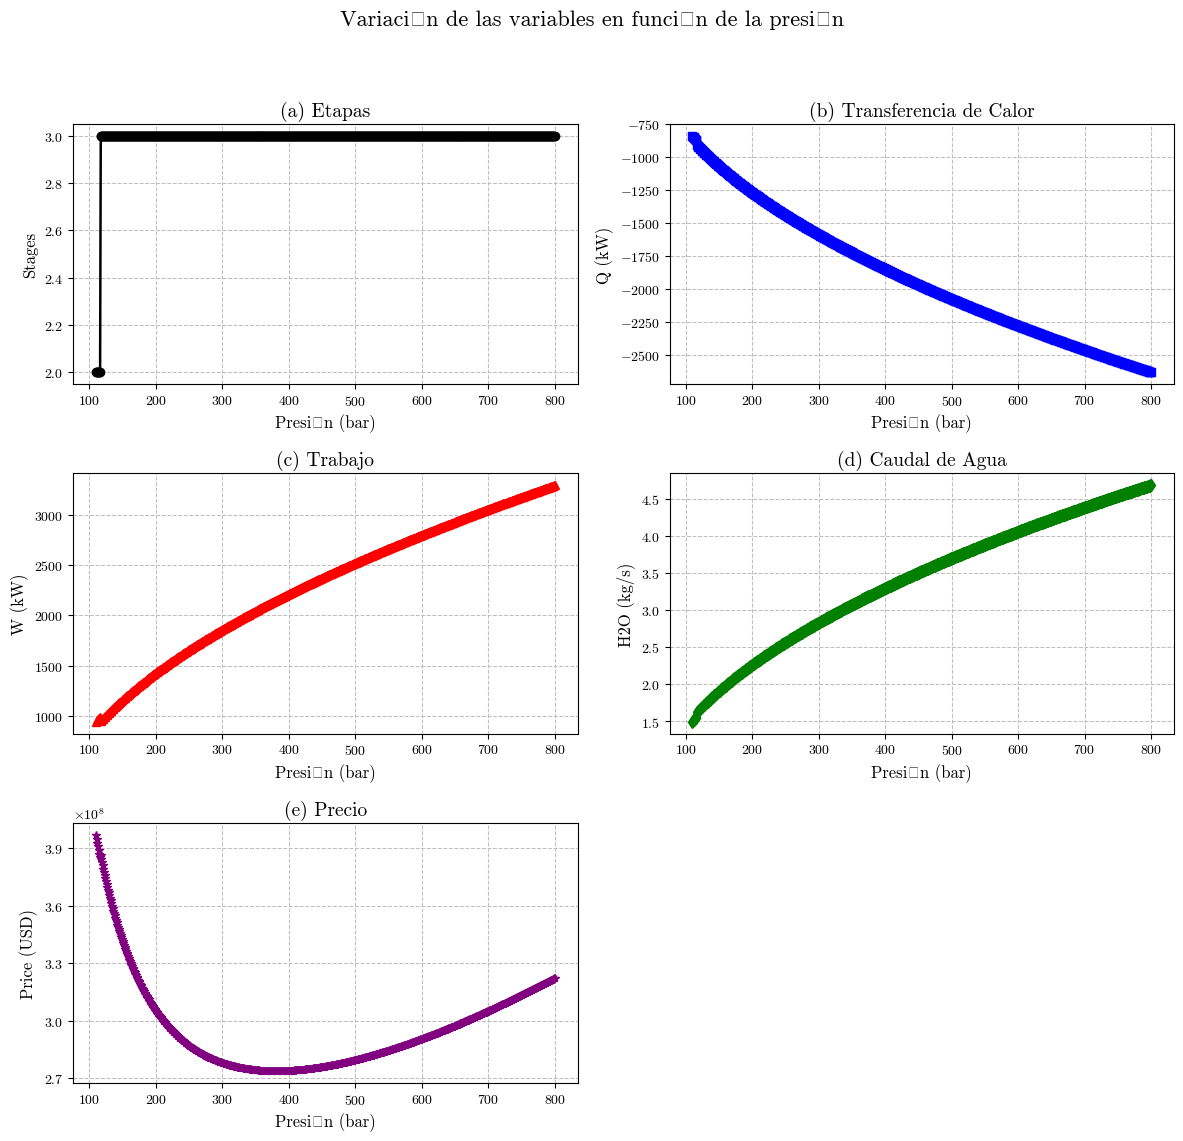

In [1174]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker  # Para controlar la cantidad de ticks en el eje y

# Aplicamos el estilo clásico y actualizamos algunos parámetros estéticos
#plt.style.use('classic')
plt.rcParams.update({
    'font.size': 12,             # Tamaño global de fuente
    'axes.labelsize': 12,        # Tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,        # Tamaño de los títulos de los ejes
    'xtick.labelsize': 10,       # Tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,       # Tamaño de las etiquetas del eje y
    'lines.linewidth': 1.8,      # Grosor de las líneas
    'lines.markersize': 6,       # Tamaño de los marcadores
    'grid.linestyle': '--',      # Estilo discontínuo para la rejilla
    'grid.linewidth': 0.75,      # Grosor de la rejilla
    'grid.color': '0.75',        # Color gris para la rejilla
})

# Se asume que las variables Pes, stages, Qk, Wk, waterr y price ya están definidas
resultados = pd.DataFrame({
    'P (bar)': Pes,
    'Stages': stages,
    'Q (kW)': Qk,
    'W (kW)': Wk,
    'H2O (kg/s)': waterr,
    'Price (USD)': price
})

# Configuración de la figura con 3 filas y 2 columnas (sin sharex para mostrar todos los valores en X)
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Variación de las variables en función de la presión', fontsize=16, fontweight='bold')

# Panel (a): Stages vs. Presión
axs[0, 0].plot(resultados['P (bar)'], resultados['Stages'],
               marker='o', linestyle='-', color='black')
axs[0, 0].set_ylabel('Stages')
axs[0, 0].set_title('(a) Etapas')
axs[0, 0].grid(True)
axs[0, 0].set_axisbelow(True)
axs[0, 0].set_xlabel('Presión (bar)')  # Se muestran los valores del eje de la presión

# Panel (b): Q (kW) vs. Presión
axs[0, 1].plot(resultados['P (bar)'], resultados['Q (kW)'],
               marker='s', linestyle='-', color='blue')
axs[0, 1].set_ylabel('Q (kW)')
axs[0, 1].set_title('(b) Transferencia de Calor')
axs[0, 1].grid(True)
axs[0, 1].set_axisbelow(True)
axs[0, 1].set_xlabel('Presión (bar)')

# Panel (c): W (kW) vs. Presión
axs[1, 0].plot(resultados['P (bar)'], resultados['W (kW)'],
               marker='^', linestyle='-', color='red')
axs[1, 0].set_ylabel('W (kW)')
axs[1, 0].set_title('(c) Trabajo')
axs[1, 0].grid(True)
axs[1, 0].set_axisbelow(True)
axs[1, 0].set_xlabel('Presión (bar)')

# Panel (d): H2O (kg/s) vs. Presión
axs[1, 1].plot(resultados['P (bar)'], resultados['H2O (kg/s)'],
               marker='d', linestyle='-', color='green')
axs[1, 1].set_ylabel('H2O (kg/s)')
axs[1, 1].set_title('(d) Caudal de Agua')
axs[1, 1].grid(True)
axs[1, 1].set_axisbelow(True)
axs[1, 1].set_xlabel('Presión (bar)')

# Panel (e): Price (USD) vs. Presión
axs[2, 0].plot(resultados['P (bar)'], resultados['Price (USD)'],
               marker='*', linestyle='-', color='purple')
axs[2, 0].set_ylabel('Price (USD)')
axs[2, 0].set_title('(e) Precio')
axs[2, 0].grid(True)
axs[2, 0].set_axisbelow(True)
axs[2, 0].set_xlabel('Presión (bar)')
# Reducir el número de ticks en el eje y a un máximo de 5 para el gráfico de Price
axs[2, 0].yaxis.set_major_locator(ticker.MaxNLocator(5))

# Ocultamos el panel vacío (última celda de la cuadrícula)
axs[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [1175]:


P=172
Po=31
P_diff=P-Po
P1=Po
P2=P
N_etapas=np.ceil((np.log(P2)/np.log(P1))/np.log(2))
N_etapas
P_etapa=P_diff/N_etapas
Po=Po
Pf=P
P_acum=[Po]
Temps=[25+273.15]
Tref=Tref
m=m
eta=0.75
Qs,Ts,m_H2O,comp,power,Ps=[],[],[],[],[],[]
for i in range(int(N_etapas)):
    P1=sum(P_acum)
    print(P1)
    P_acum.append(P_etapa)
    P2=sum(P_acum)
    #Ti=(sum(P_acum)*V2*2)/(m*Z*8.314)
    #print('T',Ti)
    # Valor inicial para la incógnita x (en este caso, es un vector de una dimensión)
    x0 = [1.0]
    sol = root(trabajo_reversible_IT, x0=500, args=(m, P1, P2, eta,298.15), method='hybr')
    if sol.success:
        print(sol.message)
    else:
        print(sol.message)

    resultado = trabajo_reversible(m, P1, P2, eta, sol.x[0]-273.15,298.15)
    print(f"W: {resultado:.20f} kW")
    # Se utiliza scipy.optimize.root con método 'hybr'
    solucion = root(balance, x0, args=(sol.x[0],Tref, m), method='hybr')

    if solucion.success:
        x_encontrado = solucion.x[0]
        print(f"Solución encontrada: x = {x_encontrado:.6f}")
        Temps.append(25+273.15)
        Qs.append(float(-e))
        Ts.append((25+273.15))
        m_H2O.append(float(x_encontrado))
        comp.append('No. '+str(i+1))
        CP=19.67099783 + 0.069681519*T - 0.000200098*T**2 + 2.89493E-07*T**3 - 2.22475E-10*T**4 + 8.81466E-14*T**5 - 1.42043E-17*T**6
        CP=CP/2*1000
        power.append(resultado*1e3)
        Ps.append(P2)
    else:
        print("No se encontró solución:", solucion.message)
# Crear un DataFrame con los datos
data = {
	"Compressor": comp,
    "T (K)": Ts,
    "P (bar)": Ps,  # Convertir de Pa a bar
	"Cooling H2O (kg/s)": m_H2O,
	"Q (kW)": np.array(Qs),
    #"Q (kW) Aspen":np.array([-1645.66707374,-775.158866276,-514.144266522]),
    "W (kW)": np.array(power)
    #"W (kW) Aspen":np.array([2211.5522, 1052.84936, 706.504967])
    
}

df_compresores = pd.DataFrame(data)

#df_compresores['Error %']=abs(((df_compresores['Q (kW) Aspen']-df_compresores['Q (kW) Python'])/df_compresores['Q (kW) Aspen']*100 + (df_compresores['W (kW) Aspen']-df_compresores['W (kW) Python'])/df_compresores['W (kW) Aspen']*100)/2)
df_compresores.loc[df_compresores.shape[0]] = ["Total", Temps[-1], Ps[-1], sum(df_compresores['Cooling H2O (kg/s)']), sum(df_compresores['Q (kW)']), sum(df_compresores['W (kW)'])]
df_compresores


31
kW 2099.6081213396997
kW 2099.6081213396997
kW 2099.6081213396997
kW 2099.6081381186063
kW 1943.0449633545518
kW 1941.7791147680246
kW 1941.7688353379679
kW 1941.768834650278
The solution converged.
W: 0.71917364246306603182 kW
Solución encontrada: x = 1.074242
78.0
kW 1090.4662603714667
kW 1090.4662603714667
kW 1090.4662603714667
kW 1090.4662689896174
kW 924.2422462538713
kW 922.2707260516489
kW 922.2448043895358
kW 922.2447994955525
kW 922.24479949554
The solution converged.
W: 0.34157214796131113443 kW
Solución encontrada: x = 0.571839
125.0
kW 750.7507762999617
kW 750.7507762999617
kW 750.7507762999617
kW 750.7507821595873
kW 619.4312736720176
kW 617.8505447917091
kW 617.8282810823689
kW 617.828276158673
kW 617.8282761586584
The solution converged.
W: 0.22882528746616970228 kW
Solución encontrada: x = 0.421671


,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW)
0,No. 1,298.15,78.0,1.074242,-604.355007,719.173642
1,No. 2,298.15,125.0,0.571839,-321.709204,341.572148
2,No. 3,298.15,172.0,0.421671,-237.226878,228.825287
3,Total,298.15,172.0,2.067753,-1163.291089,1289.571078


In [1176]:

calculator = PriceCalculator(df_compresores,N_etapas,CS)

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


In [1177]:
calculator.dataframe

,Compressor,T (K),P (bar),Cooling H2O (kg/s),Q (kW),W (kW),Purchased Equipment Cost (USD)
0,No. 1,298.15,78.0,1.074242,-604.355007,719.173642,"$1,752,500.82"
1,No. 2,298.15,125.0,0.571839,-321.709204,341.572148,"$961,111.32"
2,No. 3,298.15,172.0,0.421671,-237.226878,228.825287,"$681,583.84"
3,Total,298.15,172.0,2.067753,-1163.291089,1289.571078,"$3,395,195.98"


In [1178]:
Tref

283.15

In [1179]:
import numpy as np
import pandas as pd
from scipy.optimize import root, minimize

def normalize_price(price):
    """
    Convierte un valor de precio que puede venir formateado (por ejemplo, "$1,234.56")
    a un número tipo float.
    Si 'price' es un pandas.Series con un solo valor, se extrae ese valor.
    """
    # Si es una serie (con un solo valor), extraer el valor.
    if isinstance(price, pd.Series):
        price = price.iloc[0]
    
    # Si ya es numérico, lo retorna en forma float.
    if isinstance(price, (int, float)):
        return float(price)
    
    if isinstance(price, str):
        # Eliminar símbolos comunes: $, €, espacios y comas
        cleaned = price.replace("$", "").replace("€", "").replace(",", "").strip()
        try:
            return float(cleaned)
        except Exception as ex:
            raise ValueError("No se pudo normalizar el precio: '{}'".format(price))
    # De lo contrario, se intenta convertir a float
    return float(price)

def cost_function(P, m, Tref, T, CS, crit):
    """
    Función objetivo para minimizar; dada una presión P (en bar) calcula el costo total,
    el cual es la suma de:
      - El costo de compresión obtenido con PriceCalculator.
      - El costo del tanque obtenido con TankCostCalculator.
    
    Se normalizan los precios para asegurar que sean float antes de realizar la suma.

    Parámetros:
      - P   : Presión final (en bar). Es la variable independiente a optimizar.
      - m   : Parámetro relacionado a la masa o cantidad a comprimir.
      - Tref: Temperatura de referencia (en Kelvin).
      - T   : Temperatura usada en algunos cálculos (ej. en la ecuación de Cp).
      - CS  : Constante o parámetro requerido por PriceCalculator.
      - crit: Diccionario con las propiedades críticas (keys: 'Tc', 'Pc', 'PM', 'w').
    
    Devuelve:
      total_cost: Suma de los costos (float) de compresión y de tanque.
    """

    # Fijamos la presión de entrada (Po) a 31 bar.
    Po = 31  
    P=P[0]
    if P <= Po:
        # Penalizar fuertemente si la presión final no supera la de entrada.
        return 1e12

    P_diff = P - Po
    P1 = Po
    P2 = P
    # Estimación del número de etapas. Se redondea hacia arriba.
    N_etapas = np.ceil((np.log(P2) / np.log(P1)) / np.log(2))
    # Incremento de presión por etapa:
    P_etapa = P_diff / N_etapas

    # Variables iniciales para las etapas
    P_acum = [Po]            # Acumulador de presión
    Temps = [25 + 273.15]    # Temperatura en Kelvin (25°C + 273.15)
    eta = 0.75               # Eficiencia
    # Inicializar listas para los resultados de cada etapa
    Qs, Ts, m_H2O, comp, power, Ps_list = [], [], [], [], [], []
    
    # Bucle sobre las etapas de compresión:
    for j in range(int(N_etapas)):
        # La presión de entrada actual es la suma de los incrementos acumulados.
        P1_current = sum(P_acum)
        # Agregar la presión de la etapa y actualizar la presión de salida.
        P_acum.append(P_etapa)
        P2_current = sum(P_acum)
        
        # Resolver la ecuación de trabajo reversible (usando una función externa)
        sol = root(trabajo_reversible_IT, x0=500, args=(m, P1_current, P2_current, eta, 298.15), method='hybr')
        if not sol.success:
            return 1e12  # Penalización si no se converge

        # Calcular el trabajo (en kW) usando la función trabajo_reversible.
        # Se utiliza sol.x[0] - 273.15 para convertir de Kelvin a °C.
        resultado = trabajo_reversible(m, P1_current, P2_current, eta, sol.x[0] - 273.15, 298.15)
        
        # Resolver la ecuación de balance (por ejemplo, para obtener el caudal de enfriamiento),
        # usando root con un valor inicial.
        x0_vec = [1.0]
        solucion = root(balance, x0_vec, args=(sol.x[0], Tref, m), method='hybr')
        if not solucion.success:
            return 1e12
        x_encontrado = solucion.x[0]
        
        # Se asume un valor placeholder para "e" (ya que no está definido, se utiliza 0)
        e_value = 0  
        
        # Acumulación de datos para la etapa.
        Temps.append(25 + 273.15)
        Qs.append(float(-e_value))  # Aquí se debe introducir el valor correcto para Q.
        Ts.append(25 + 273.15)
        m_H2O.append(float(x_encontrado))
        comp.append('No. ' + str(j + 1))
        # Se calcula CP con una expresión polinómica (ejemplo, sin utilizarlo directamente)
        CP = (19.67099783 
              + 0.069681519 * T 
              - 0.000200098 * T**2 
              + 2.89493E-07 * T**3 
              - 2.22475E-10 * T**4 
              + 8.81466E-14 * T**5 
              - 1.42043E-17 * T**6)
        CP = CP / 2 * 1000
        
        power.append(resultado * 1e3)  # Convertir a Watts, por ejemplo.
        Ps_list.append(P2_current)
    
    # Armado del DataFrame con información de cada etapa.
    data = {
        "Compressor": comp,
        "T (K)": Ts,
        "P (bar)": Ps_list,  # Se trabaja con P en bar
        "Cooling H2O (kg/s)": m_H2O,
        "Q (kW)": np.array(Qs),
        "W (kW)": np.array(power)
    }
    df_compresores = pd.DataFrame(data)
    # Agregar una fila "Total" que resume los valores.
    total_row = ["Total",
                 Temps[-1],
                 Ps_list[-1],
                 df_compresores["Cooling H2O (kg/s)"].sum(),
                 df_compresores["Q (kW)"].sum(),
                 df_compresores["W (kW)"].sum()]
    df_compresores.loc[df_compresores.shape[0]] = total_row

    # --- Cálculo de costos ---
    # Se obtiene el costo del proceso de compresión.
    calculator = PriceCalculator(df_compresores, N_etapas, CS)
    cost_compression = normalize_price(calculator.final)

    # Se dimensiona el tanque utilizando la función calcular_dimension_tanque.
    resultadot = calcular_dimension_tanque(
        P=sum(Ps_list),
        m=10000,
        crit=crit,
        tipo='hemi',
        rho_tank=4500
    )
    # Se calcula el costo del tanque.
    calculator1 = TankCostCalculator("Type I", resultadot["masa"] * 1e3)
    cost_tank = normalize_price(calculator1.extras_df["Final Cost (USD)"])

    # Sumar ambos costos para obtener el costo total.
    total_cost = cost_compression + cost_tank
    print
    print('TOTAL:',total_cost)
    return total_cost

# --- Ejemplo de optimización usando scipy.minimize ---
if __name__ == '__main__':
    # Parámetros o variables del proceso (se deben definir según tu aplicación)
    m = 4/86400           # Ejemplo: masa o caudal relacionado
    Tref = Tref      # Temperatura de referencia en Kelvin
    T = 298.15         # Temperatura usada para ciertos cálculos (como CP)
    CS = "Carbon Steel"           # Constante para PriceCalculator (ejemplo)
    crit = crit
    
    # Definir límites para la presión óptima (en bar). Po es 31 en el código, así que se debe estar por encima.
    P_min = 50  
    P_max = 1000
    x0 = [900]  # Valor inicial en bar
    
    # Ejecutar la optimización
    res = minimize(cost_function, x0, args=(m, Tref, T, CS, crit),
                   bounds=[(P_min, P_max)])
    
    if res.success:
        print("Presión óptima encontrada (bar):", res.x[0])
        print("Costo total mínimo:", res.fun)
    else:
        print("La optimización falló:", res.message)


kW 5541.063399431749
kW 5541.063399431749
kW 5541.063399431749
kW 5541.0634414469505
kW 7032.575719247068
kW 6900.452524637113
kW 6914.935346060866
kW 6915.153880983119
kW 6915.153488377773
kW 6915.153488388297
kW 1703.815957234465
kW 1703.815957234465
kW 1703.815957234465
kW 1703.8159689704516
kW 1550.800507761304
kW 1549.5135785306297
kW 1549.5026795756426
kW 1549.5026787538607
kW 1151.1566151930156
kW 1151.1566151930156
kW 1151.1566151930156
kW 1151.1566223789655
kW 1021.0558684450076
kW 1019.8721568857829
kW 1019.8606396126753
kW 1019.8606383957296
Volumen calculado del tanque: 144.57 m³
Radio del tanque: 2.4 m
Longitud del tanque: 9.6 m
Espesor del tanque: 3193.18 mm
Masa del tanque: 6887.82 ton
TOTAL: 569388498.4849861
kW 5541.063399459629
kW 5541.063399459629
kW 5541.063399459629
kW 5541.063441474828
kW 7032.575662968159
kW 6900.4525320083
kW 6914.935346325855
kW 6915.153881031335
kW 6915.153488426571
kW 6915.1534884370985
kW 1703.8159572390753
kW 1703.8159572390753
kW 1703.8159

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 144.6 m³
Radio del tanque: 2.4 m
Longitud del tanque: 9.6 m
Espesor del tanque: 3191.46 mm
Masa del tanque: 6883.09 ton
TOTAL: 568999810.9882921
kW 5539.463447857855
kW 5539.463447857855
kW 5539.463447857855
kW 5539.463489862931
kW 7029.535980811108
kW 6897.703587038642
kW 6912.136179670262
kW 6912.353351215181
kW 6912.352962679251
kW 6912.352962689592
kW 1703.5512856419828
kW 1703.5512856419828
kW 1703.5512856419828
kW 1703.5512973775203
kW 1550.5081005932889
kW 1549.2205659192064
kW 1549.2096582207273
kW 1549.2096573977303
kW 1150.923064706676
kW 1150.923064706676
kW 1150.923064706676
kW 1150.9230718924375
kW 1020.8071325505833
kW 1019.6230057718719
kW 1019.6114811835012
kW 1019.611479965091
Volumen calculado del tanque: 144.6 m³
Radio del tanque: 2.4 m
Longitud del tanque: 9.6 m
Espesor del tanque: 3191.46 mm
Masa del tanque: 6883.09 ton
TOTAL: 568999810.9983257
kW 4056.4567026456407
kW 4056.4567026456407
kW 4056.4567026456407
kW 4056.456734443018
kW 44

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1022.0362001172412
kW 1022.0362001172412
kW 1022.0362001172412
kW 1022.0362082218862
kW 860.4943544248493
kW 858.5621686751921
kW 858.536279947303
kW 858.5362748479974
kW 858.5362748479846
kW 715.4088883495442
kW 715.4088883495442
kW 715.4088883495442
kW 715.4088939660307
kW 587.6771542544606
kW 586.1345020046527
kW 586.1125513997268
kW 586.1125464383676
kW 586.112546438351
Volumen calculado del tanque: 436.32 m³
Radio del tanque: 3.47 m
Longitud del tanque: 13.87 m
Espesor del tanque: 827.64 mm
Masa del tanque: 3144.76 ton
TOTAL: 259406336.72550625
kW 2425.043143309988
kW 2425.043143309988
kW 2425.043143309988
kW 2425.0431626511704
kW 2311.5226617329326
kW 2310.8831857038285
kW 2310.879604182954
kW 2310.8796040705556
kW 1171.8881661208375
kW 1171.8881661208375
kW 1171.8881661208375
kW 1171.888175332881
kW 1001.3636431142907
kW 999.3692553883791
kW 999.3437098459877
kW 999.3437052945176
kW 999.3437052945073
kW 792.7861033333671
kW 792.7861033333671
kW 792.7861033333671
kW 792.786109

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 381.58701976347555
Volumen calculado del tanque: 1414.28 m³
Radio del tanque: 5.13 m
Longitud del tanque: 20.52 m
Espesor del tanque: 337.55 mm
Masa del tanque: 5392.76 ton
TOTAL: 441143740.5787864
kW 2155.4971895697736
kW 2155.4971895697736
kW 2155.4971895697736
kW 2155.4972067898675
kW 2004.8942552746794
kW 2003.7325072091996
kW 2003.7235288171682
kW 2003.723528274787
kW 1105.2755910479336
kW 1105.2755910479336
kW 1105.2755910479336
kW 1105.2755997756822
kW 938.1630716183264
kW 936.1853582537825
kW 936.1594699521507
kW 936.1594651124389
kW 936.1594651124275
kW 758.376084305843
kW 758.376084305843
kW 758.376084305843
kW 758.3760902162486
kW 626.3465447511425
kW 624.7589028139563
kW 624.7365983210234
kW 624.7365934145919
kW 624.7365934145774
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.30822903
kW 2155.497189665889
kW 2155.497189665889
kW 2155.497189665889
kW 

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Espesor del tanque: 554.16 mm
Masa del tanque: 3655.6 ton
TOTAL: 300242656.9379038
kW 1929.4873371969122
kW 1929.4873371969122
kW 1929.4873371969122
kW 1929.487352630265
kW 1758.34239315369
kW 1756.7854095082328
kW 1756.7710465223201
kW 1756.7710452691506
kW 1042.987919472819
kW 1042.987919472819
kW 1042.987919472819
kW 1042.9879277358
kW 879.9141261079269
kW 877.9680867204665
kW 877.9421561574583
kW 877.9421511131121
kW 877.9421511130995
Volumen calculado del tanque: 717.24 m³
Radio del tanque: 4.09 m
Longitud del tanque: 16.37 m
Espesor del tanque: 554.16 mm
Masa del tanque: 3655.6 ton
TOTAL: 300242656.85802263
kW 1962.0070369806704
kW 1962.0070369806704
kW 1962.0070369806704
kW 1962.007052671523
kW 1793.239312525926
kW 1791.734357755699
kW 1791.7207775343854
kW 1791.7207764030832
kW 1052.3574954534865
kW 1052.3574954534865
kW 1052.3574954534865
kW 1052.3575037869782
kW 888.6263306524863
kW 886.6746036069383
kW 886.6486632620846
kW 886.648658244574
kW 886.648658244561
kW 731.10474299

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 2152.944586455062
kW 2152.944586455062
kW 2152.944586455062
kW 2152.9446036550153
kW 2002.0566772912932
kW 2000.8901068410676
kW 2000.881069887519
kW 2000.881069338946
kW 1104.6072193521566
kW 1104.6072193521566
kW 1104.6072193521566
kW 1104.6072280749736
kW 937.5338091443199
kW 935.5563590459332
kW 935.5304689467439
kW 935.5304641045188
kW 935.5304641045069
kW 758.0319281985178
kW 758.0319281985178
kW 758.0319281985178
kW 758.0319341066463
kW 626.0339075463204
kW 624.446566680923
kW 624.4242638035117
kW 624.4242588962264
kW 624.4242588962114
Volumen calculado del tanque: 382.09 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.27 m
Espesor del tanque: 930.64 mm
Masa del tanque: 3108.53 ton
TOTAL: 256771209.00338438
kW 2155.4971895697736
kW 2155.4971895697736
kW 2155.4971895697736
kW 2155.4972067898675
kW 2004.8942552746794
kW 2003.7325072091996
kW 2003.7235288171682
kW 2003.723528274787
kW 1105.2755910479336
kW 1105.2755910479336
kW 1105.2755910479336
kW 1105.2755997756822
kW 938

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 739.76487591665
kW 739.76487591665
kW 739.76487591665
kW 739.7648817019955
kW 609.5100133909298
kW 607.9401036318409
kW 607.917916351232
kW 607.9179114086571
kW 607.9179114086418
Volumen calculado del tanque: 404.92 m³
Radio del tanque: 3.38 m
Longitud del tanque: 13.53 m
Espesor del tanque: 883.48 mm
Masa del tanque: 3118.66 ton
TOTAL: 257454611.32554334
kW 2151.6796301043073
kW 2151.6796301043073
kW 2151.6796301043073
kW 2151.67964729428
kW 2000.6509523264351
kW 1999.48199572996
kW 1999.4729297329277
kW 1999.4729291812707
kW 1104.2757238871106
kW 1104.2757238871106
kW 1104.2757238871106
kW 1104.2757326074793
kW 937.2217491674382
kW 935.2444269001887
kW 935.2185358764611
kW 935.2185310329751
kW 935.2185310329629
kW 757.8612371137015
kW 757.8612371137015
kW 757.8612371137015
kW 757.8612430206991
kW 625.8788682639633
kW 624.2916764761086
kW 624.2693743990867
kW 624.2693694913761
kW 624.269369491361
Volumen calculado del tanque: 382.3 m³
Radio del tanque: 3.32 m
Longitud del tanque: 1

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 2155.4234547477545
kW 2155.4234547477545
kW 2155.4234547477545
kW 2155.4234719672672
kW 2004.8122704465225
kW 2003.6503840018433
kW 2003.641403927245
kW 2003.6414033846866
kW 1105.2562949736628
kW 1105.2562949736628
kW 1105.2562949736628
kW 1105.2563037012703
kW 938.1449009038116
kW 936.1671975002694
kW 936.1413091774504
kW 936.1413043376781
kW 936.1413043376662
kW 758.3661483591369
kW 758.3661483591369
kW 758.3661483591369
kW 758.3661542694771
kW 626.3375171102552
kW 624.7498847883986
kW 624.7275803549304
kW 624.7275754484804
kW 624.727575448465
Volumen calculado del tanque: 381.68 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.55 mm
Masa del tanque: 3108.43 ton
TOTAL: 256765794.6951416
kW 2155.496180122047
kW 2155.496180122047
kW 2155.496180122047
kW 2155.496197342133
kW 2004.893132500788
kW 2003.731382912625
kW 2003.7224045004305
kW 2003.7224039580474
kW 1105.2753268842152
kW 1105.2753268842152
kW 1105.2753268842152
kW 1105.275335611963
kW 938.16

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1105.2755910515518
kW 1105.2755910515518
kW 1105.2755910515518
kW 1105.275599779301
kW 938.1630704308051
kW 936.1853582418361
kW 936.1594699555512
kW 936.159465115845
kW 936.1594651158332
kW 758.3760843077067
kW 758.3760843077067
kW 758.3760843077067
kW 758.3760902181125
kW 626.3465441352954
kW 624.7589028071209
kW 624.7365983227108
kW 624.7365934162834
kW 624.7365934162684
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.29824418
kW 2155.497189405403
kW 2155.497189405403
kW 2155.497189405403
kW 2155.4972066254977
kW 2004.8942535793765
kW 2003.7325070145316
kW 2003.7235286340913
kW 2003.7235280917123
kW 1105.2755910049184
kW 1105.2755910049184
kW 1105.2755910049184
kW 1105.2755997326672
kW 938.1630711802803
kW 936.185358208174
kW 936.159469911665
kW 936.1594650719551
kW 936.1594650719431
kW 758.3760842836937
kW 758.3760842836937
kW 758.3760842836937
kW 758.3760901

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

kW 1105.275582713398
kW 1105.275582713398
kW 1105.275582713398
kW 1105.2755914411478
kW 938.1630616785794
kW 936.185350382648
kW 936.1594621079576
kW 936.1594572682557
kW 936.1594572682441
kW 758.3760800142173
kW 758.3760800142173
kW 758.3760800142173
kW 758.3760859246237
kW 626.3465395785752
kW 624.7588989012182
kW 624.7365944258833
kW 624.73658951946
kW 624.7365895194448
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.3534094
kW 2155.4971872087085
kW 2155.4971872087085
kW 2155.4971872087085
kW 2155.497204428803
kW 2004.8942518633257
kW 2003.7325045734872
kW 2003.723526187428
kW 2003.7235256450472
kW 1105.2755904300625
kW 1105.2755904300625
kW 1105.2755904300625
kW 1105.275599157812
kW 938.1630694406415
kW 936.185357651691
kW 936.1594693706245
kW 936.1594645309202
kW 936.1594645309077
kW 758.376083987688
kW 758.376083987688
kW 758.376083987688
kW 758.3760898980939


/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)


kW 2155.4971873048235
kW 2155.4971873048235
kW 2155.4971873048235
kW 2155.4972045249187
kW 2004.8942504610654
kW 2003.7325046689643
kW 2003.7235262944796
kW 2003.7235257521008
kW 1105.275590455216
kW 1105.275590455216
kW 1105.275590455216
kW 1105.275599182965
kW 938.1630702586308
kW 936.1853576856034
kW 936.159469394301
kW 936.1594645545936
kW 936.1594645545822
kW 758.3760840006413
kW 758.3760840006413
kW 758.3760840006413
kW 758.3760899110466
kW 626.3465444711273
kW 624.7589025369107
kW 624.7365980440175
kW 624.7365931375866
kW 624.7365931375715
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.29575282
kW 2155.497185315627
kW 2155.497185315627
kW 2155.497185315627
kW 2155.497202535722
kW 2004.8942489784463
kW 2003.7325024590455
kW 2003.7235240789244
kW 2003.7235235365442
kW 1105.2755899346591
kW 1105.2755899346591
kW 1105.2755899346591
kW 1105.275598662409
kW 938.16

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 

Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.2956788
kW 2155.4971870781046
kW 2155.4971870781046
kW 2155.4971870781046
kW 2155.4972042981976
kW 2004.8942539819818
kW 2003.7325044453817
kW 2003.7235260419632
kW 2003.7235254995792
kW 1105.275590395884
kW 1105.275590395884
kW 1105.275590395884
kW 1105.275599123635
kW 938.1630666290786
kW 936.1853575836949
kW 936.1594693384429
kW 936.1594644987523
kW 936.1594644987414
kW 758.3760839700896
kW 758.3760839700896
kW 758.3760839700896
kW 758.376089880495
kW 626.3465444430968
kW 624.7589025091785
kW 624.7365980162886
kW 624.7365931098576
kW 624.7365931098428
Volumen calculado del tanque: 381.67 m³
Radio del tanque: 3.32 m
Longitud del tanque: 13.26 m
Espesor del tanque: 931.58 mm
Masa del tanque: 3108.42 ton
TOTAL: 256764880.31550494
kW 2155.497187174219
kW 2155.497187174219
kW 2155.497187174219
kW 2155.497204394313
kW 200

/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/2595008889.py:160: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  self.extras_df = self.extras_df.applymap(lambda x: f"${x:,.2f}" if isinstance(x, (int, float)) else x)
/tmp/ipykernel_48527/1972708371.py:62: FutureWarning: DataFrame.applymap has been deprecated. 